In [ ]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter


In [40]:
# Load the dataset
df = pd.read_csv(r'C:\\Users\\DELL\\Desktop\\mahek\\\archive (6)\\flipkart.csv')
print("Dataset Sample:")
print(df.head())


Dataset Sample:
   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [41]:
def cleanReviews(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['cleanedReviews'] = df['Review'].apply(cleanReviews)

In [42]:

# Define the analysis based on rating
def getAnalysis(rating):
    if rating < 3:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'



In [7]:
# Apply the analysis function
df['Analysis'] = df['Rating'].apply(getAnalysis)


In [43]:
df['Analysis'] = df['Rating'].apply(getAnalysis)
print("\nDataset after adding Analysis column:")
print(df.head())


Dataset after adding Analysis column:
   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  \
0  Best under 60k Great performanceI got it for a...       5   
1                                 Good perfomence...       5   
2  Great performance but usually it has also that...       5   
3           My wife is so happy and best product 👌🏻😘       5   
4  Light weight laptop with new amazing features,...       5   

                                      cleanedReviews  Analysis  
0  Best under 60k Great performanceI got it for a...  Positive  
1                                    

In [44]:
# Define features and target
X = df['cleanedReviews']
y = df['Analysis']


In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [48]:
svm_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)
gb_model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
# Predict probabilities for each class
proba_svm = svm_model.predict_proba(X_test_tfidf)  # Shape: (n_samples, n_classes)
proba_rf = rf_model.predict_proba(X_test_tfidf)    # Shape: (n_samples, n_classes)
proba_gb = gb_model.predict_proba(X_test_tfidf)    # Shape: (n_samples, n_classes)


In [50]:
preds1 = svm_model.predict(X_test_tfidf)
preds2 = rf_model.predict(X_test_tfidf)
preds3 = gb_model.predict(X_test_tfidf)

In [51]:
final_preds = []
for i in range(len(X_test)):
    votes = [preds1[i], preds2[i], preds3[i]]
    final_vote = Counter(votes).most_common(1)[0][0]
    final_preds.append(final_vote)

final_preds = np.array(final_preds)

In [52]:
class_labels = ['Positive', 'Neutral', 'Negative']

print("\nTrue labels distribution:", Counter(y_test))
print("Predicted labels distribution:", Counter(final_preds))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, final_preds, labels=class_labels))
print("\nClassification Report:\n", classification_report(y_test, final_preds, labels=class_labels, zero_division=0))



True labels distribution: Counter({'Positive': 394, 'Negative': 43, 'Neutral': 24})
Predicted labels distribution: Counter({np.str_('Positive'): 413, np.str_('Negative'): 40, np.str_('Neutral'): 8})

Confusion Matrix:
 [[394   0   0]
 [ 15   8   1]
 [  4   0  39]]

Classification Report:
               precision    recall  f1-score   support

    Positive       0.95      1.00      0.98       394
     Neutral       1.00      0.33      0.50        24
    Negative       0.97      0.91      0.94        43

    accuracy                           0.96       461
   macro avg       0.98      0.75      0.81       461
weighted avg       0.96      0.96      0.95       461



In [53]:
total_reviews = len(final_preds)

if total_reviews > 0:
    positive_reviews = np.sum(final_preds == 'Positive')
    negative_reviews = np.sum(final_preds == 'Negative')
    neutral_reviews = np.sum(final_preds == 'Neutral')

    print(f"\nPercentage of Positive reviews: {positive_reviews / total_reviews * 100:.2f}%")
    print(f"Percentage of Negative reviews: {negative_reviews / total_reviews * 100:.2f}%")
    print(f"Percentage of Neutral reviews: {neutral_reviews / total_reviews * 100:.2f}%")
else:
    print("No reviews to analyze!")


Percentage of Positive reviews: 89.59%
Percentage of Negative reviews: 8.68%
Percentage of Neutral reviews: 1.74%


In [54]:
# Accuracy
accuracy = accuracy_score(y_test, final_preds)
print("\nFinal Majority Voting Accuracy:", accuracy)



Final Majority Voting Accuracy: 0.9566160520607375


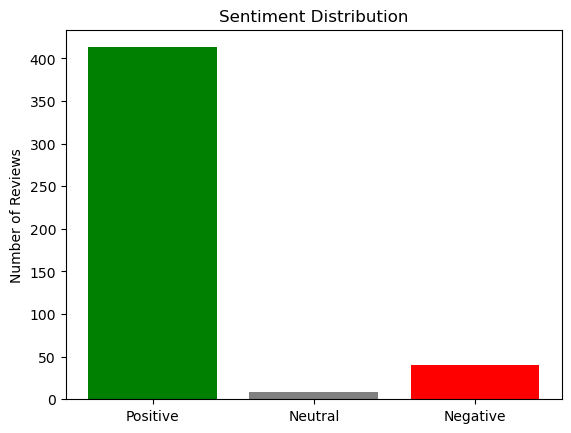

In [55]:
plt.bar(['Positive', 'Neutral', 'Negative'], 
        [positive_reviews, neutral_reviews, negative_reviews],
        color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.show()

In [59]:
print(df.columns)


Index(['Unnamed: 0', 'Product_name', 'Review', 'Rating', 'cleanedReviews',
       'Analysis'],
      dtype='object')


In [60]:
# Extract brand from product name
df['Brand'] = df['Product_name'].apply(lambda x: x.split()[0])


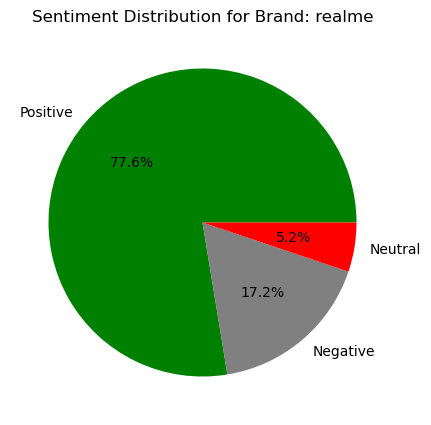

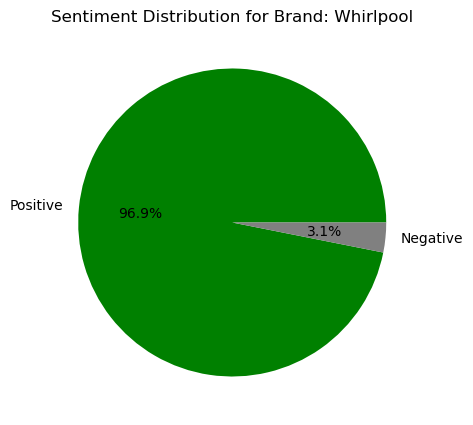

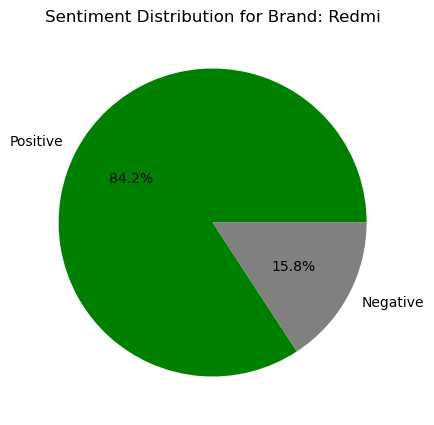

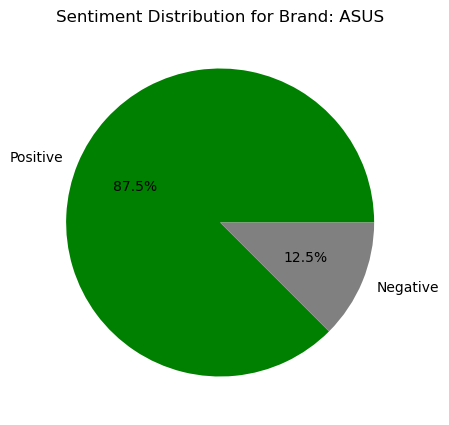

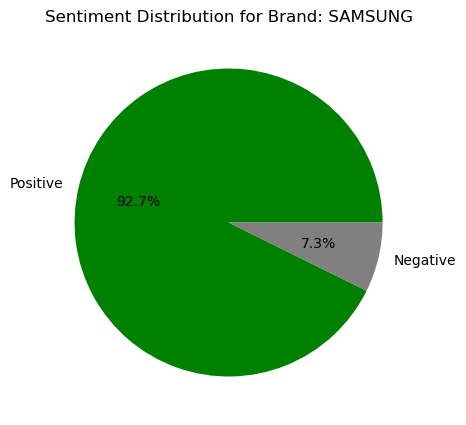

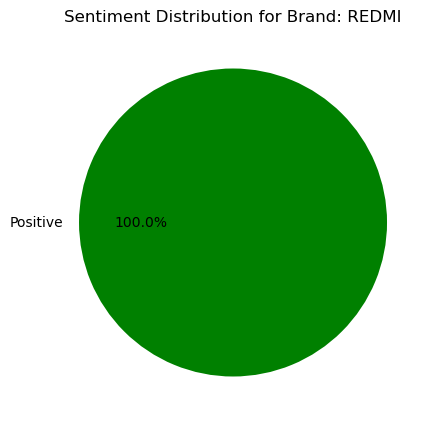

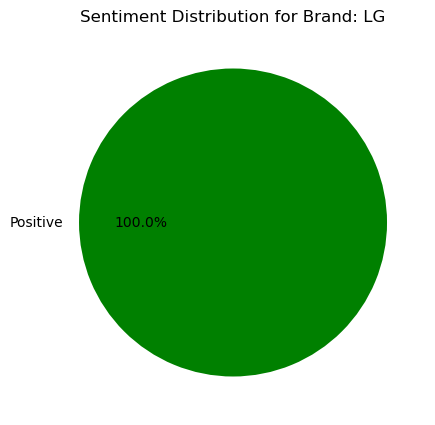

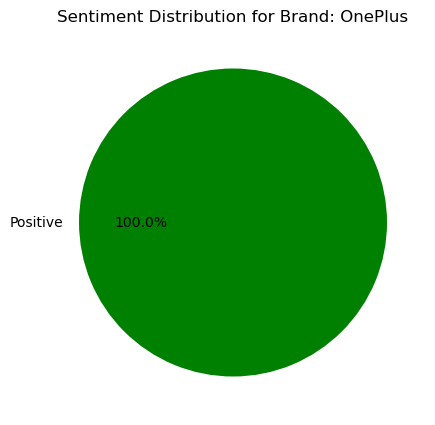

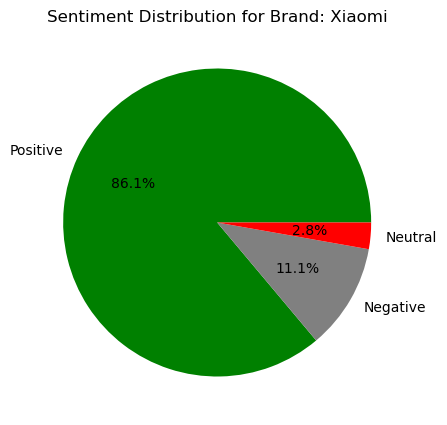

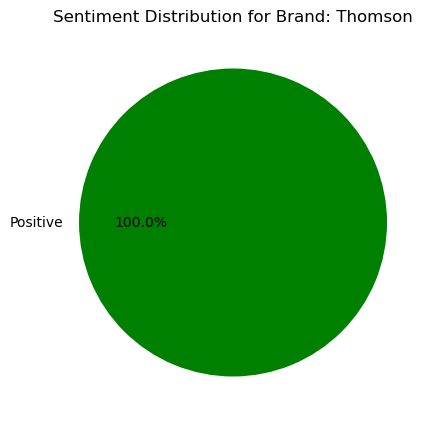

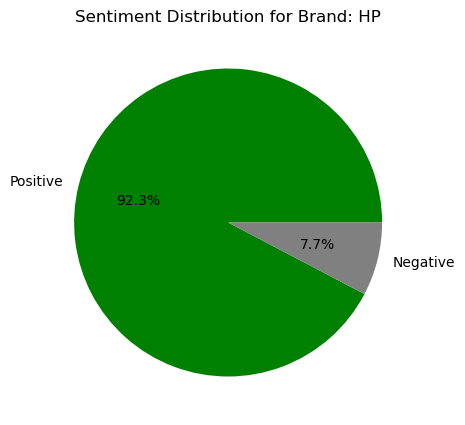

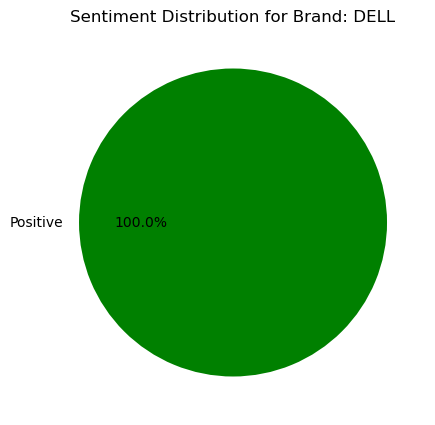

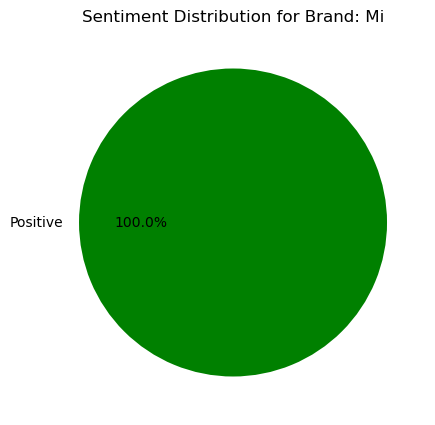

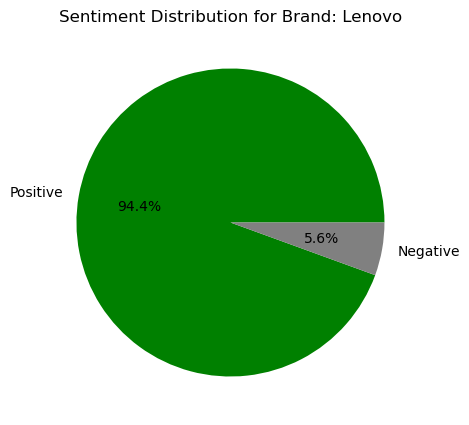

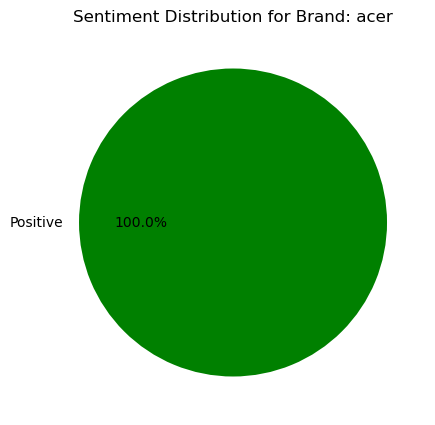

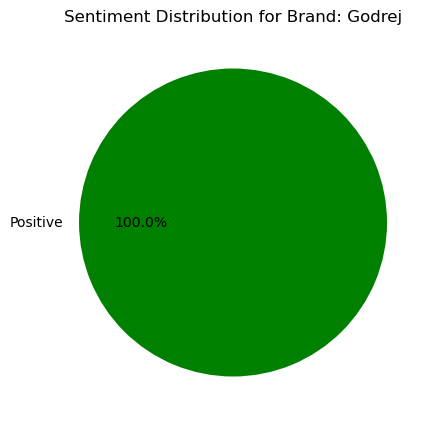

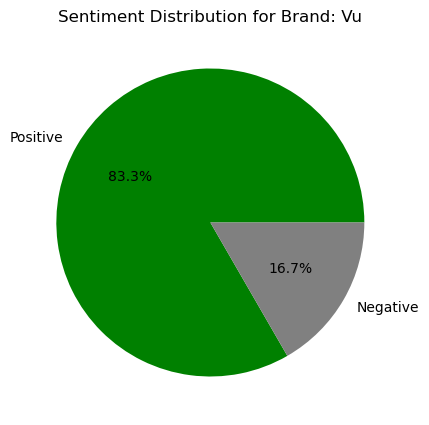

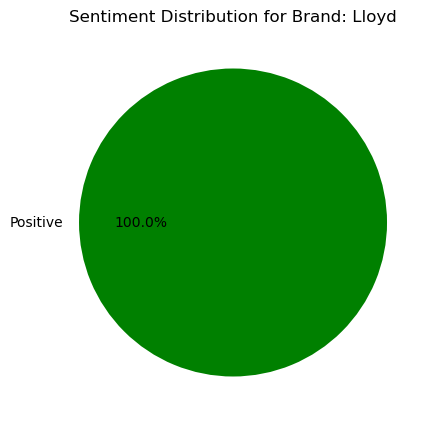

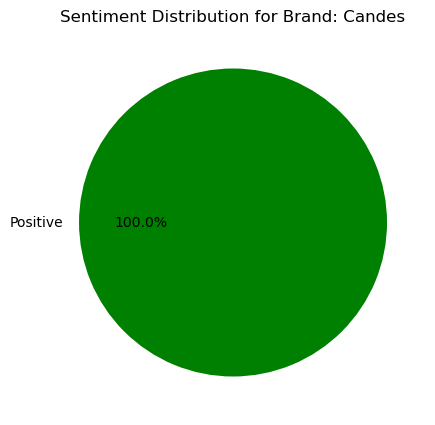

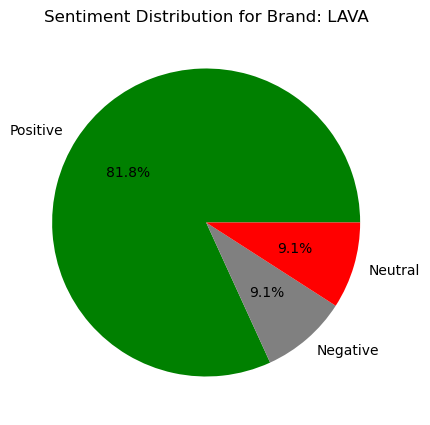

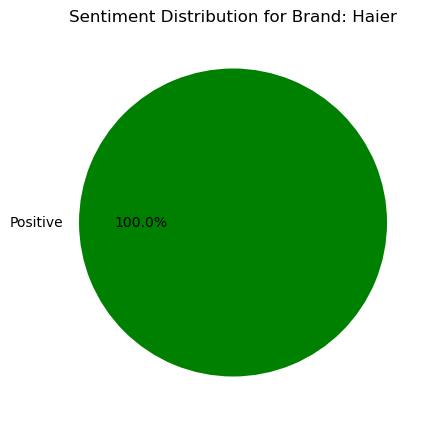

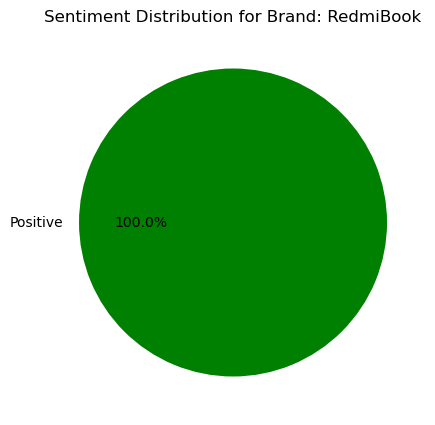

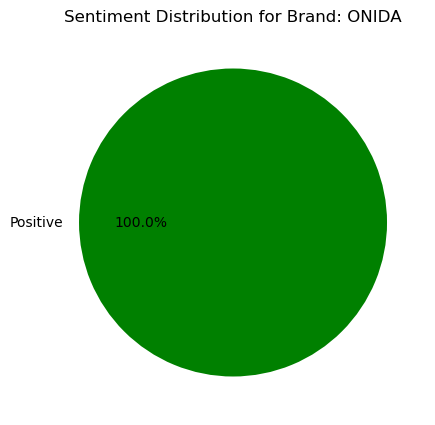

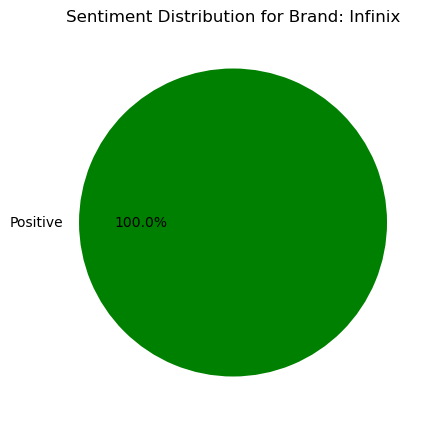

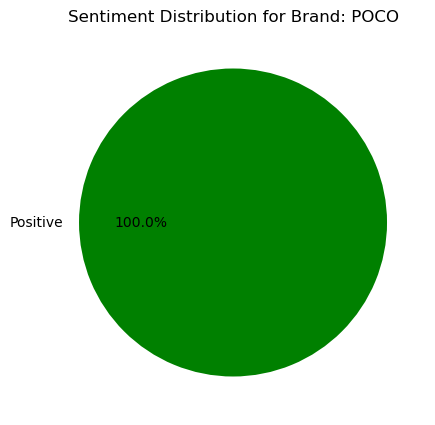

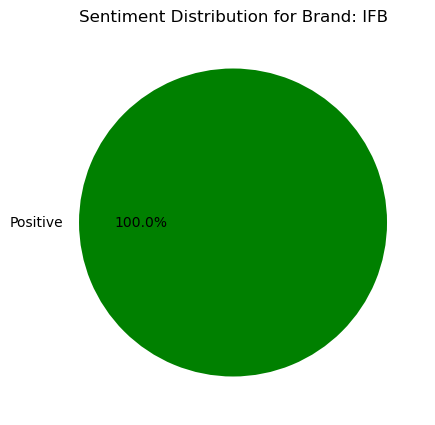

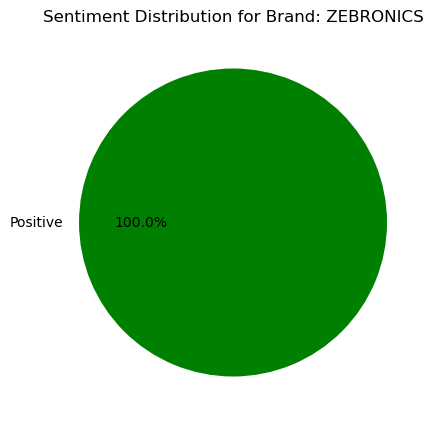

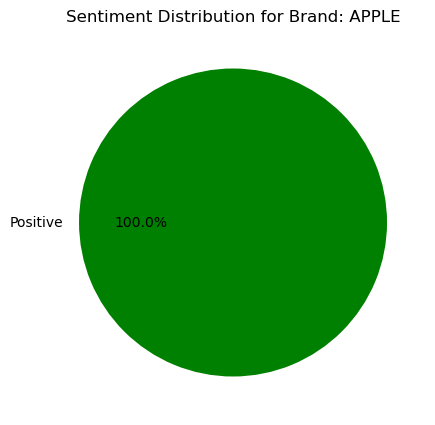

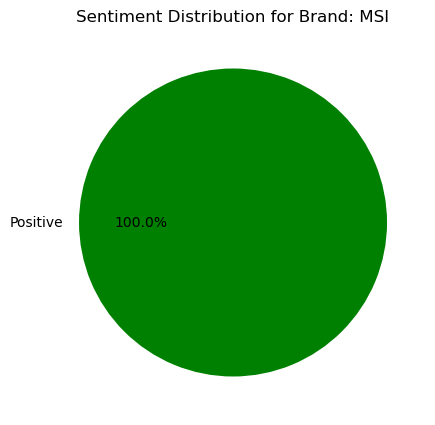

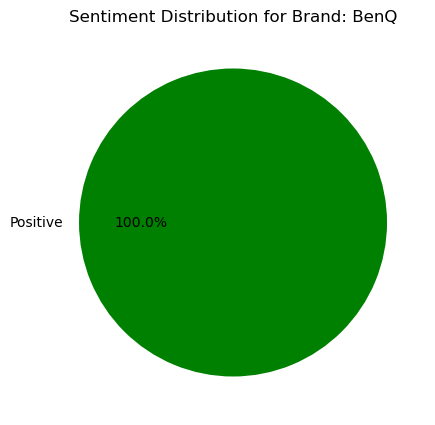

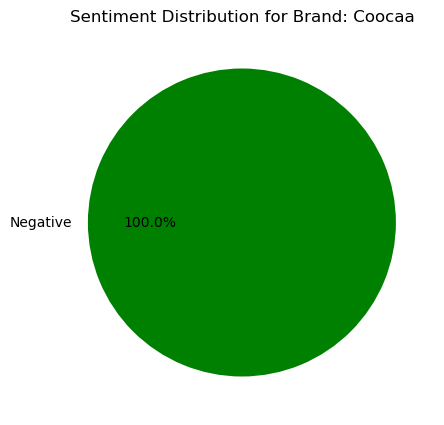

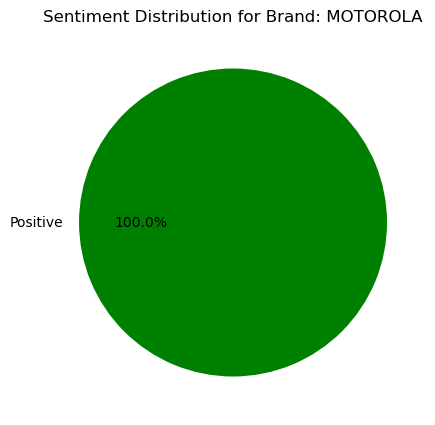

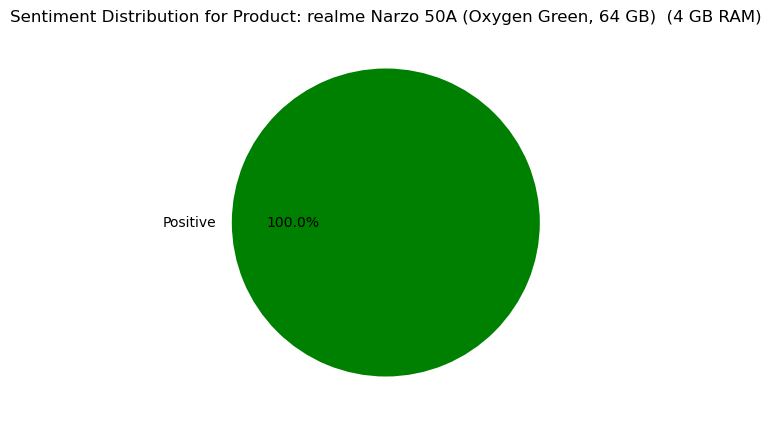

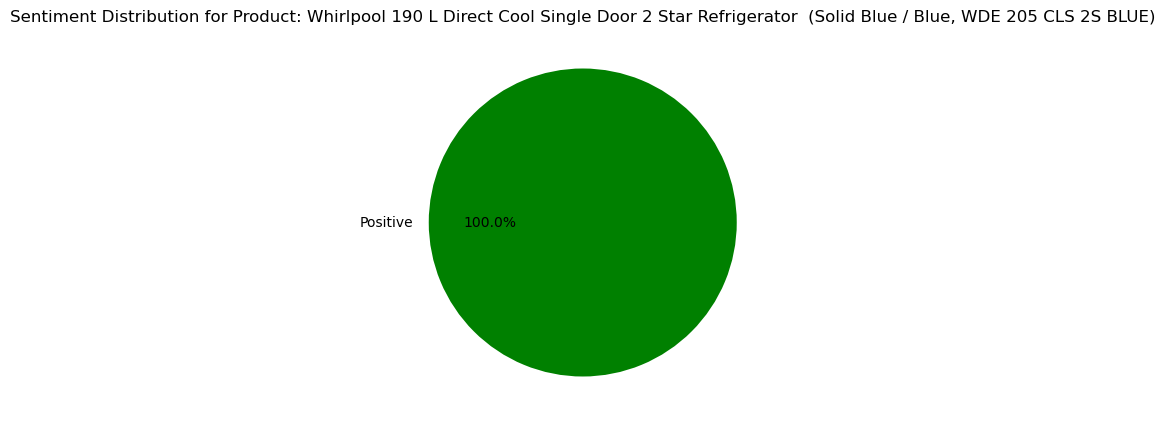

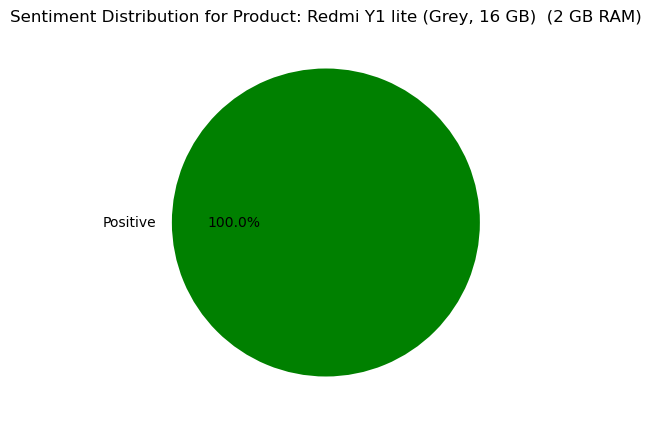

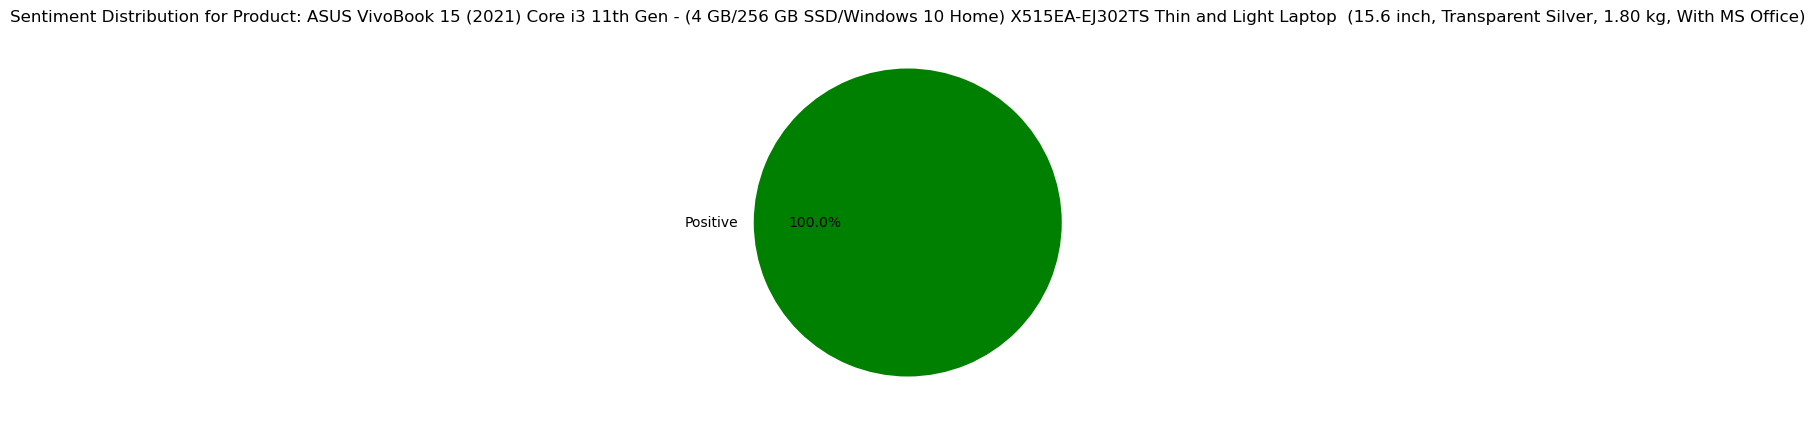

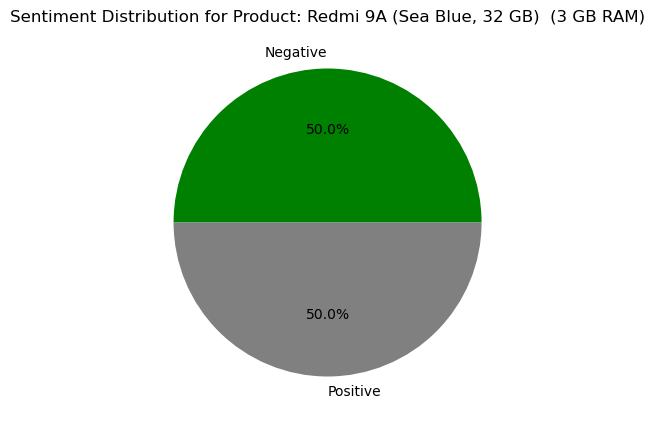

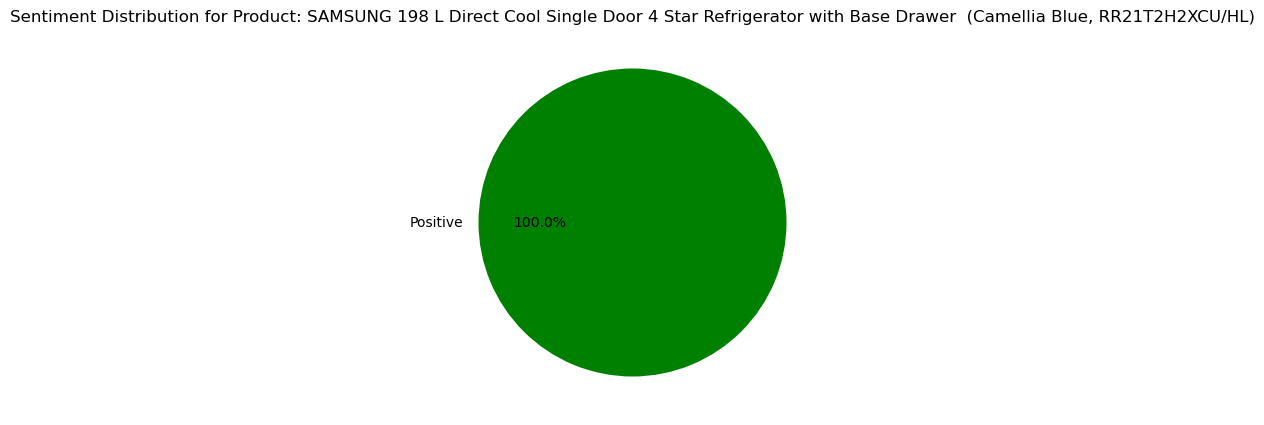

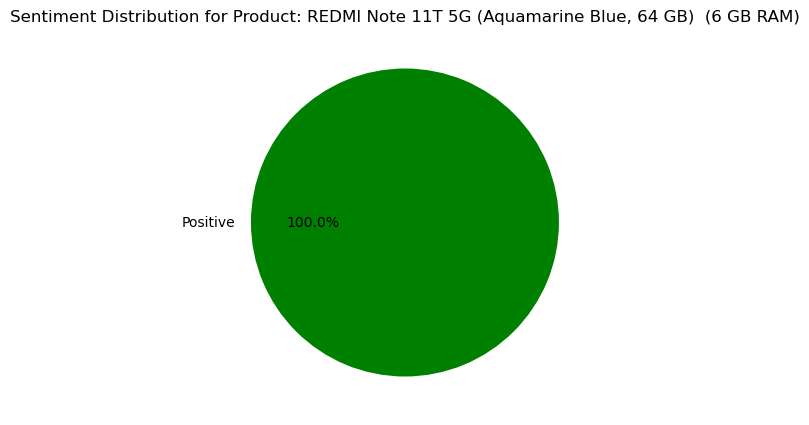

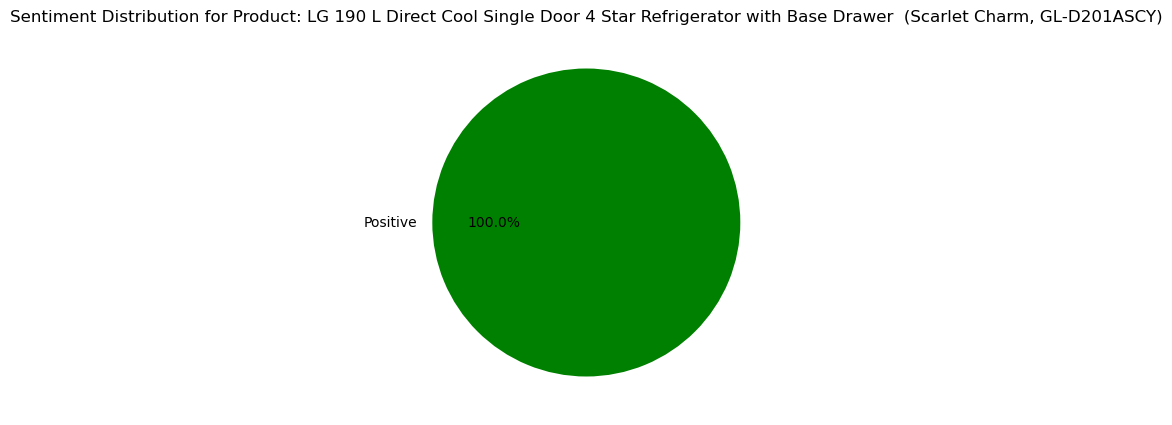

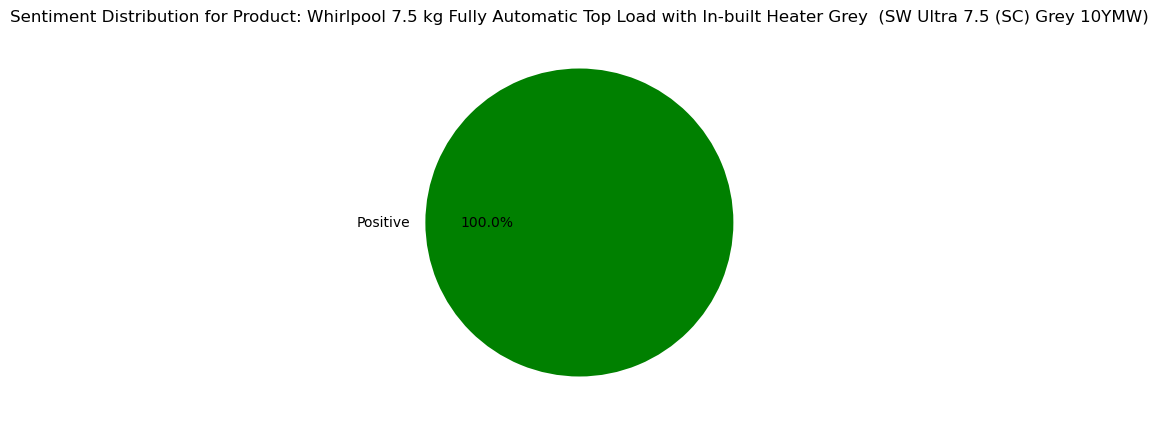

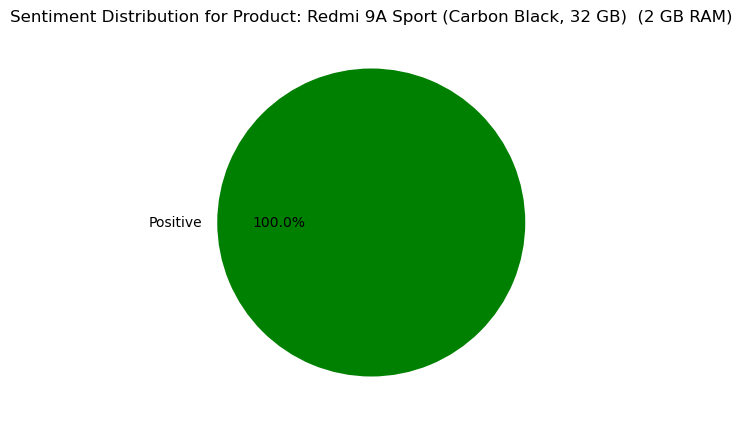

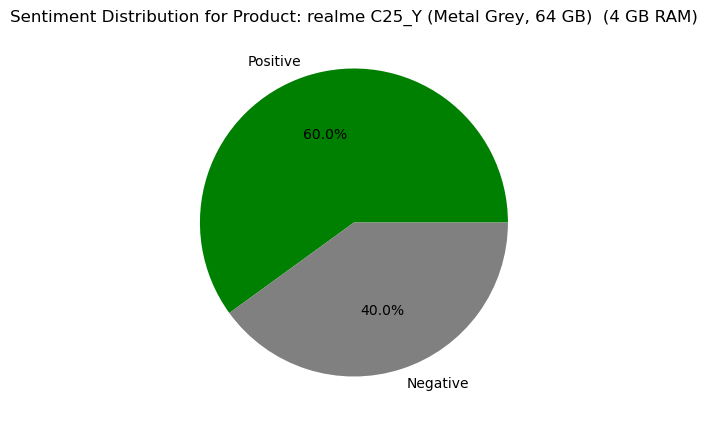

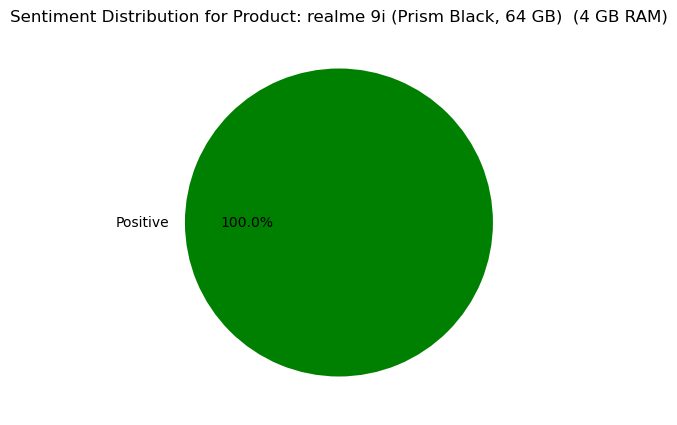

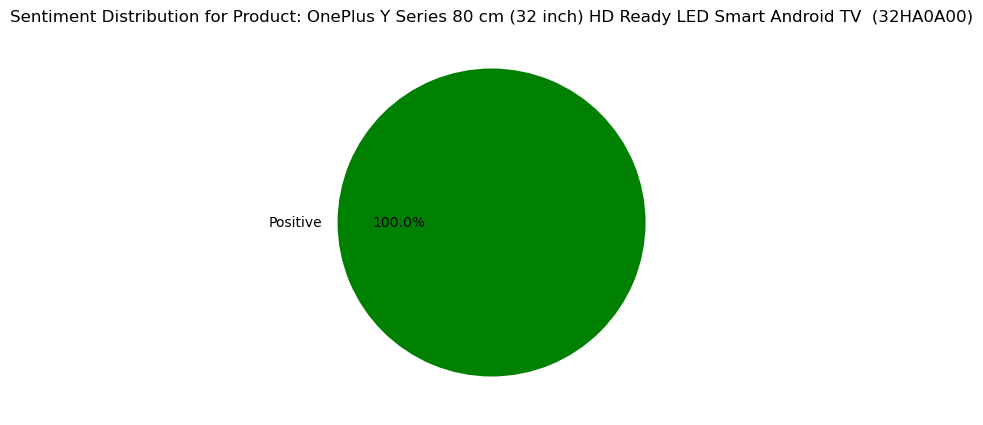

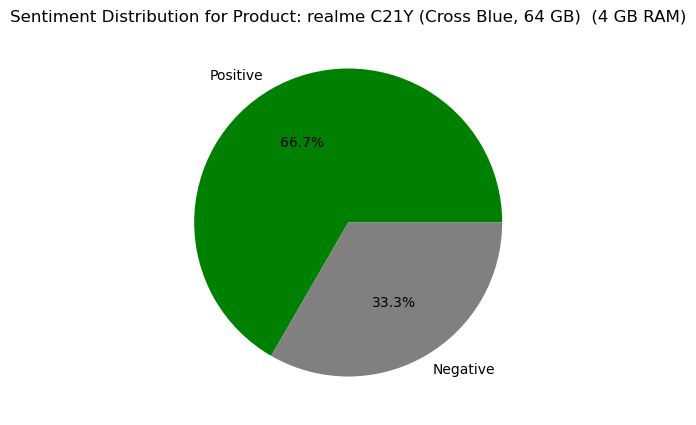

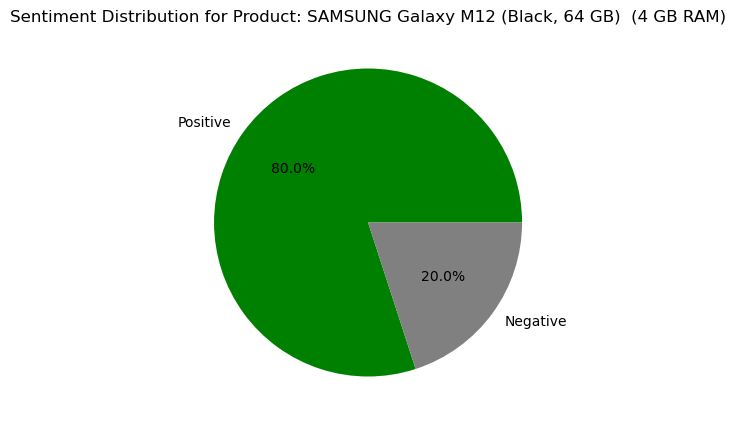

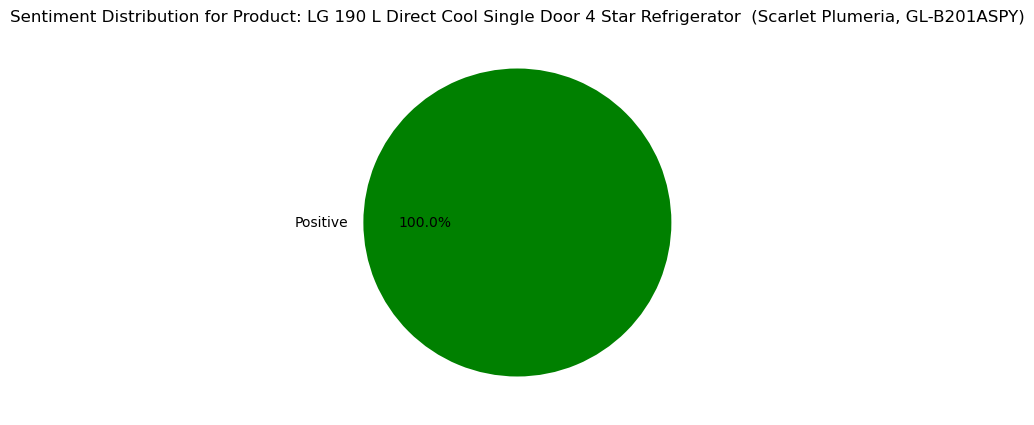

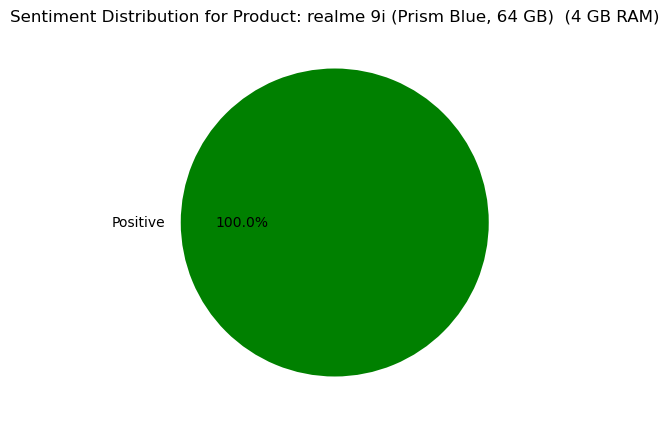

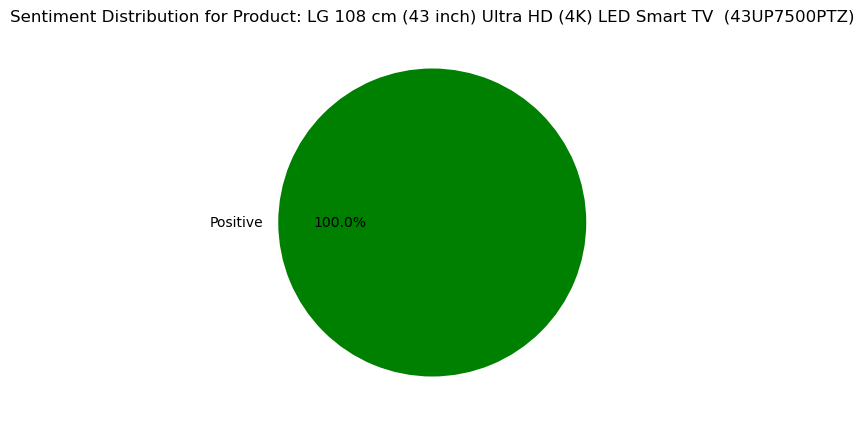

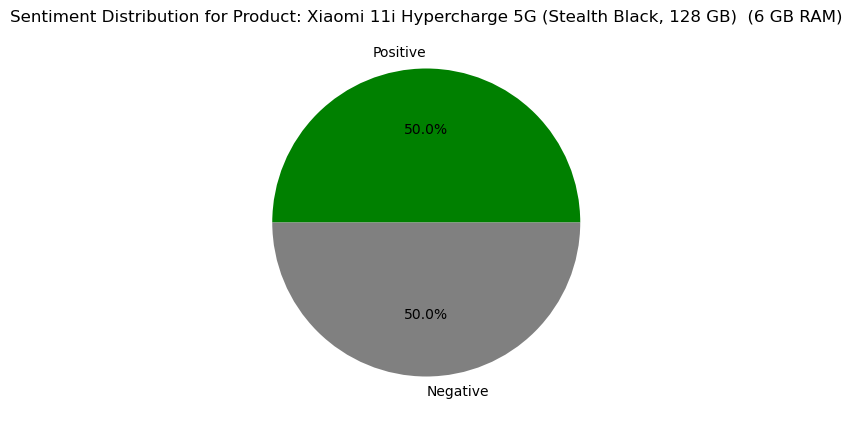

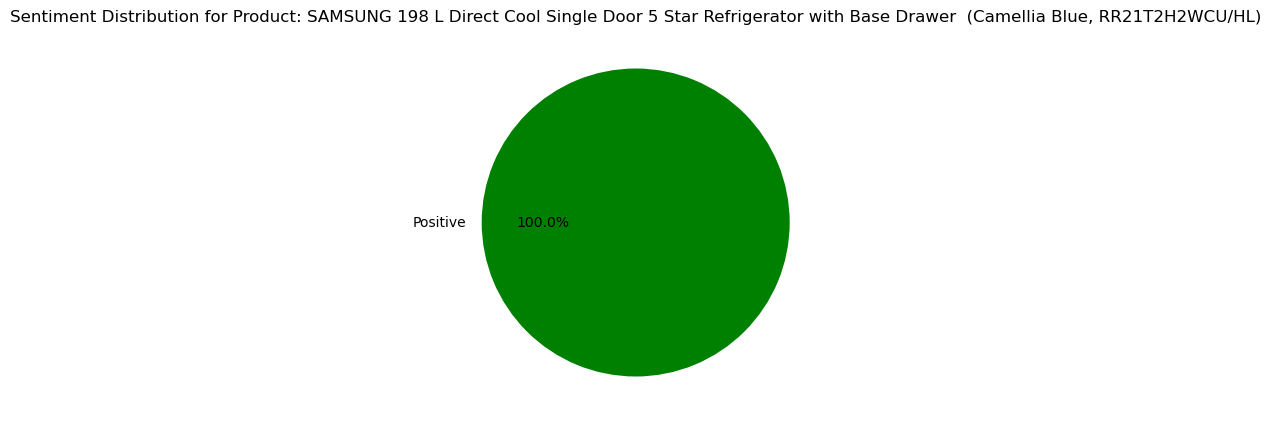

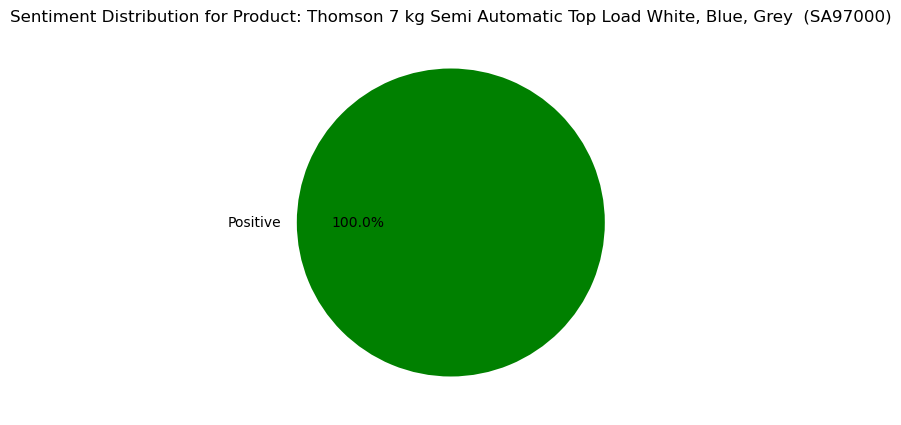

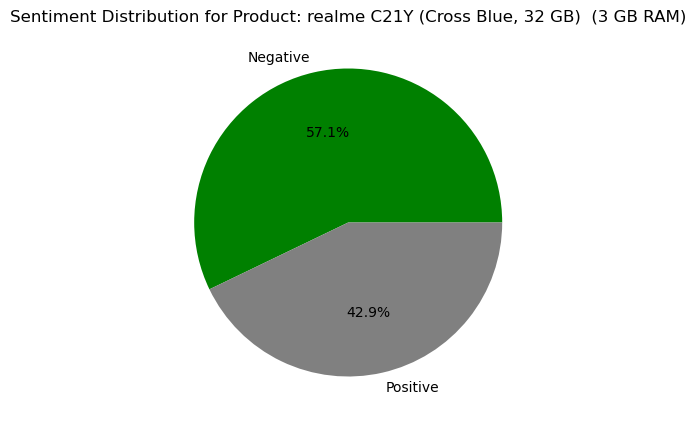

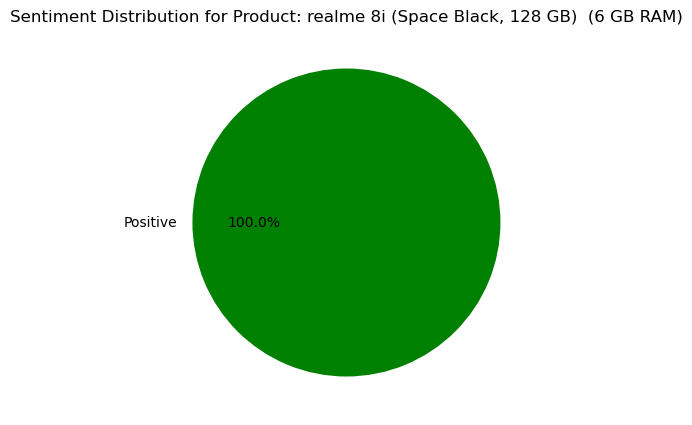

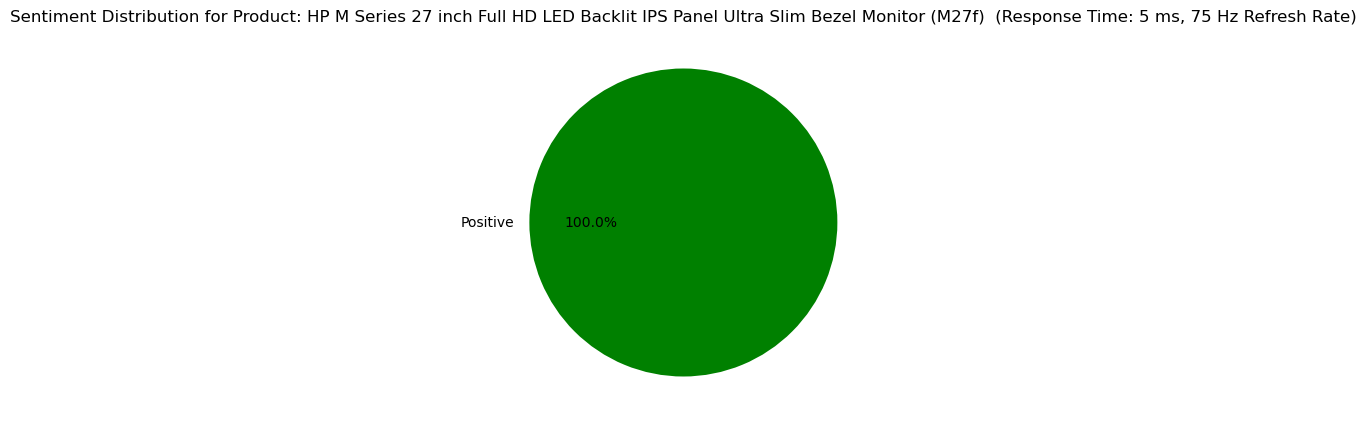

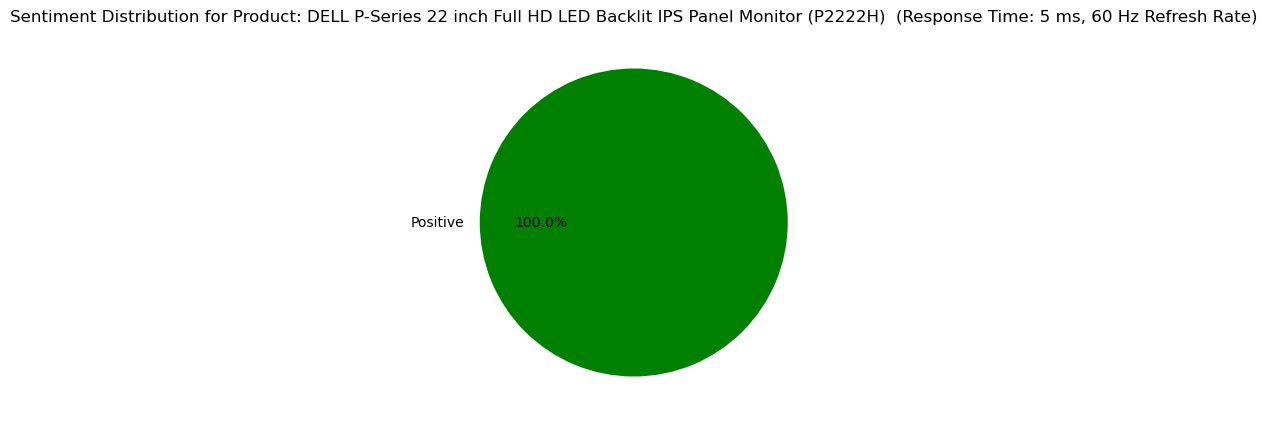

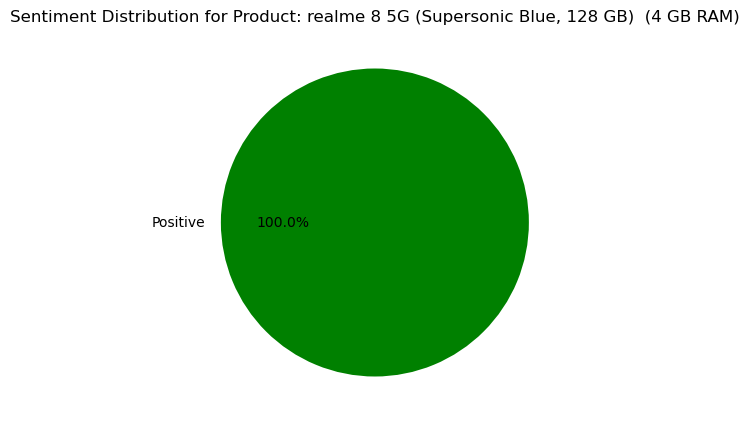

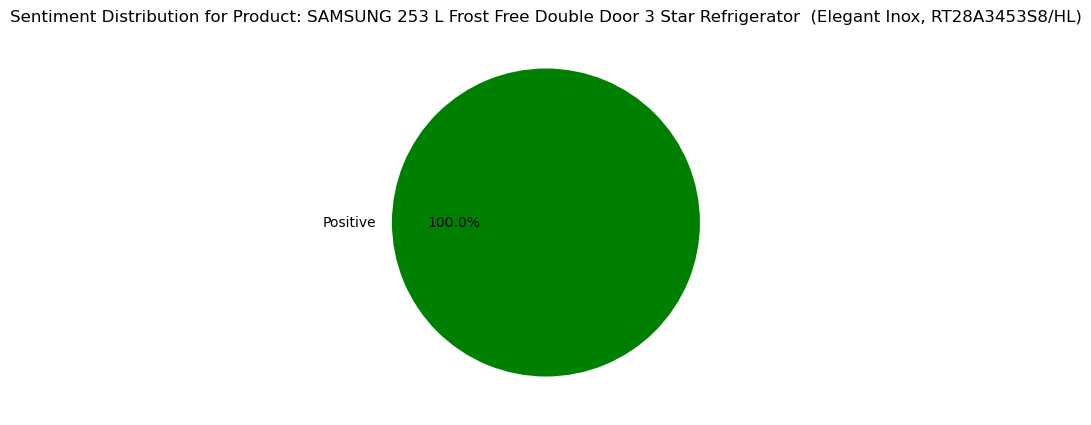

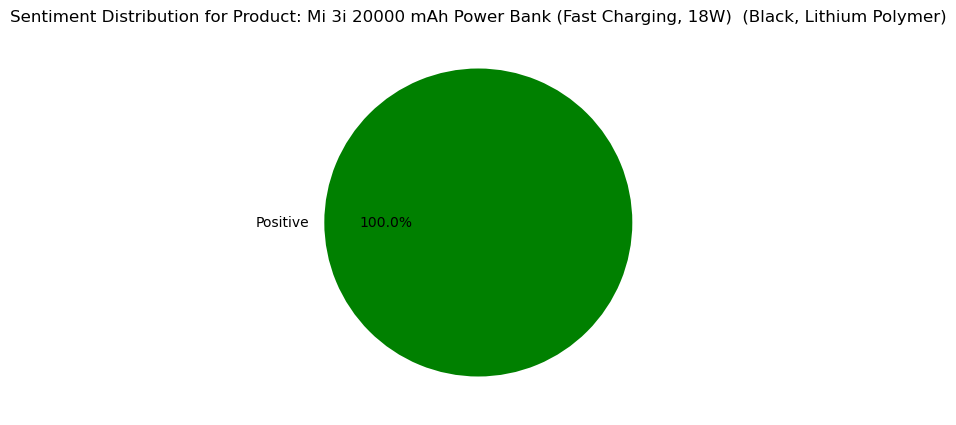

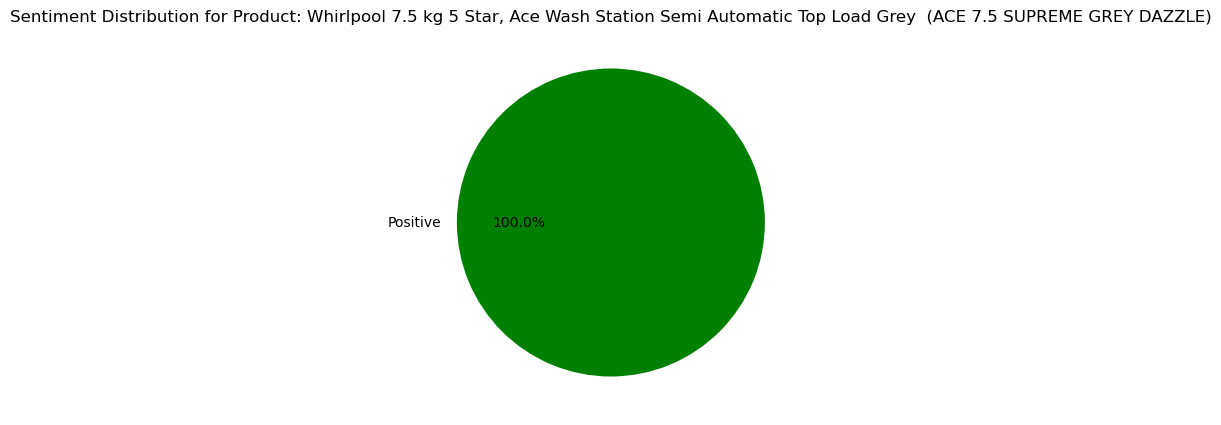

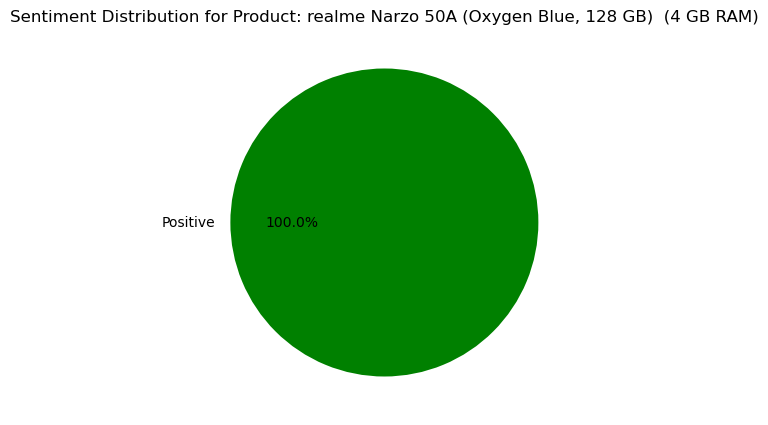

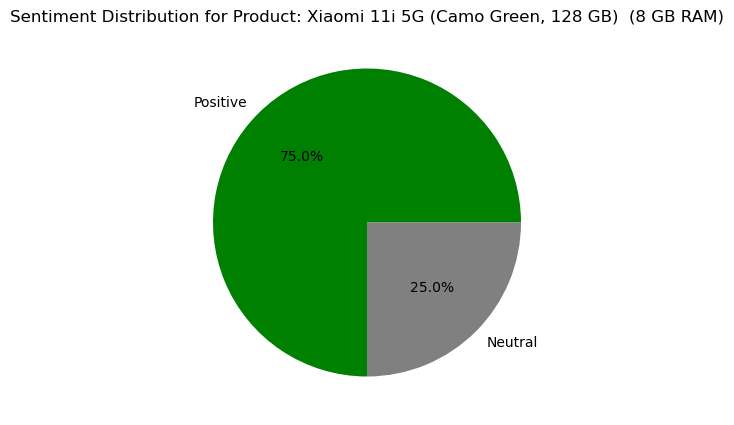

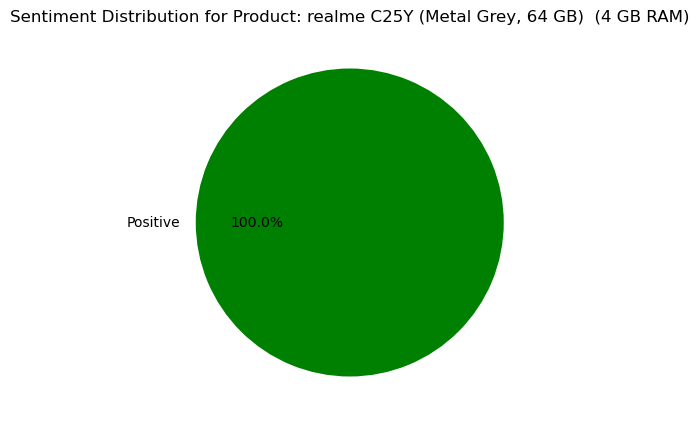

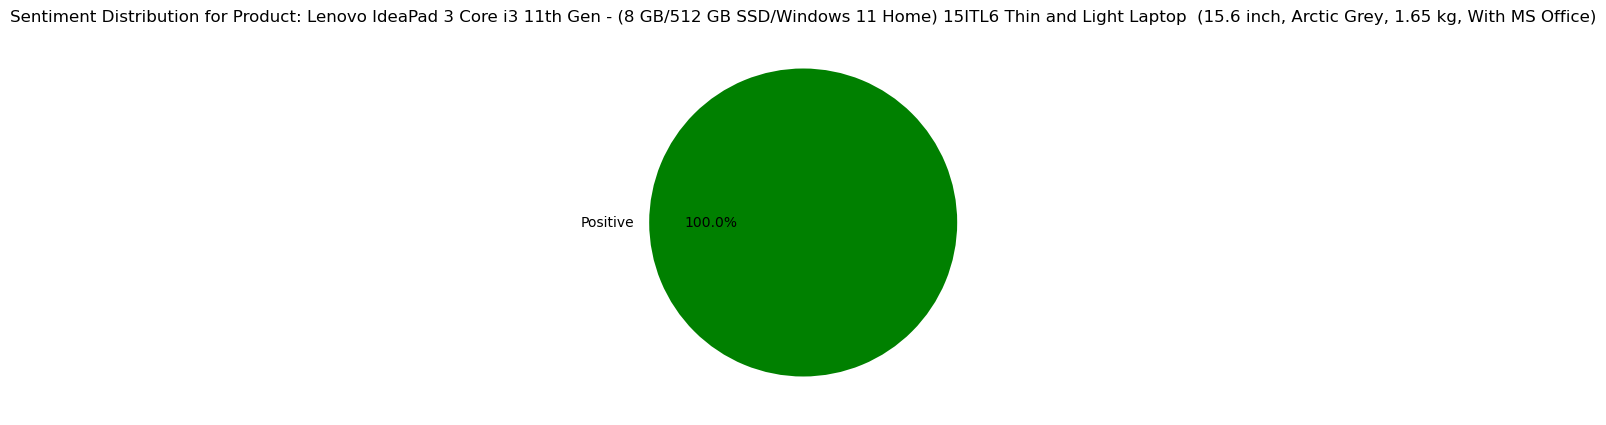

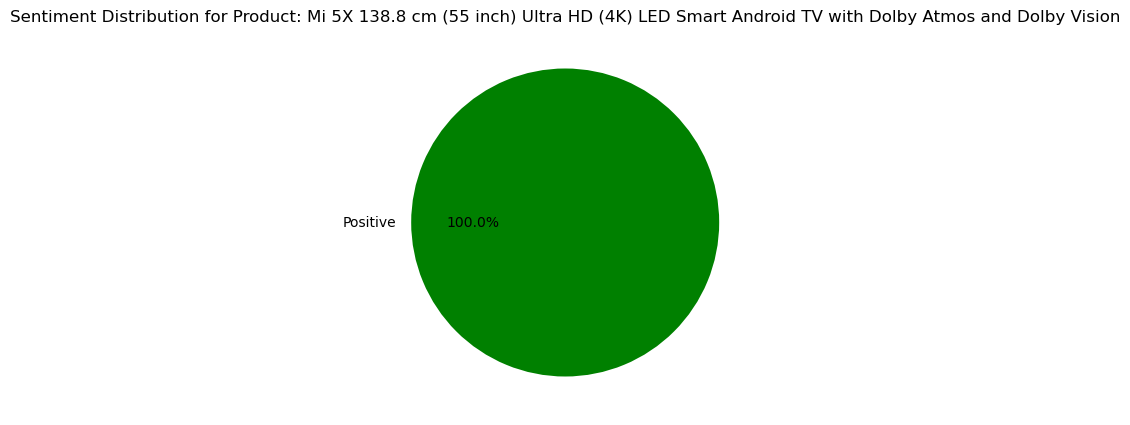

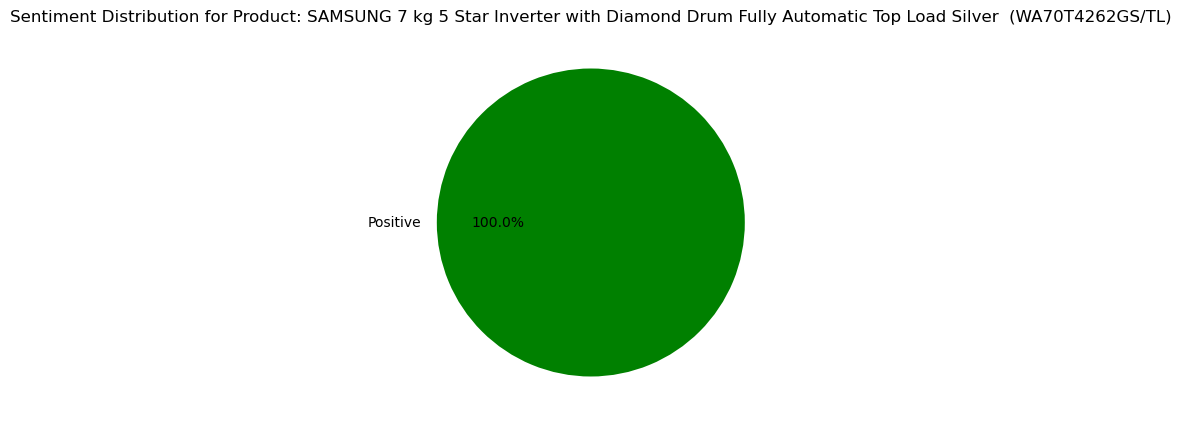

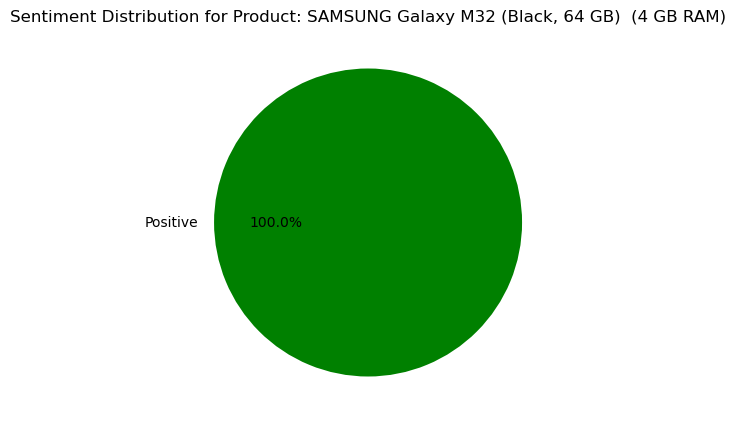

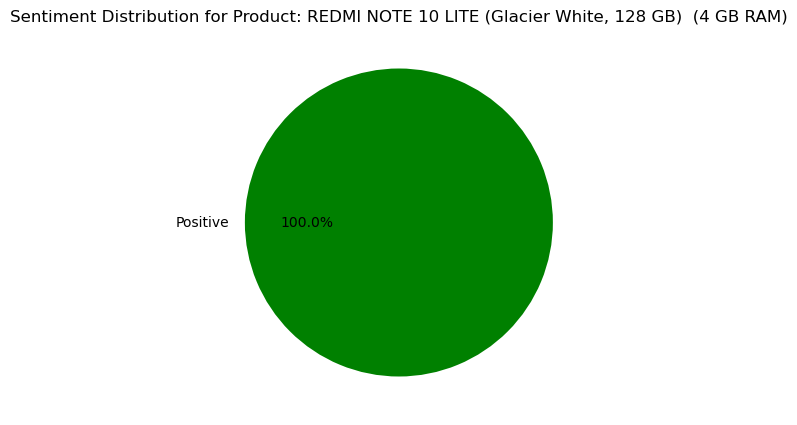

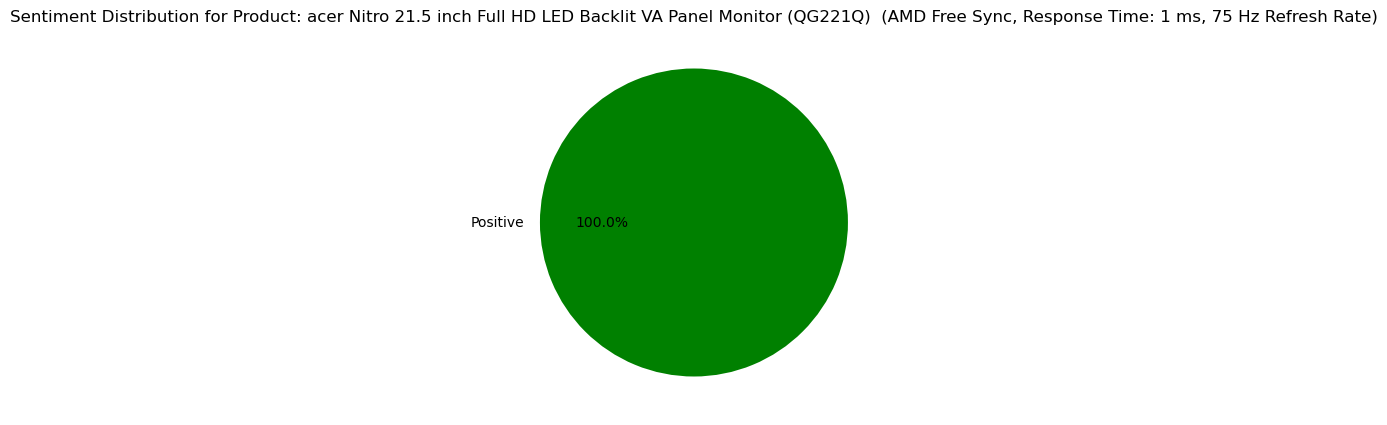

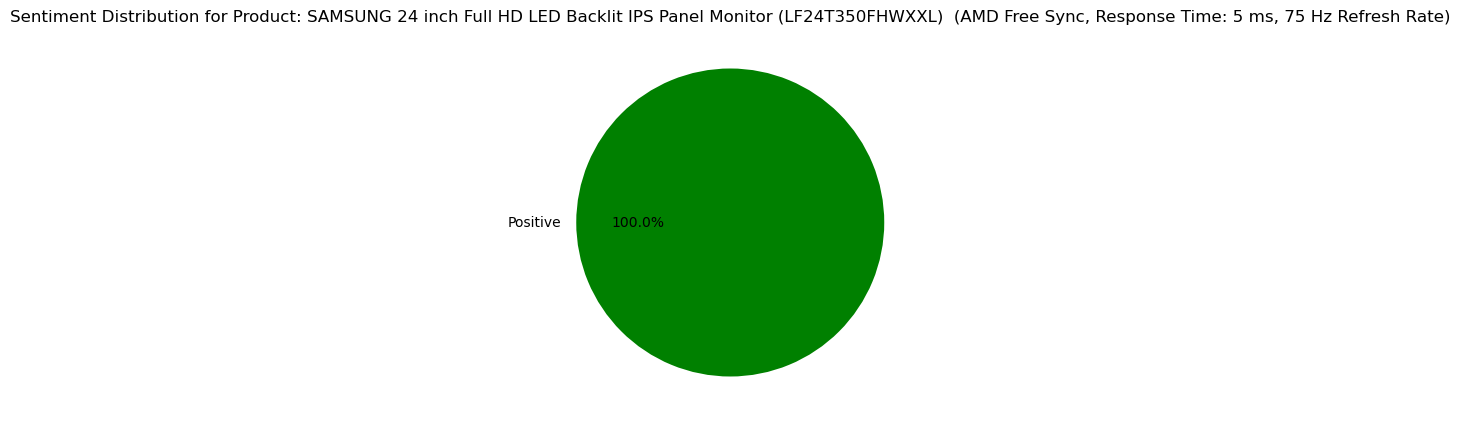

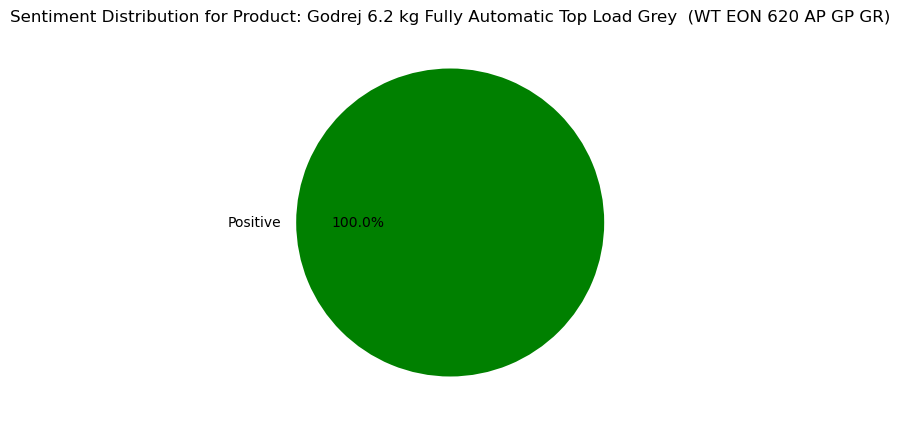

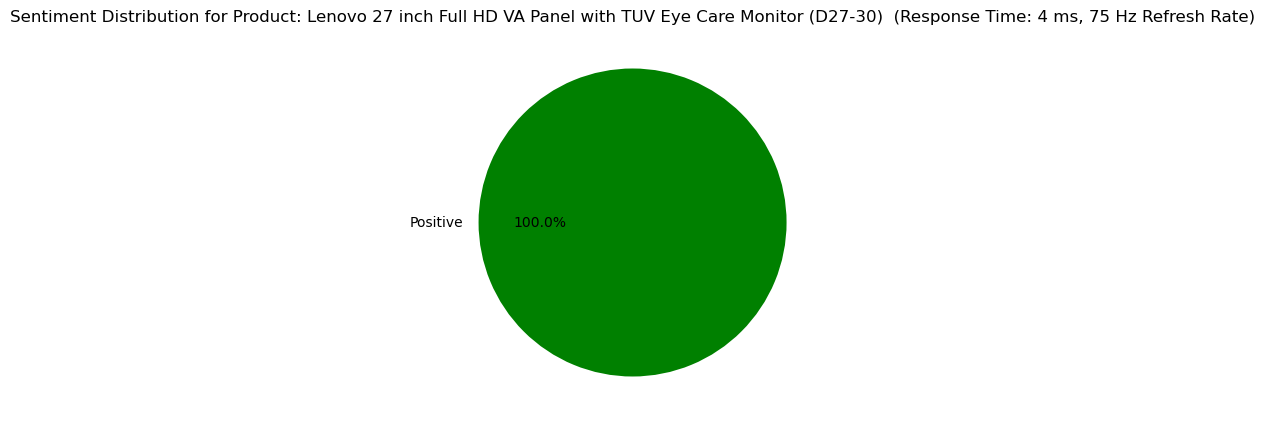

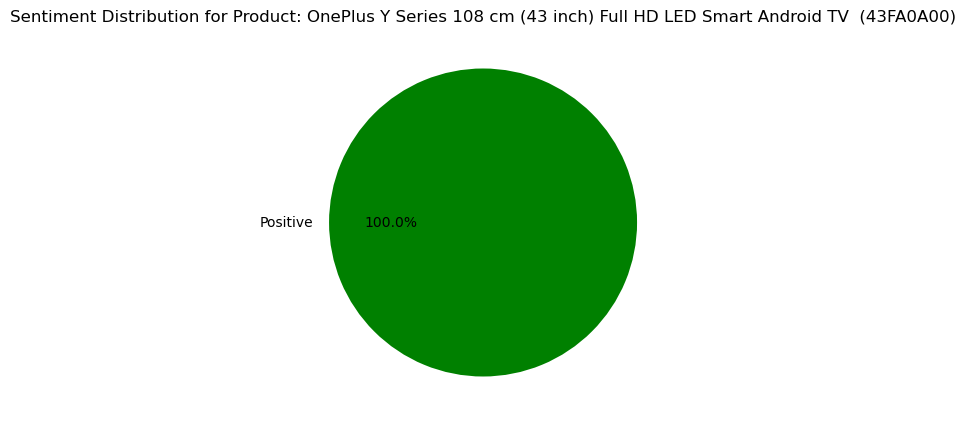

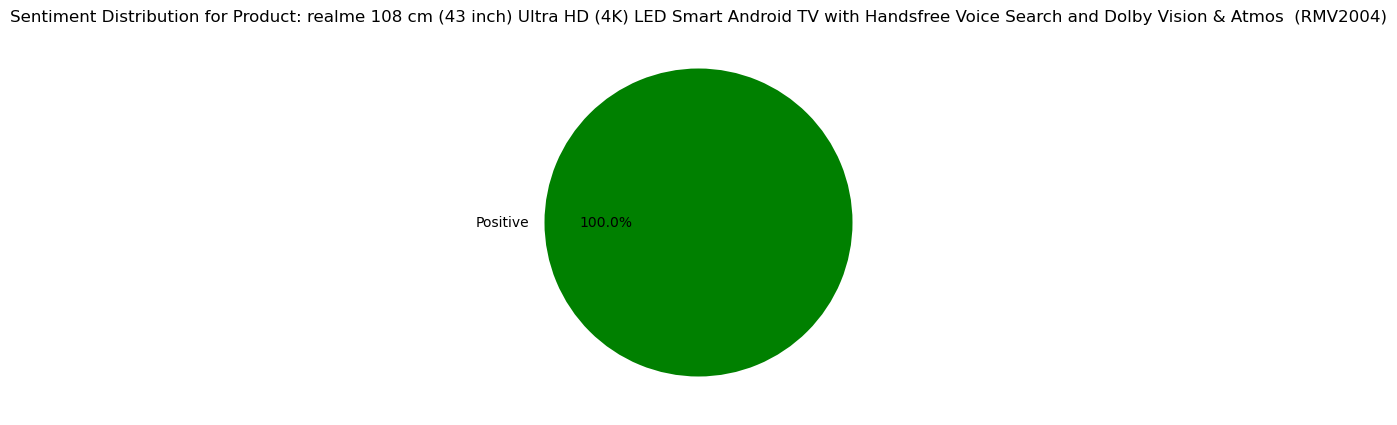

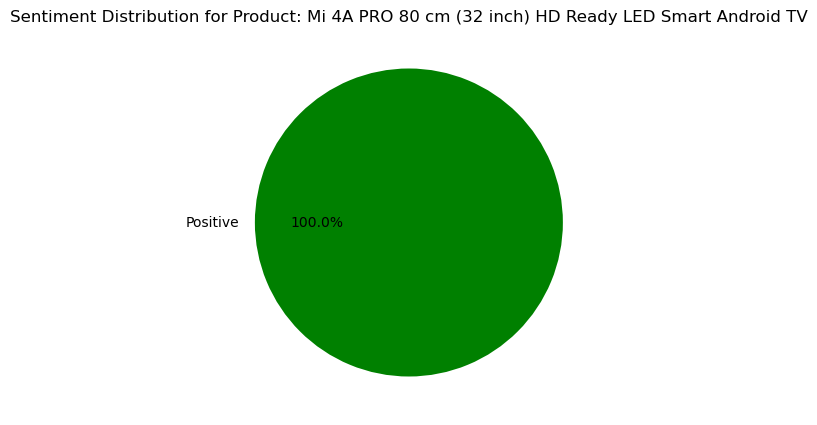

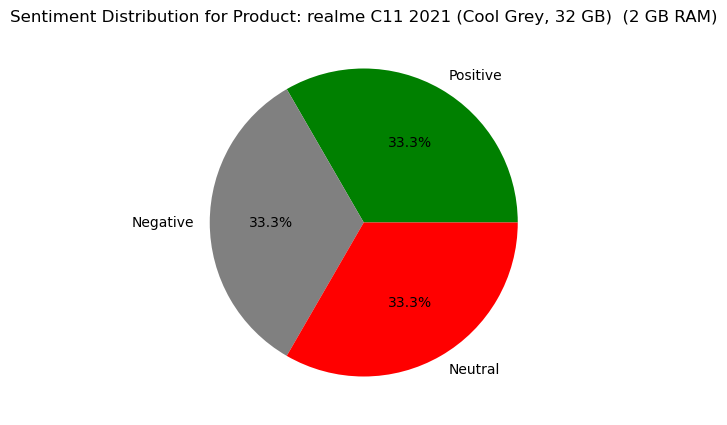

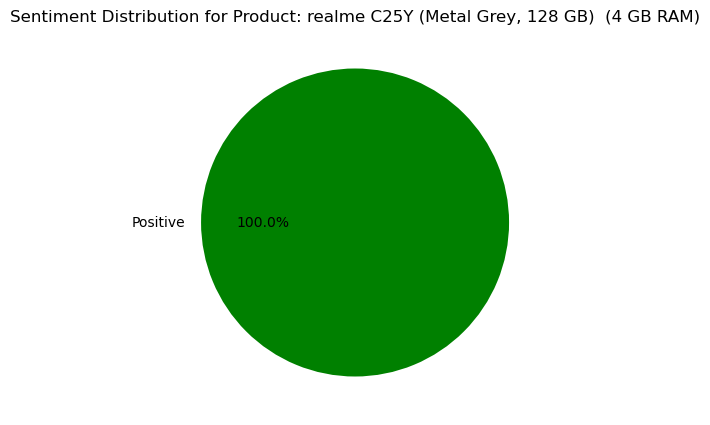

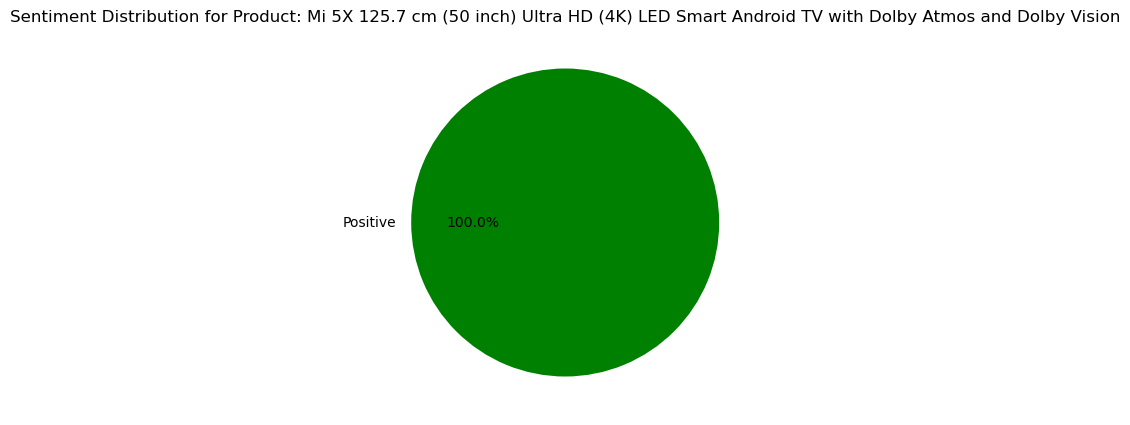

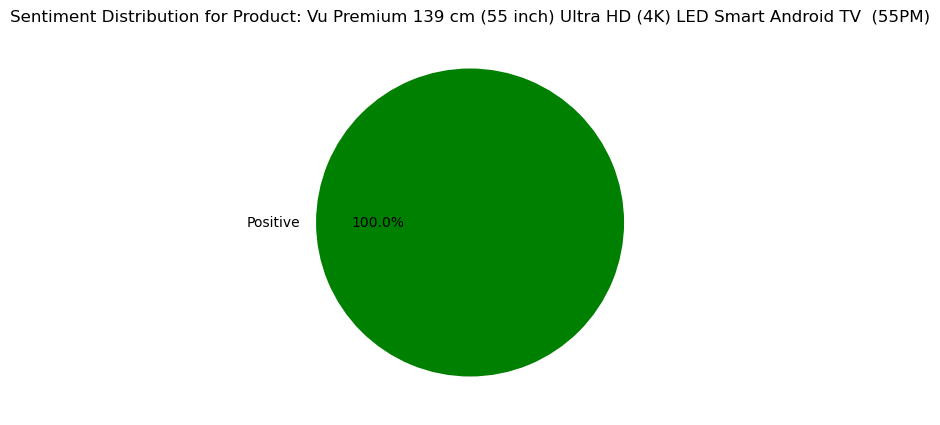

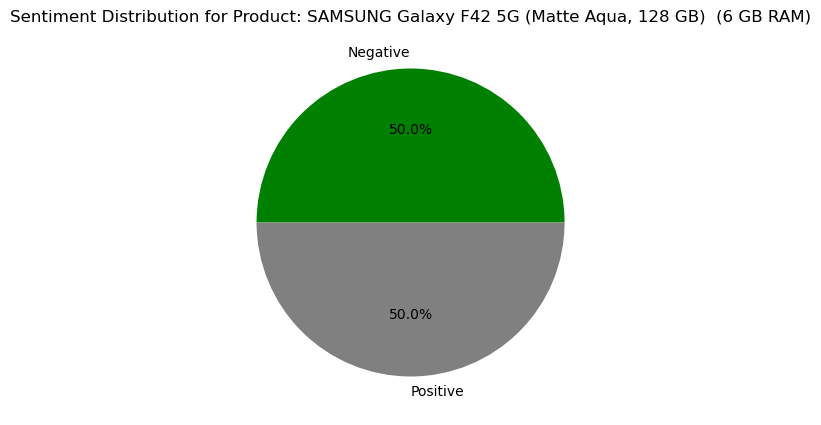

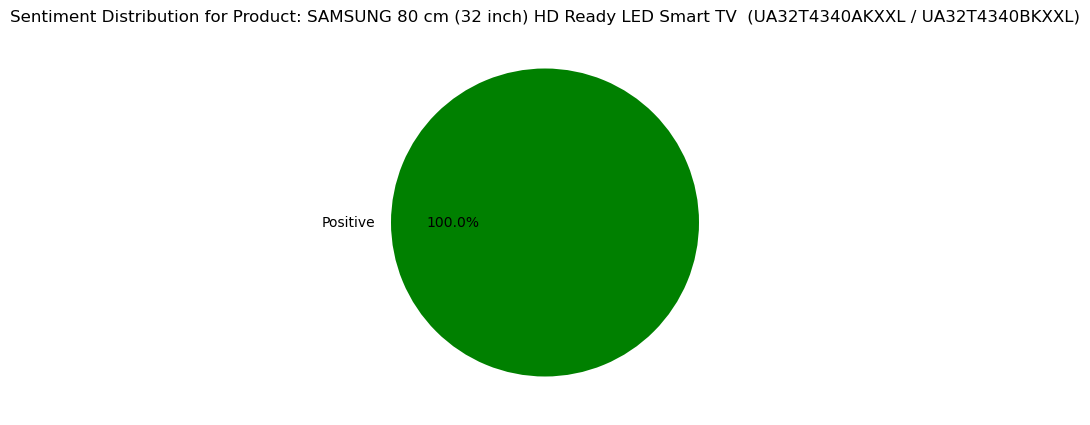

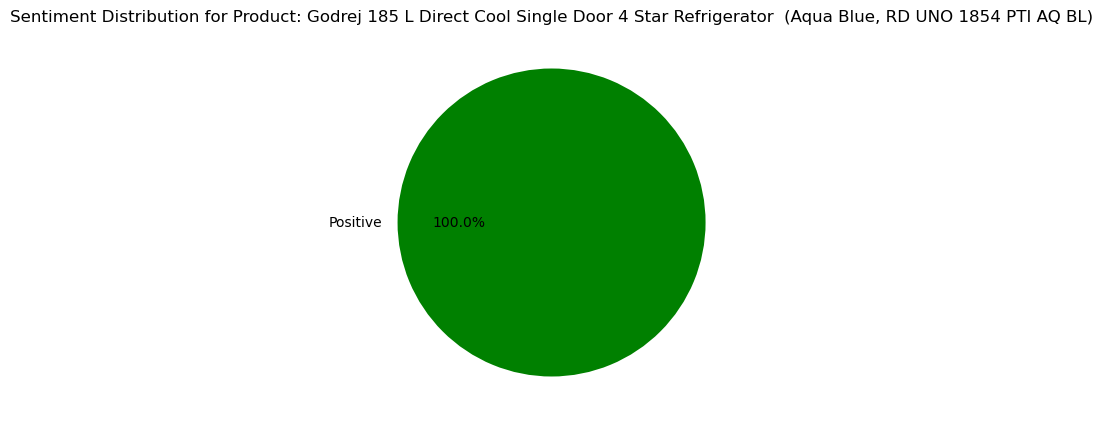

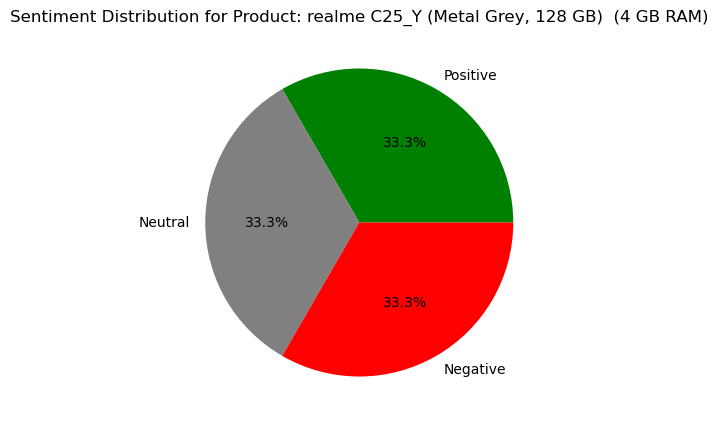

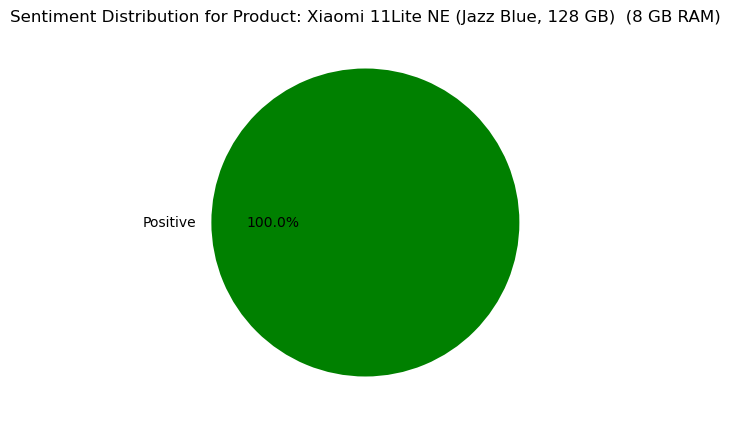

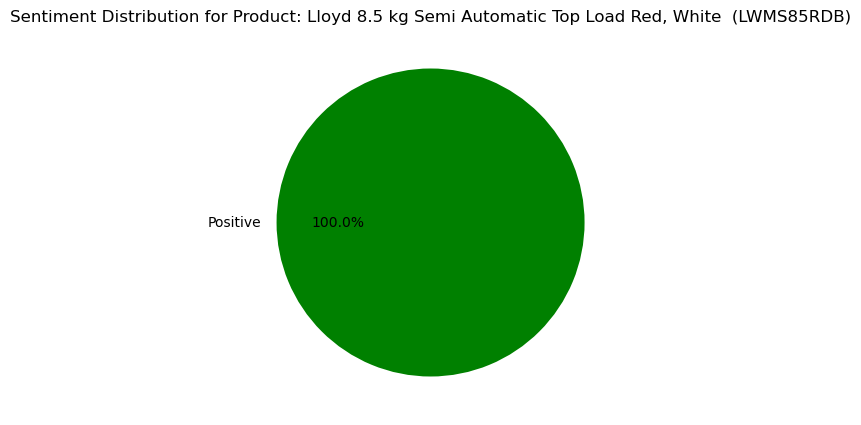

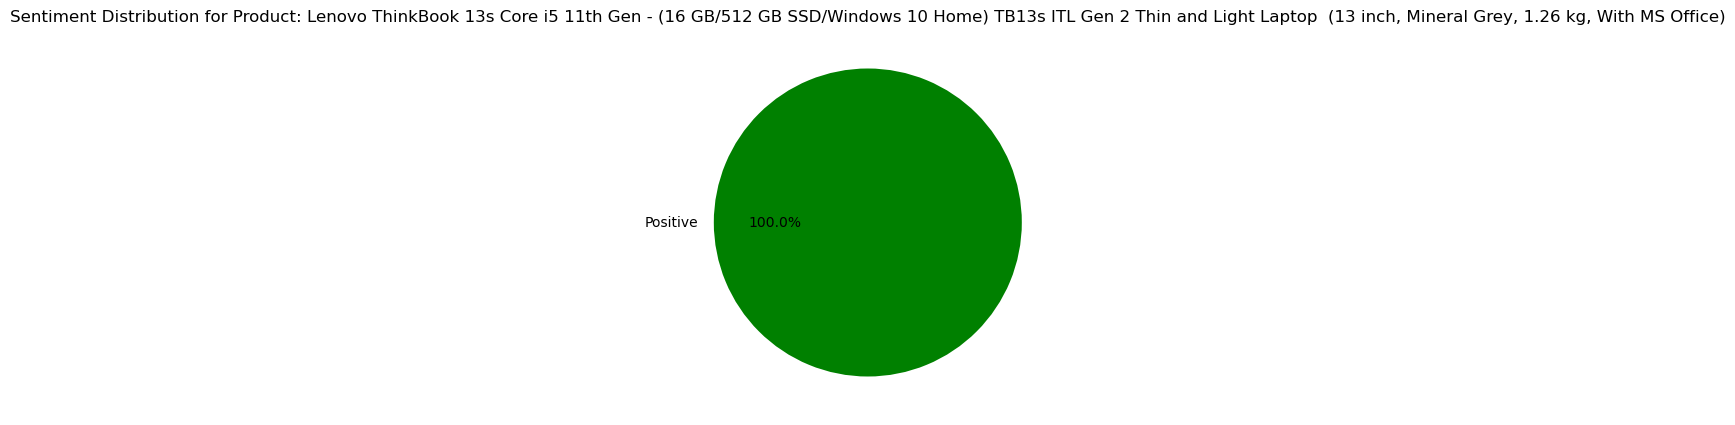

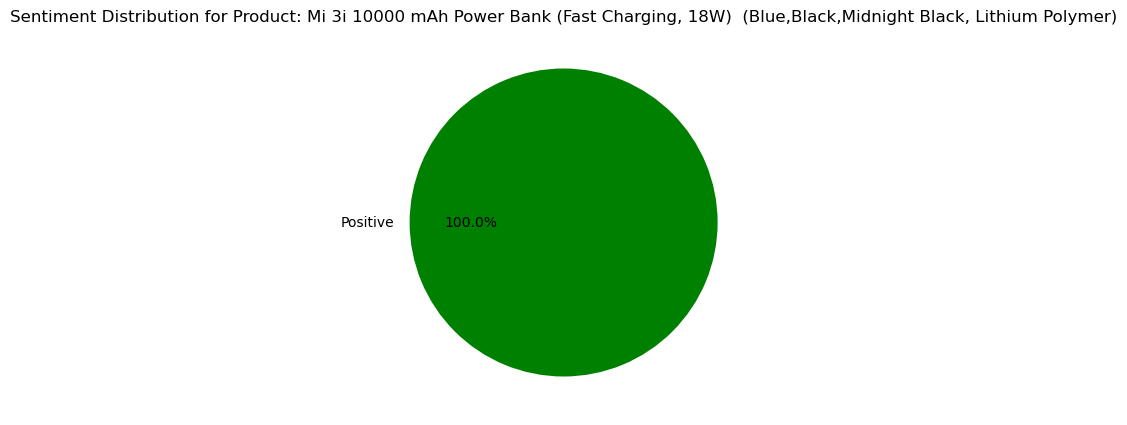

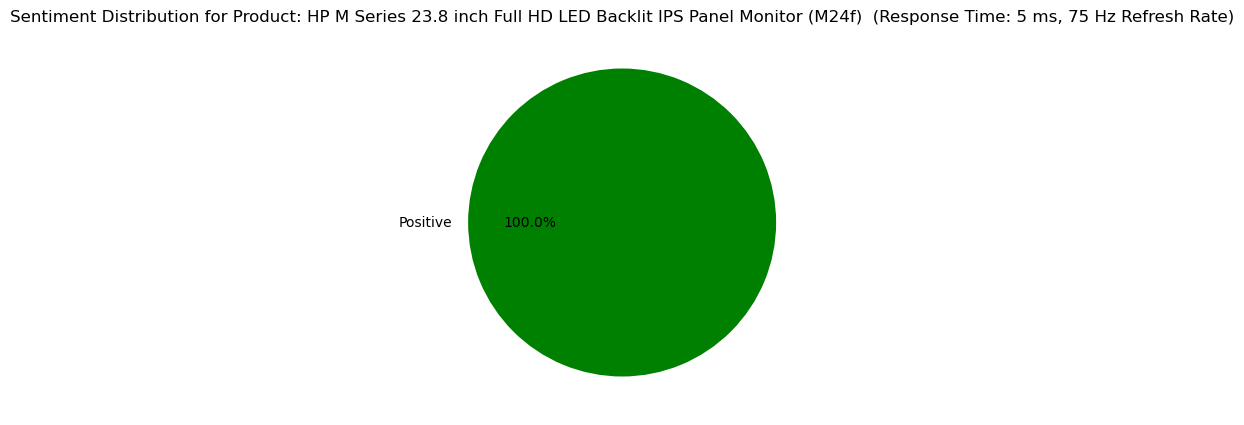

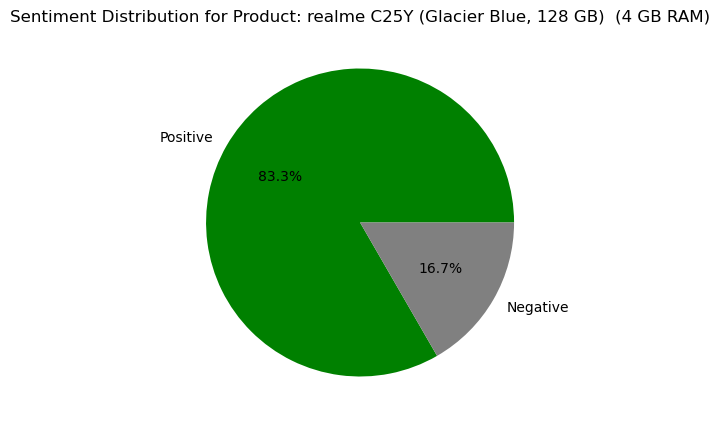

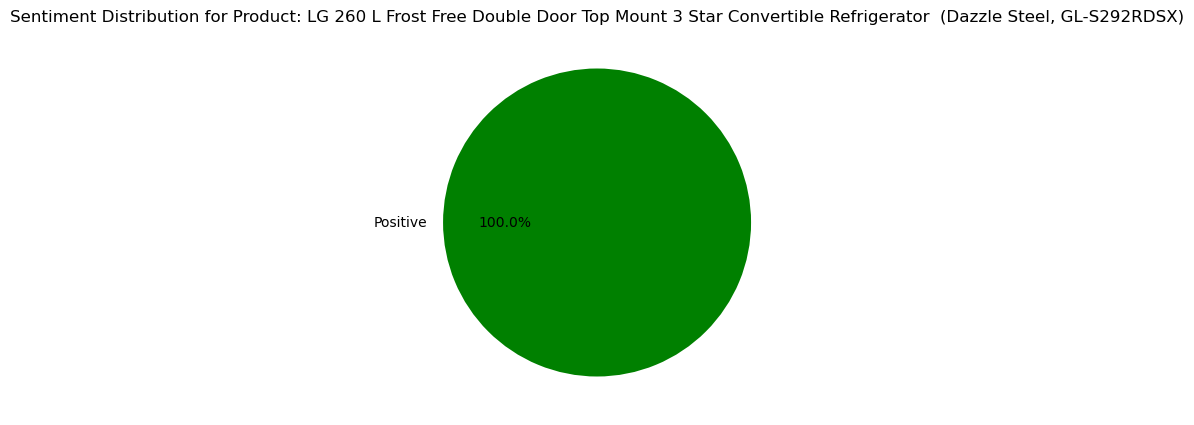

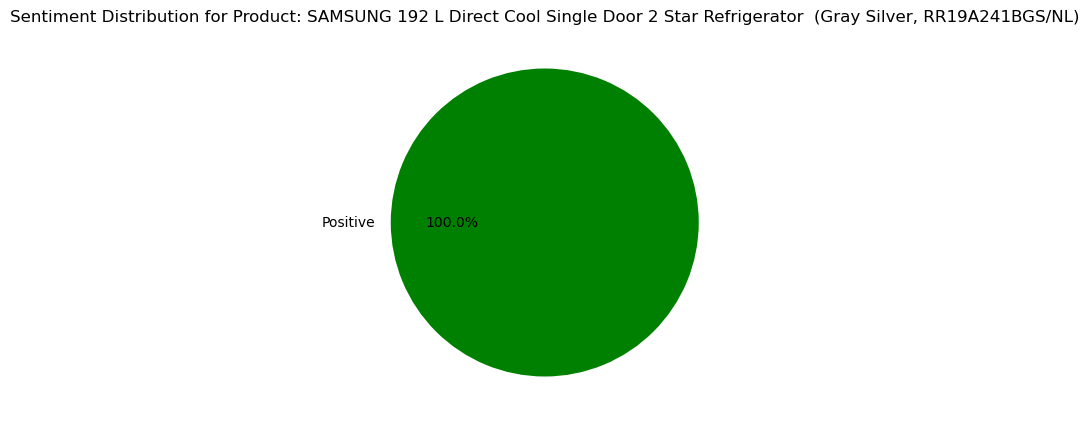

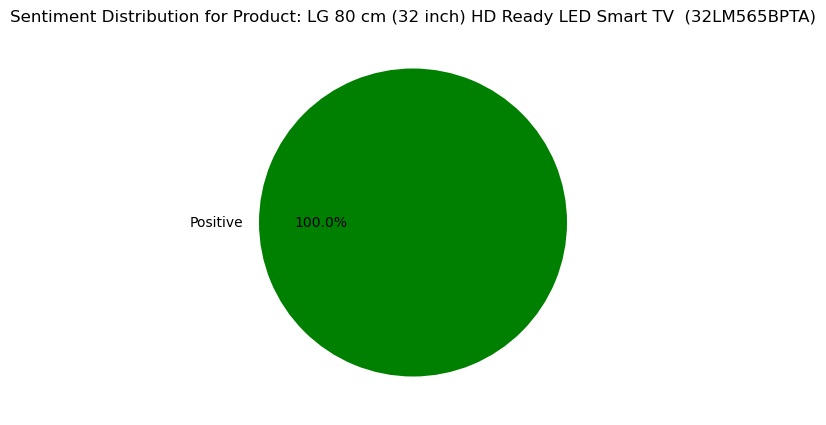

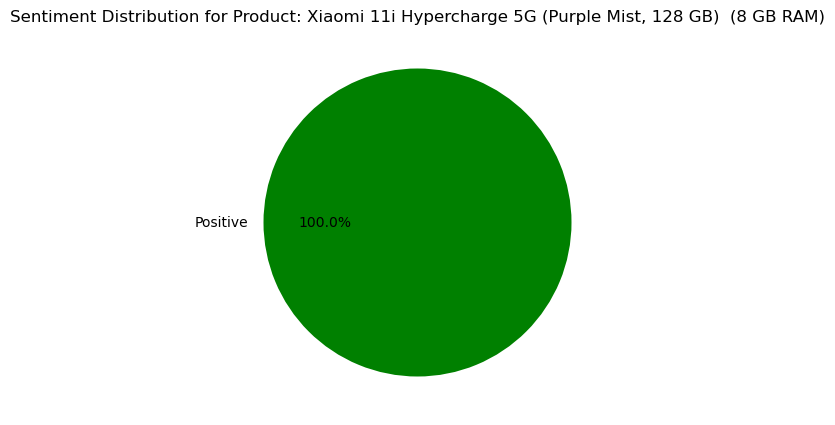

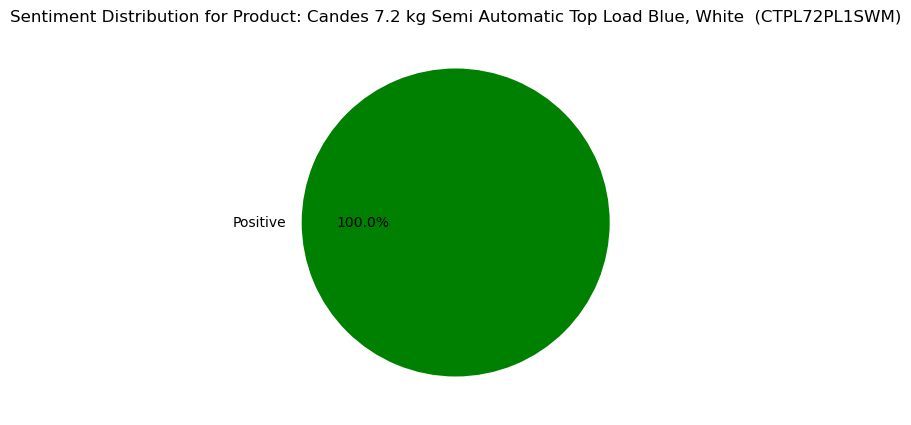

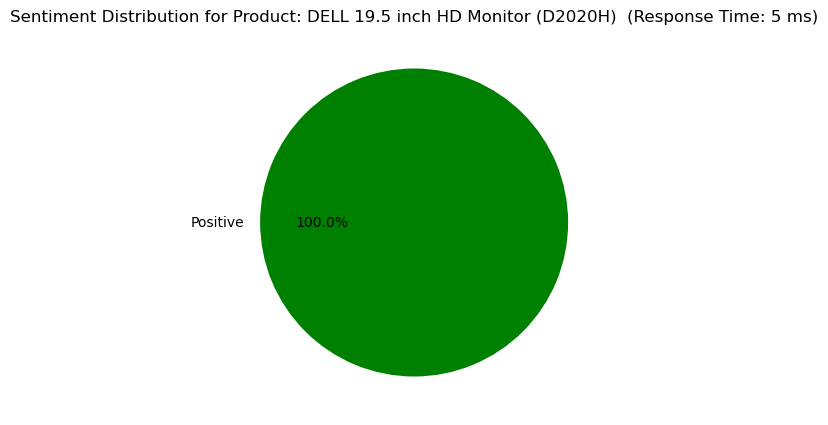

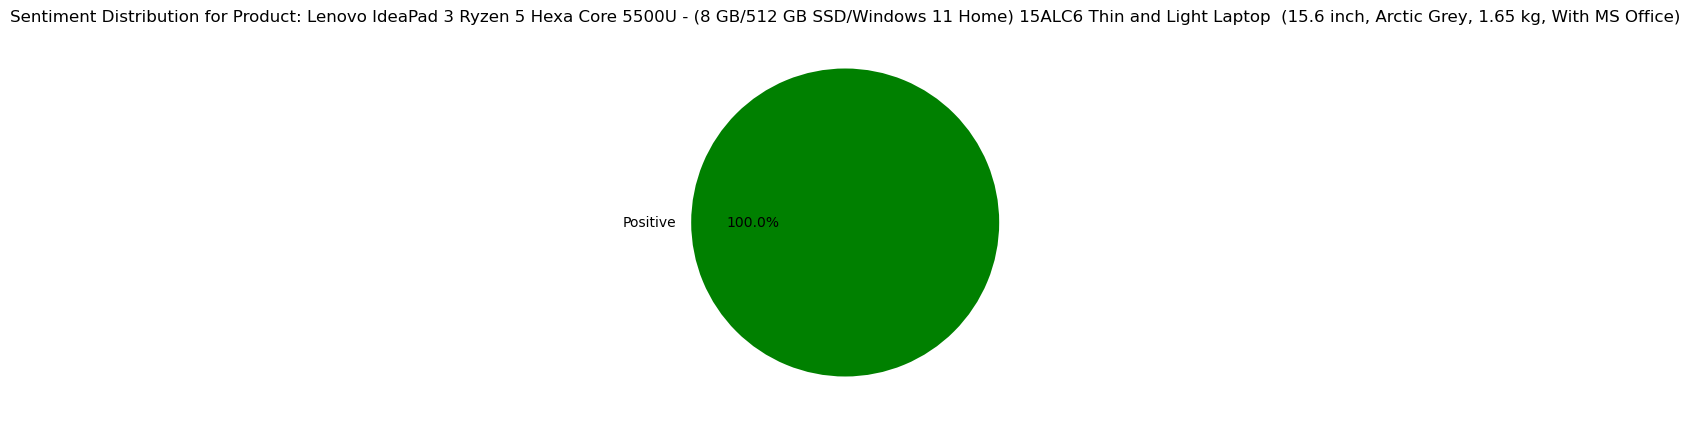

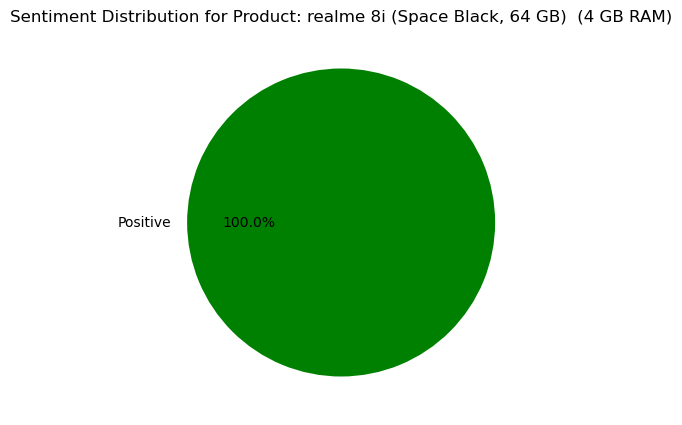

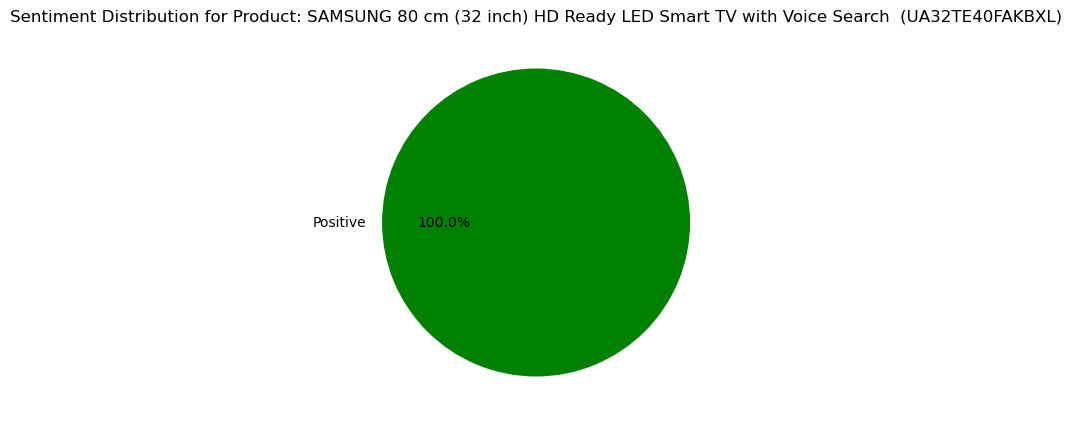

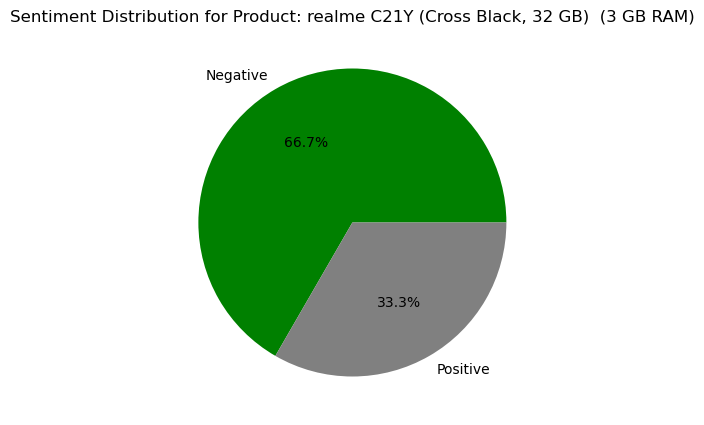

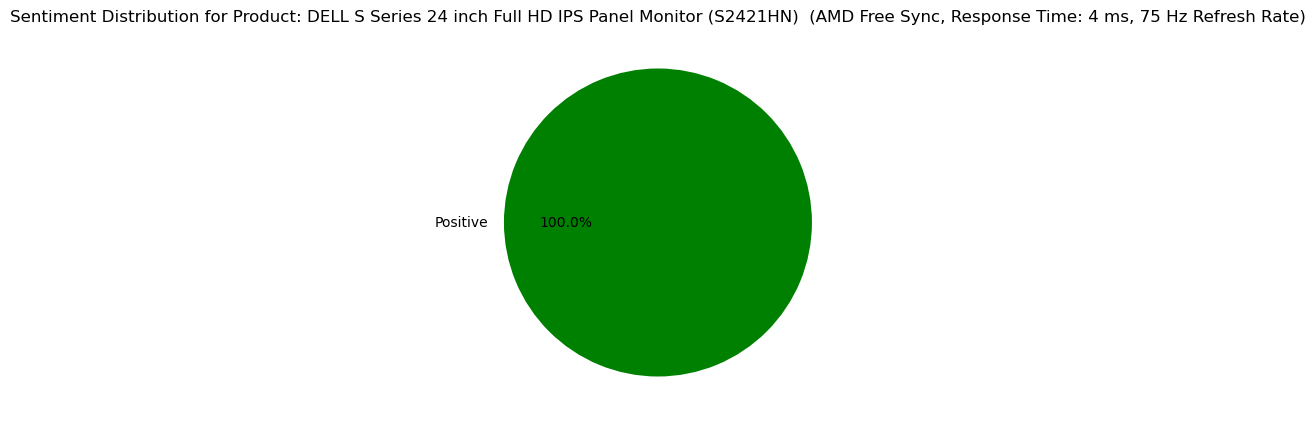

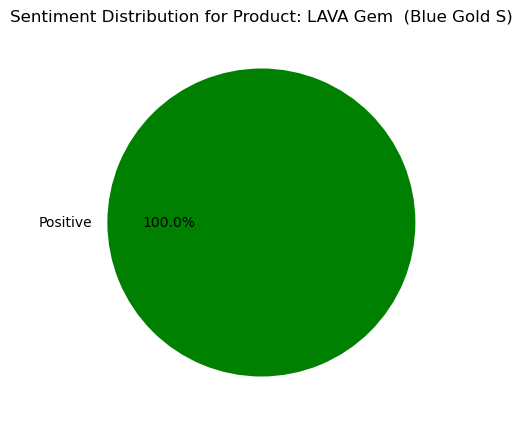

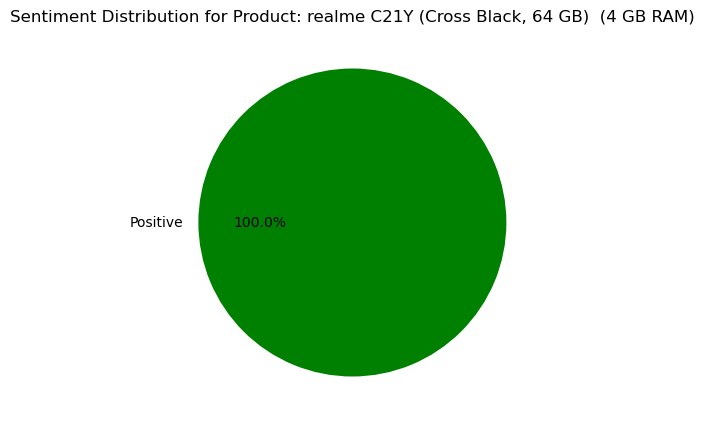

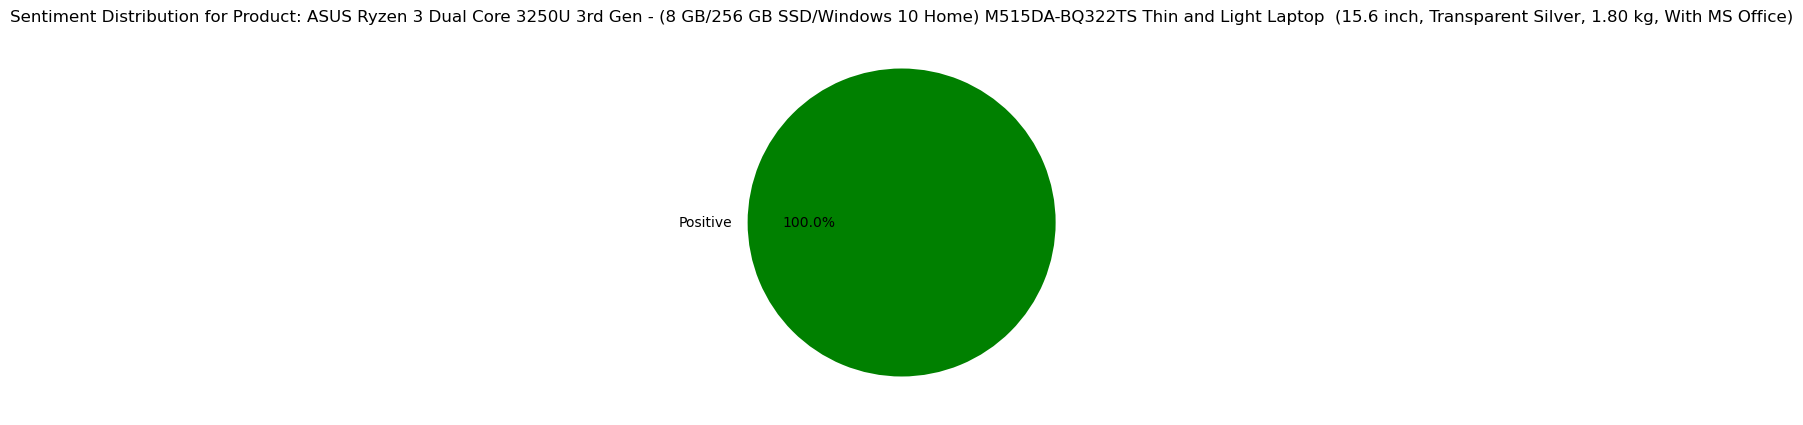

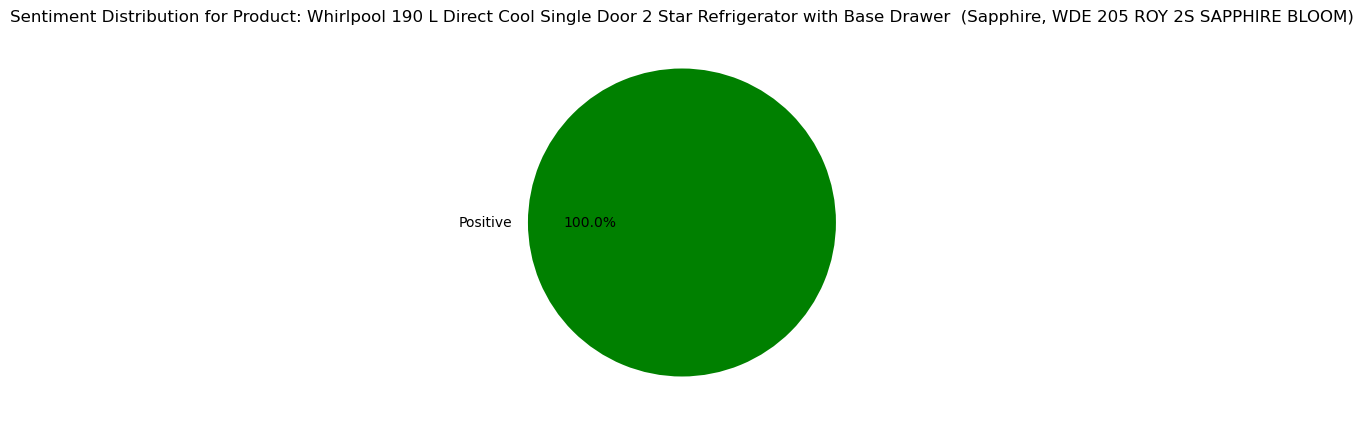

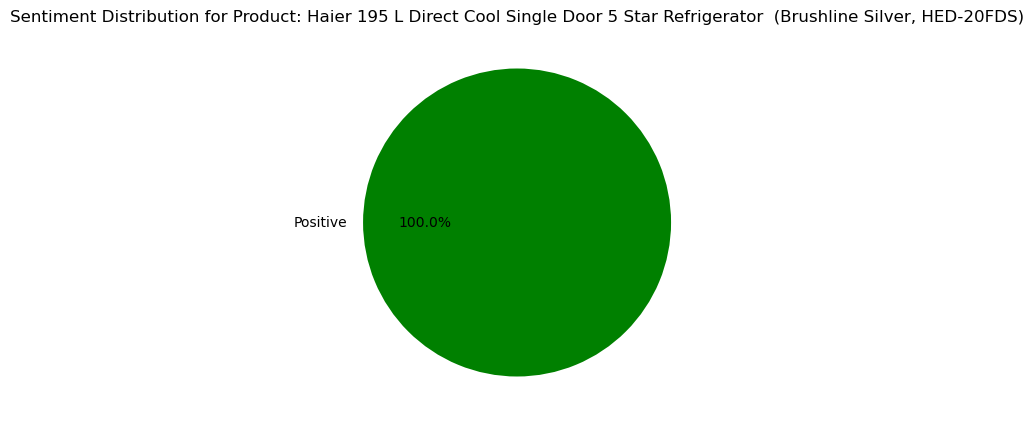

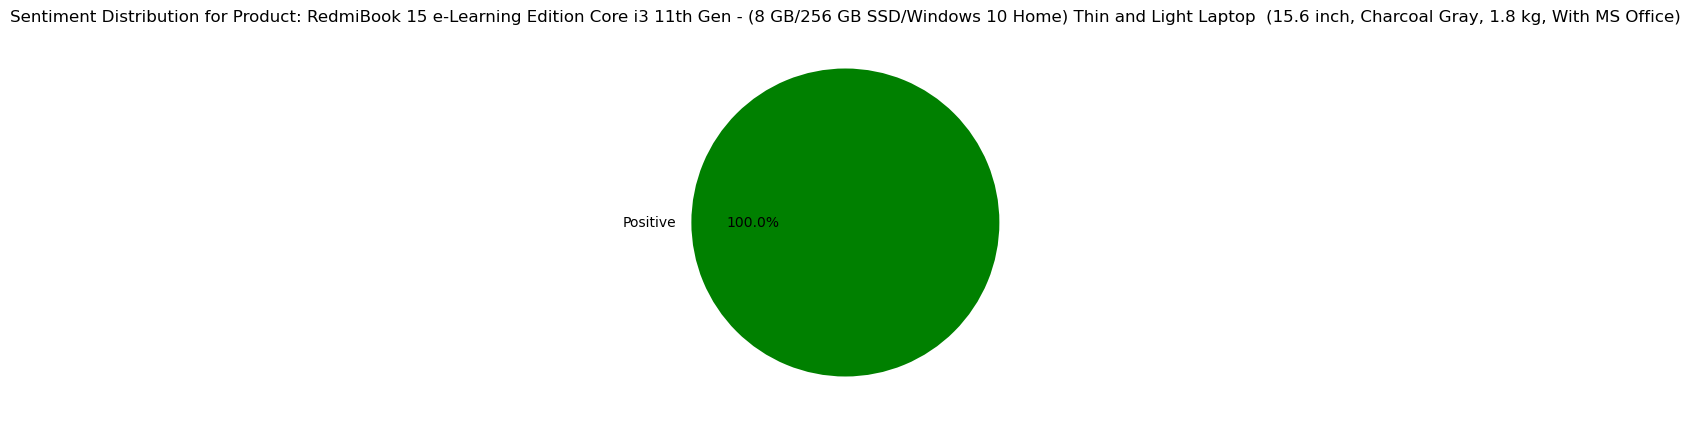

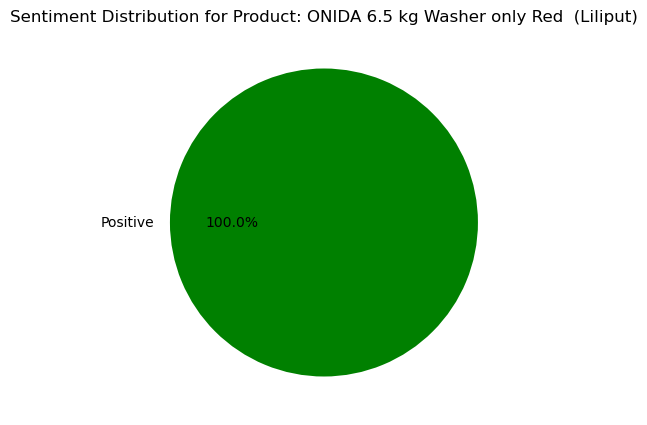

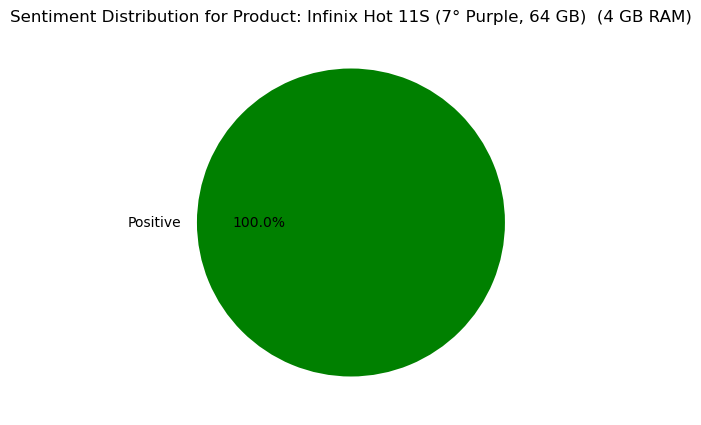

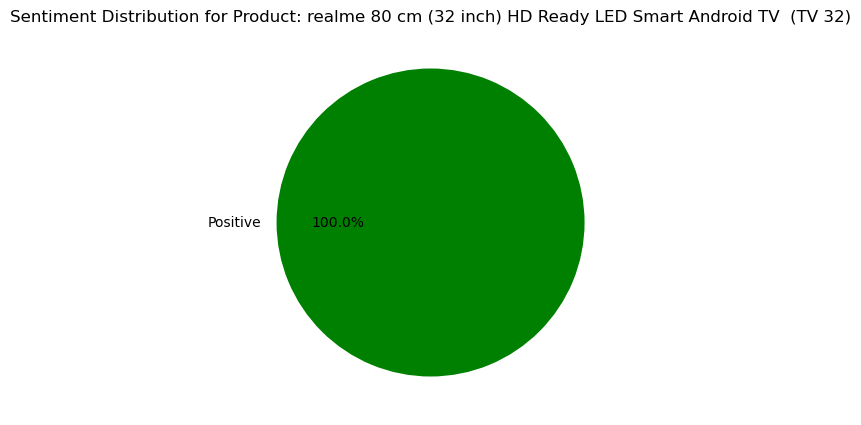

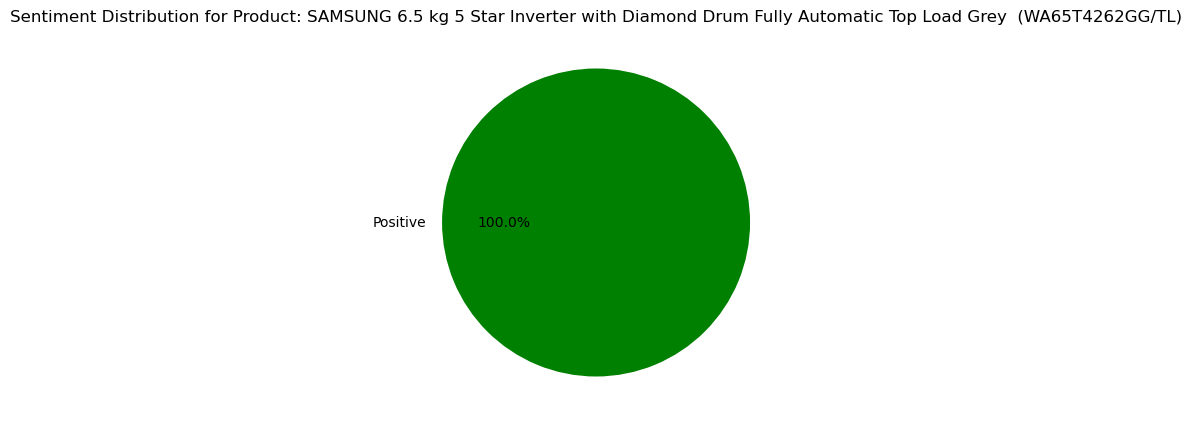

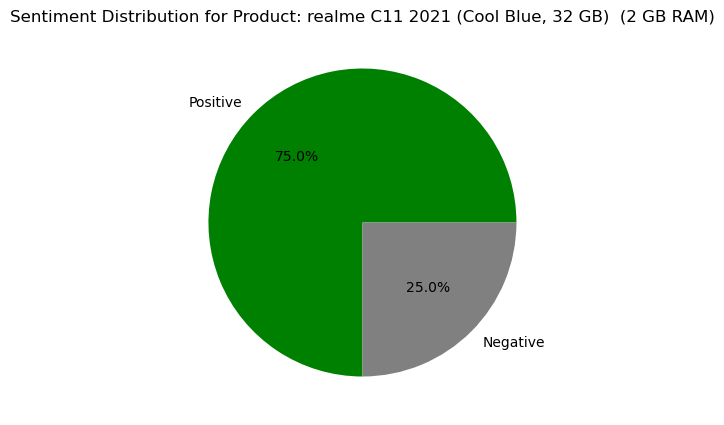

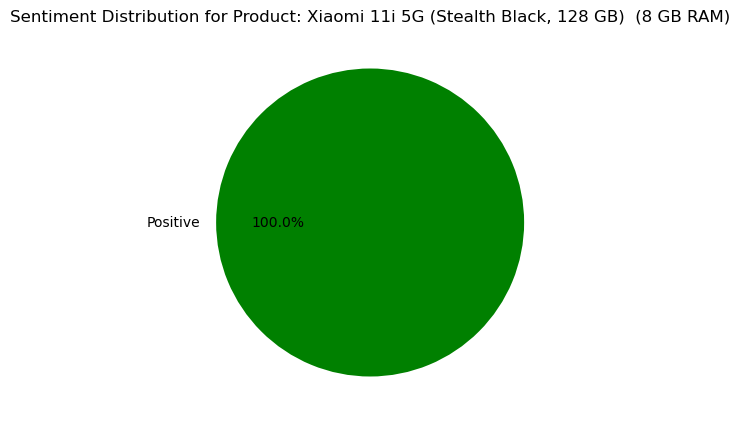

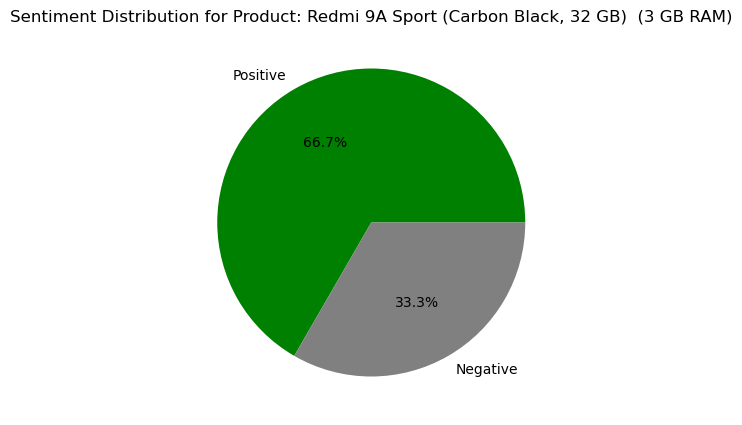

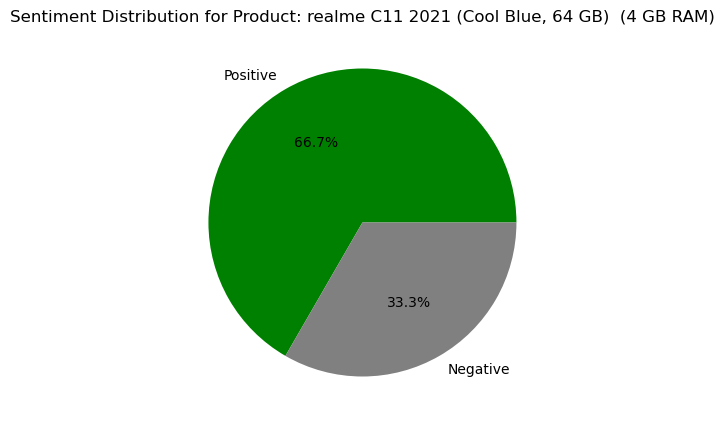

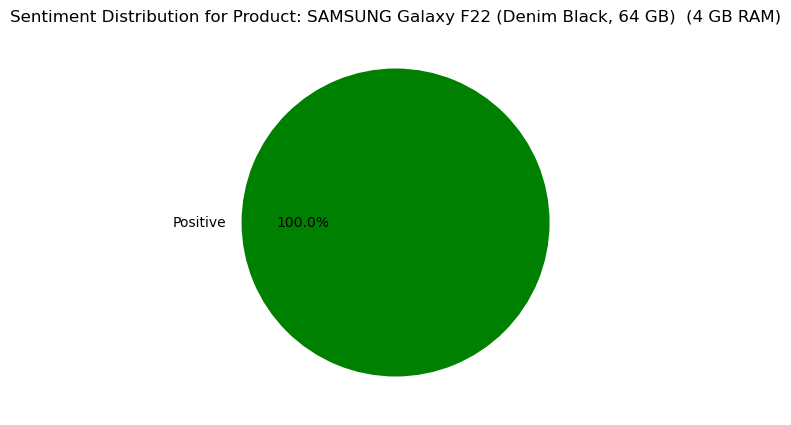

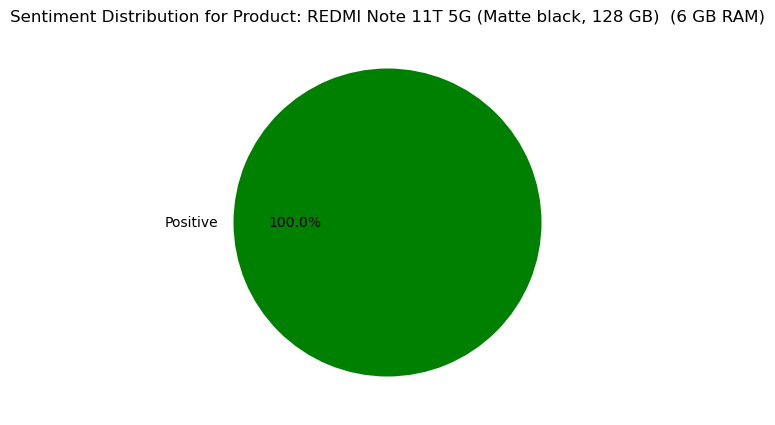

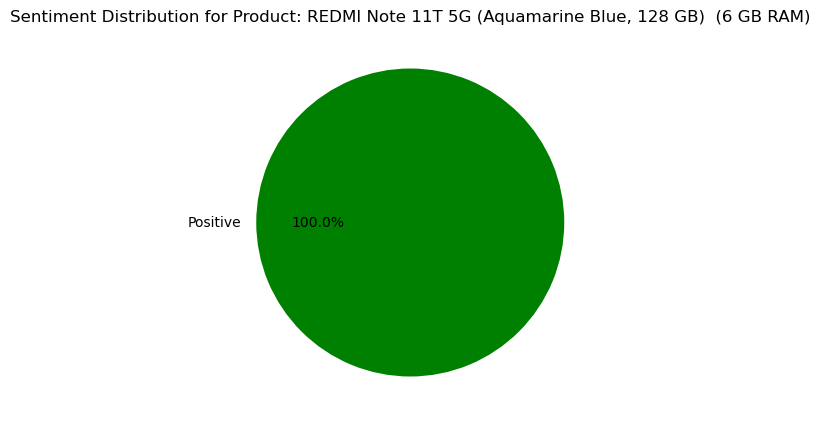

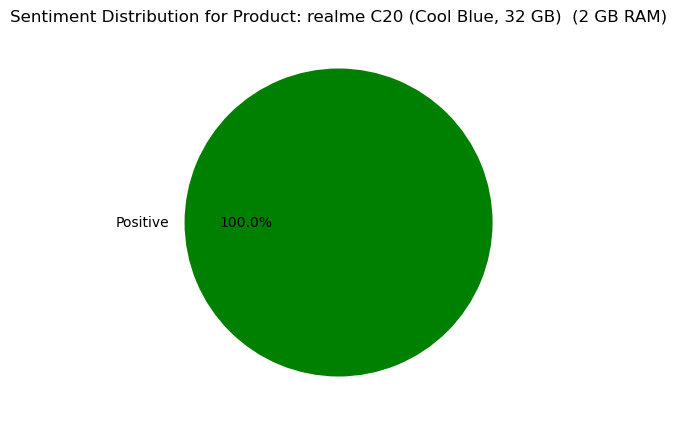

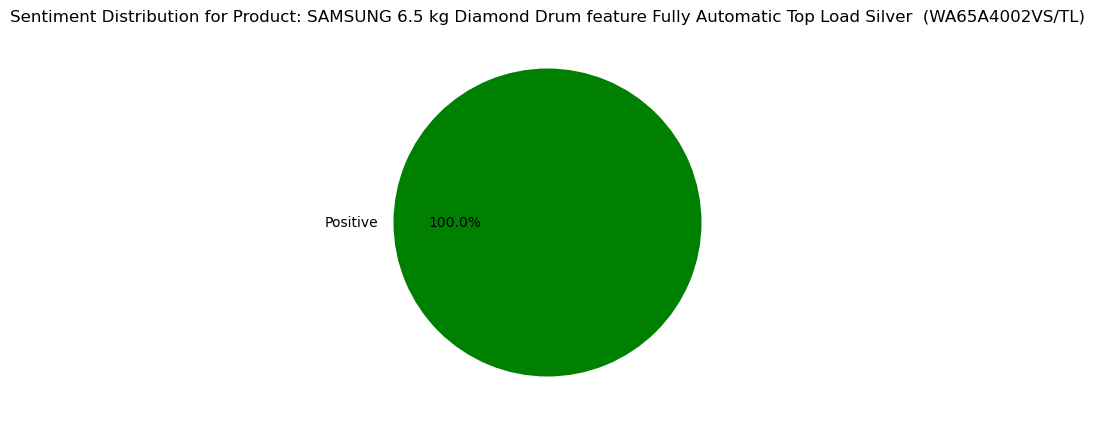

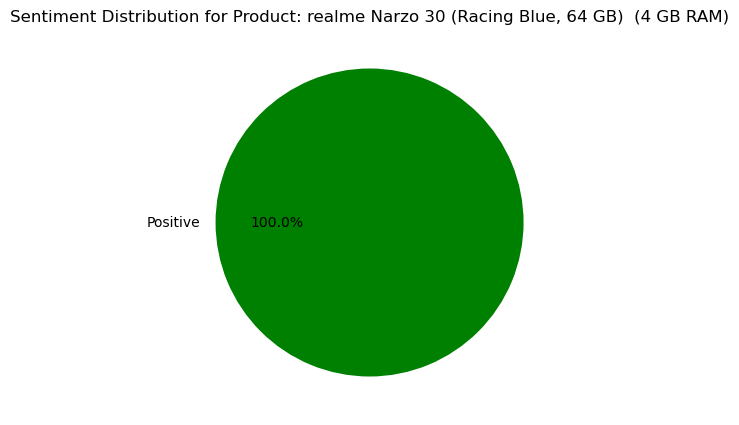

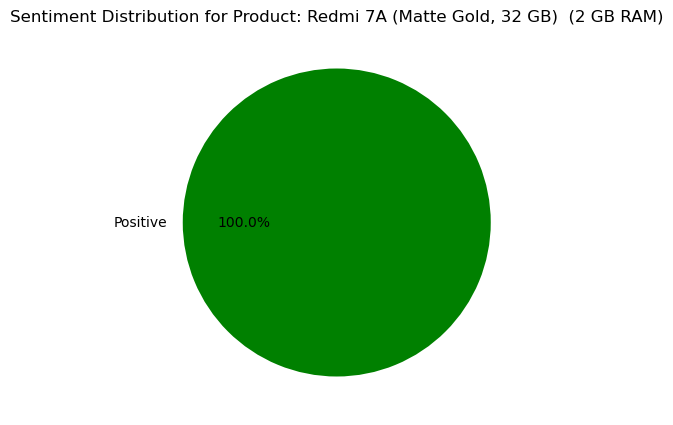

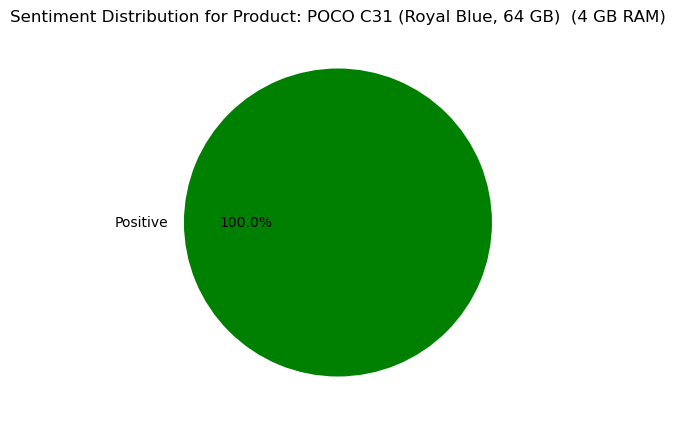

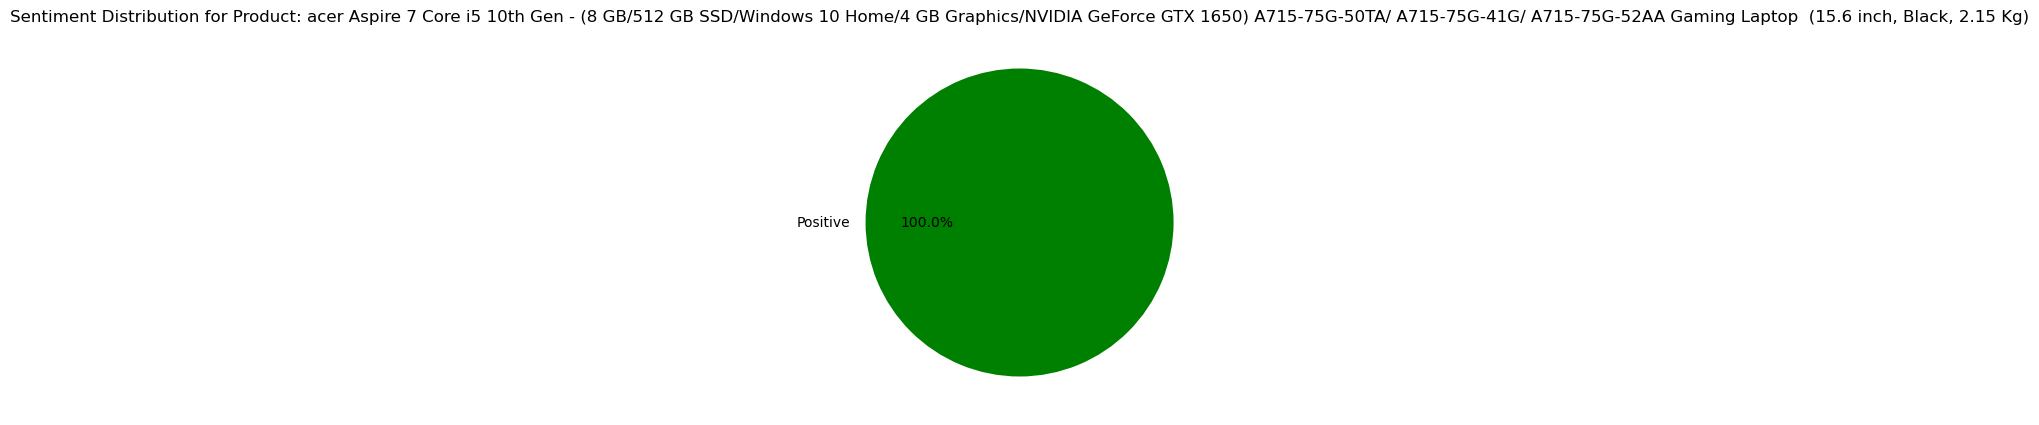

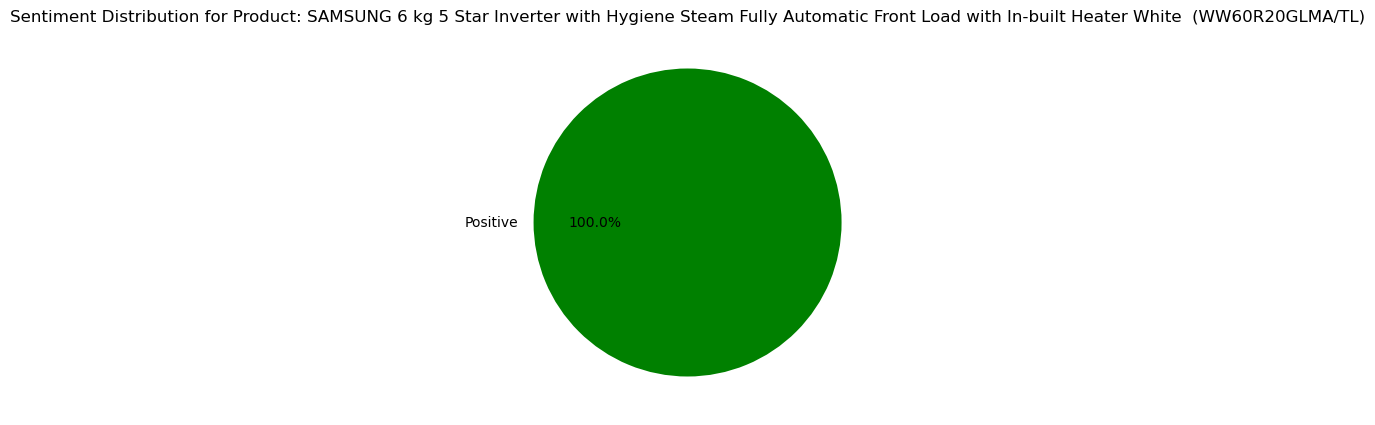

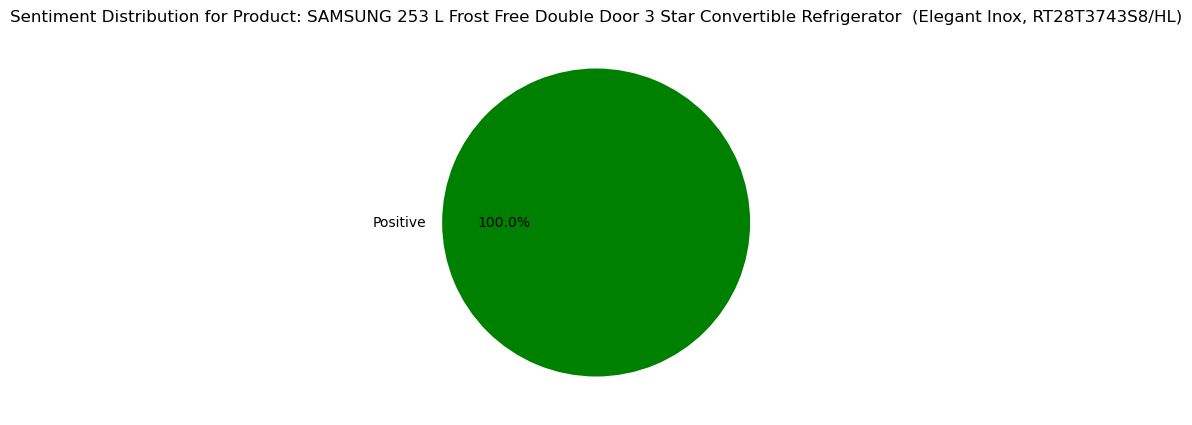

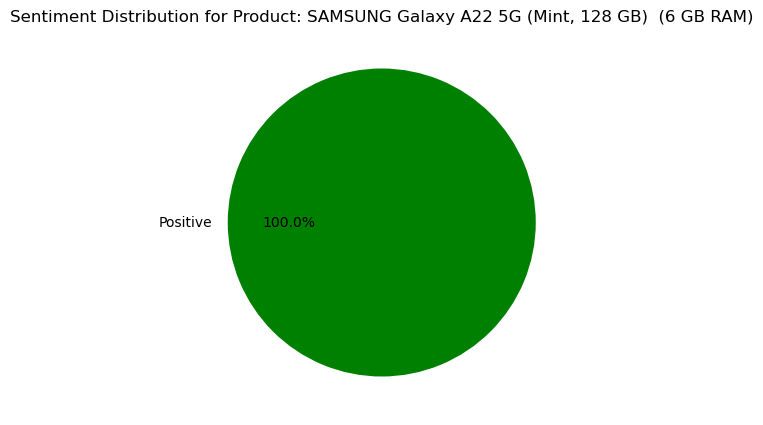

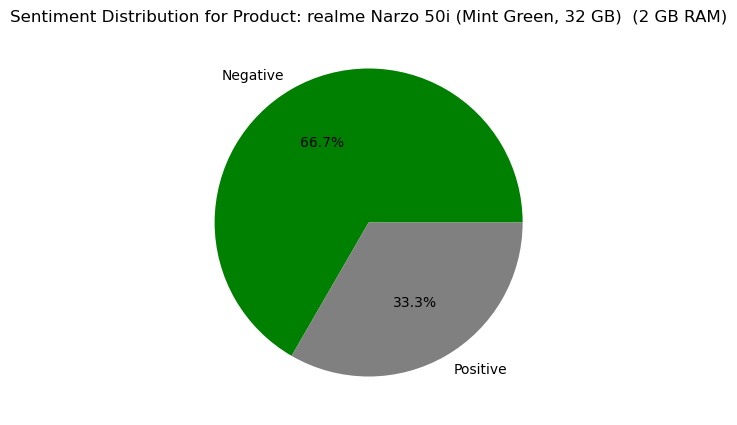

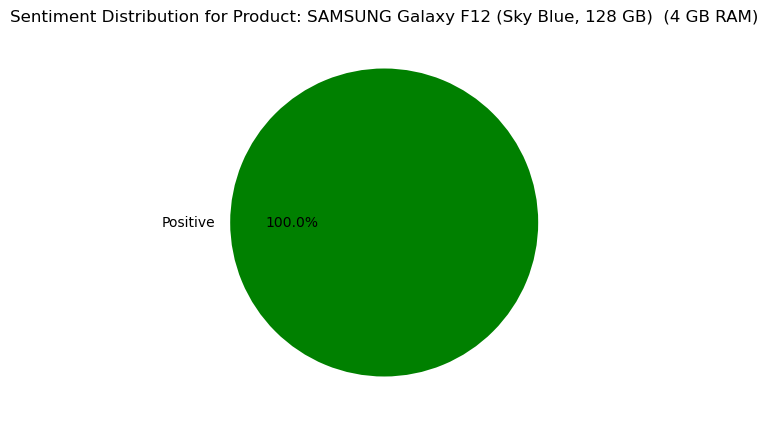

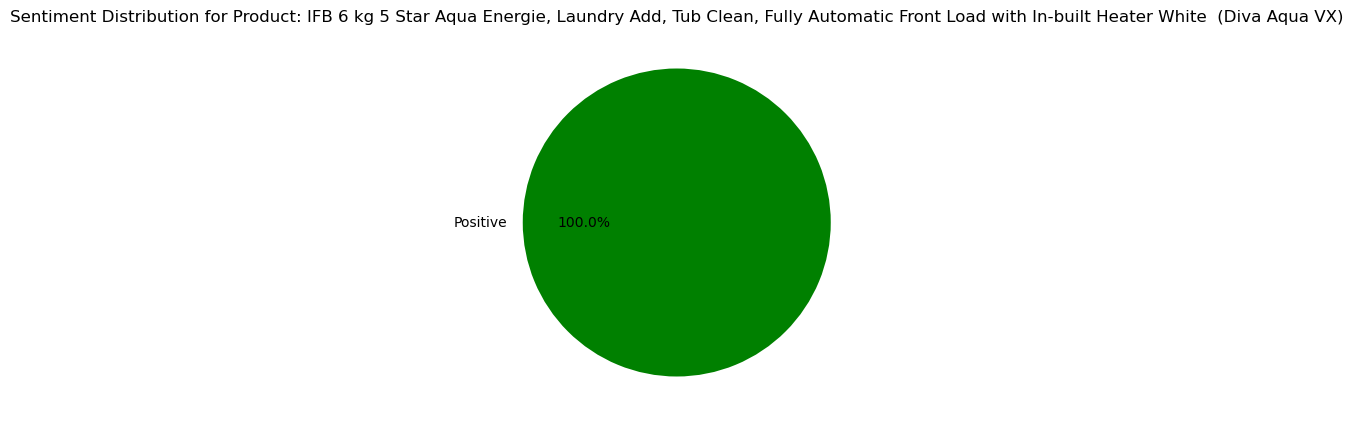

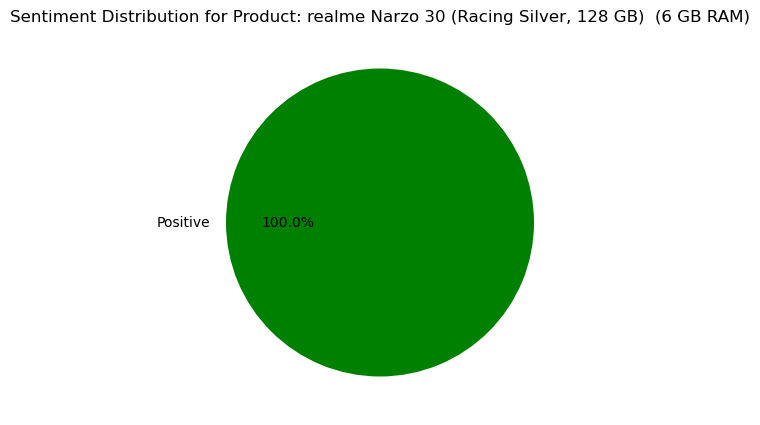

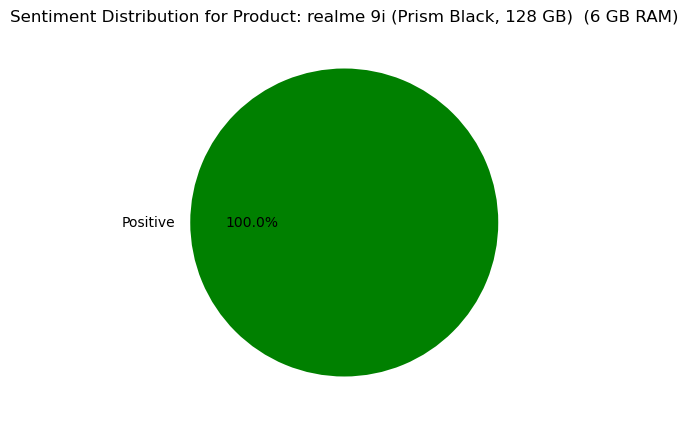

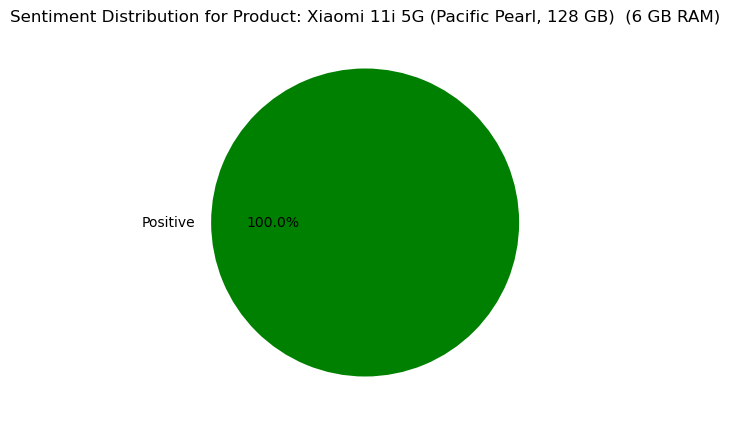

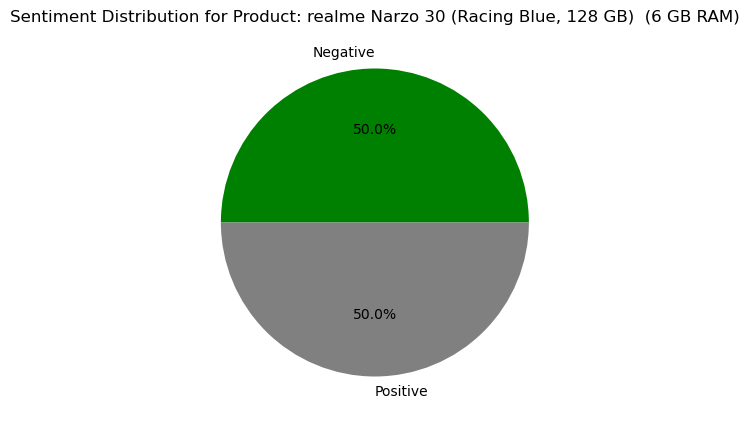

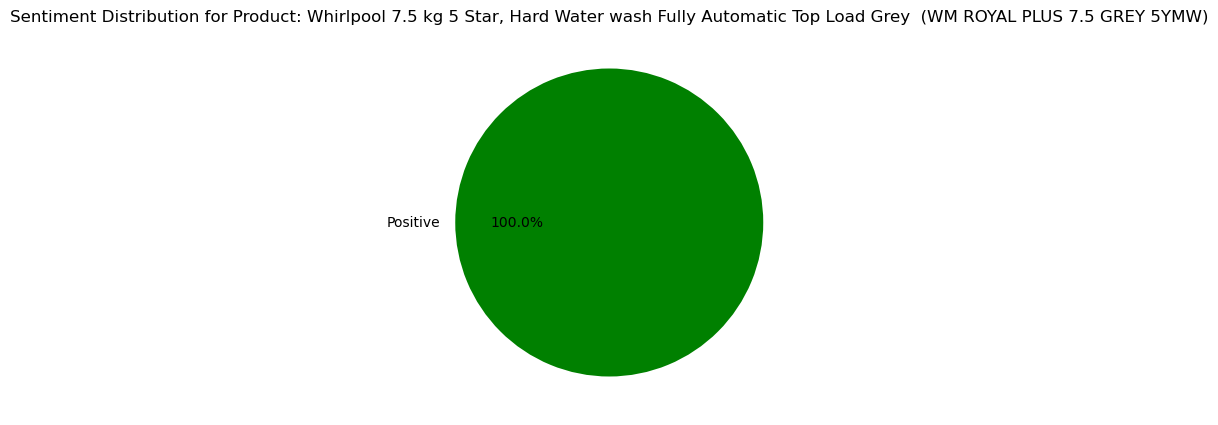

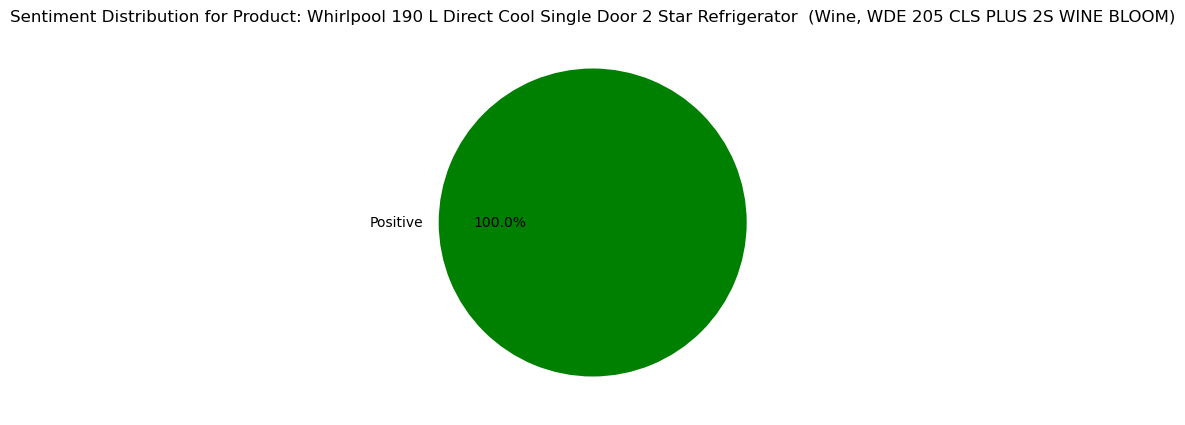

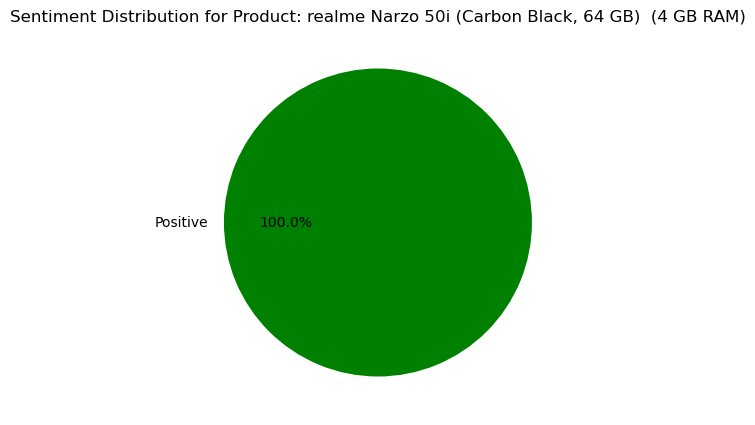

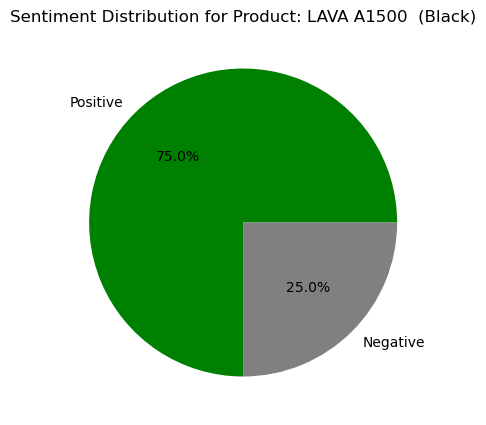

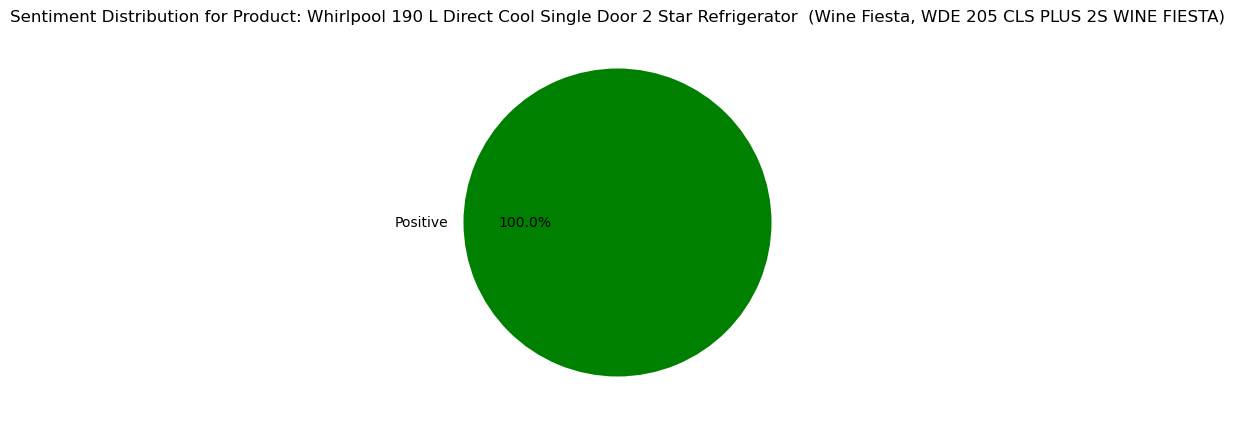

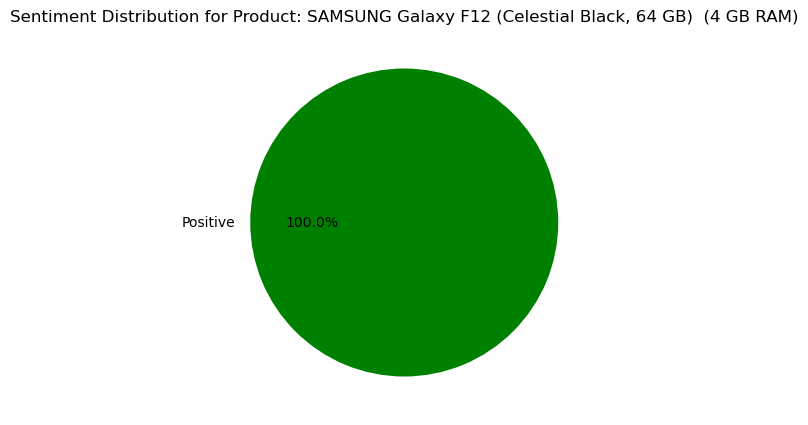

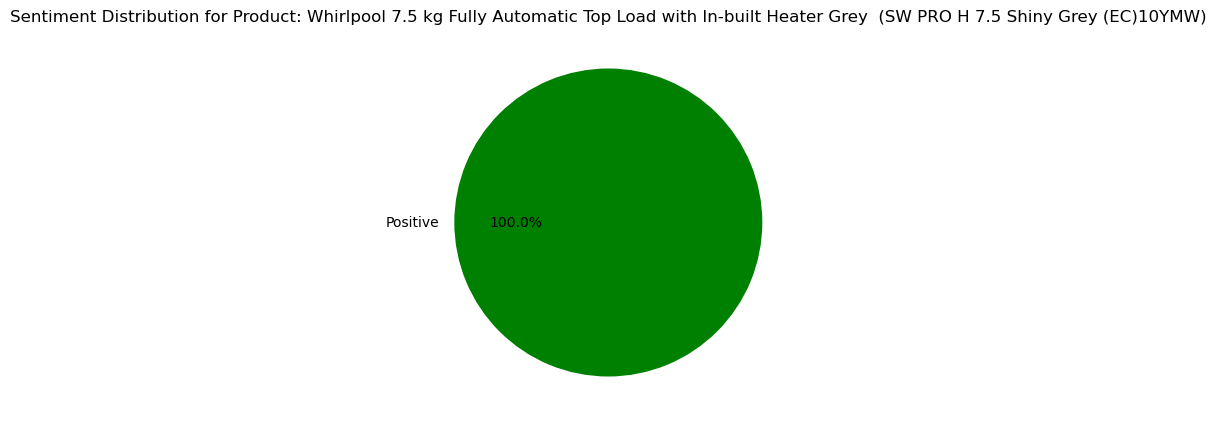

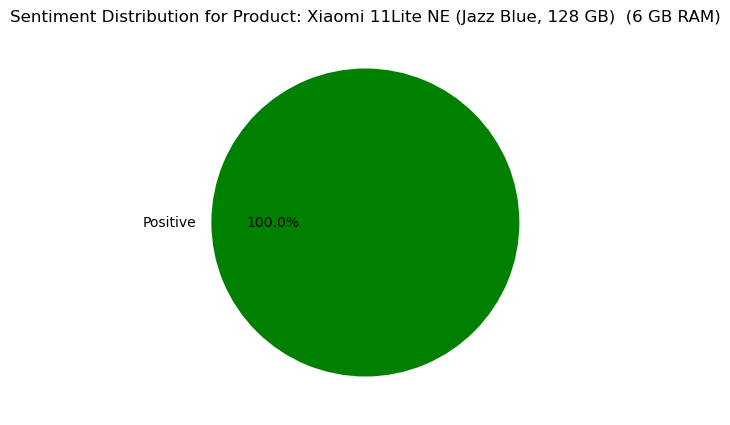

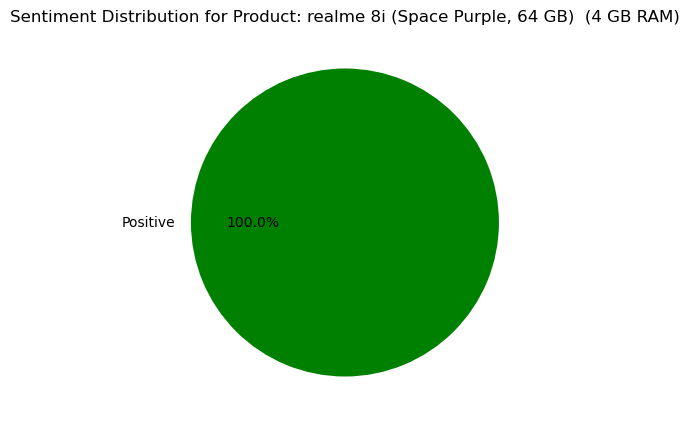

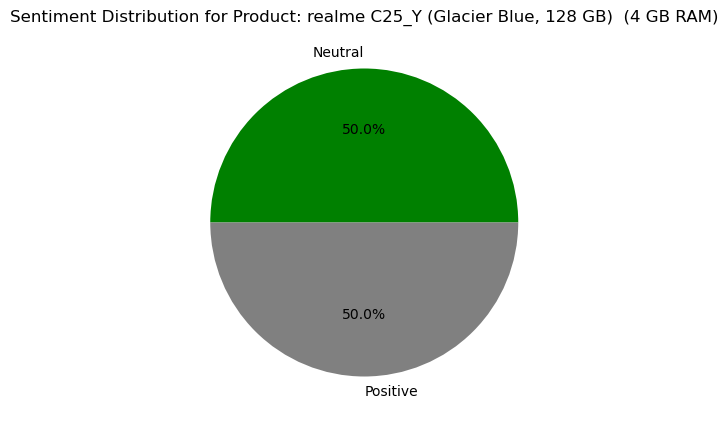

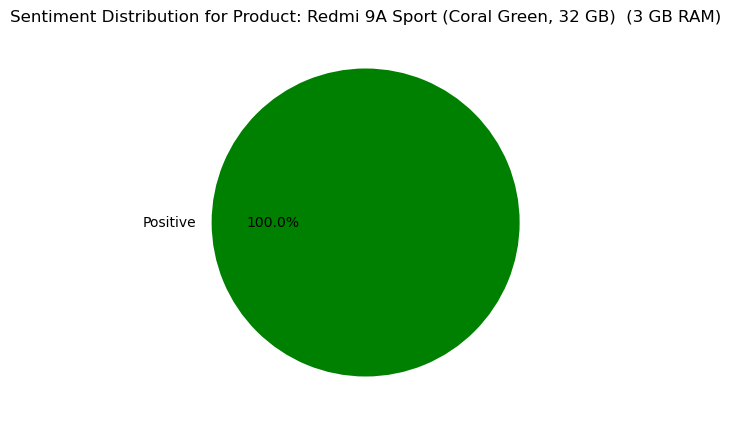

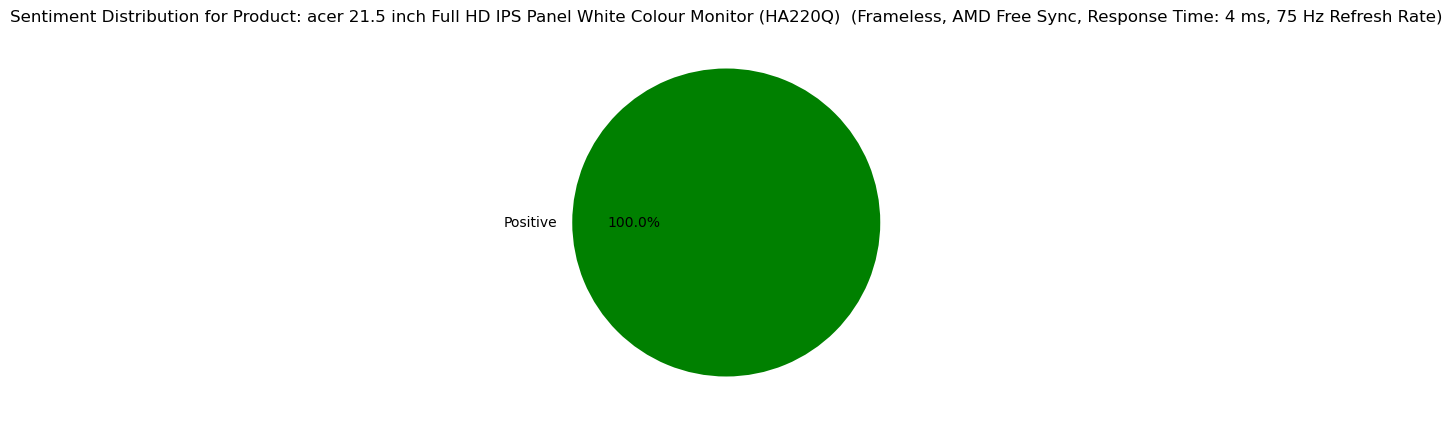

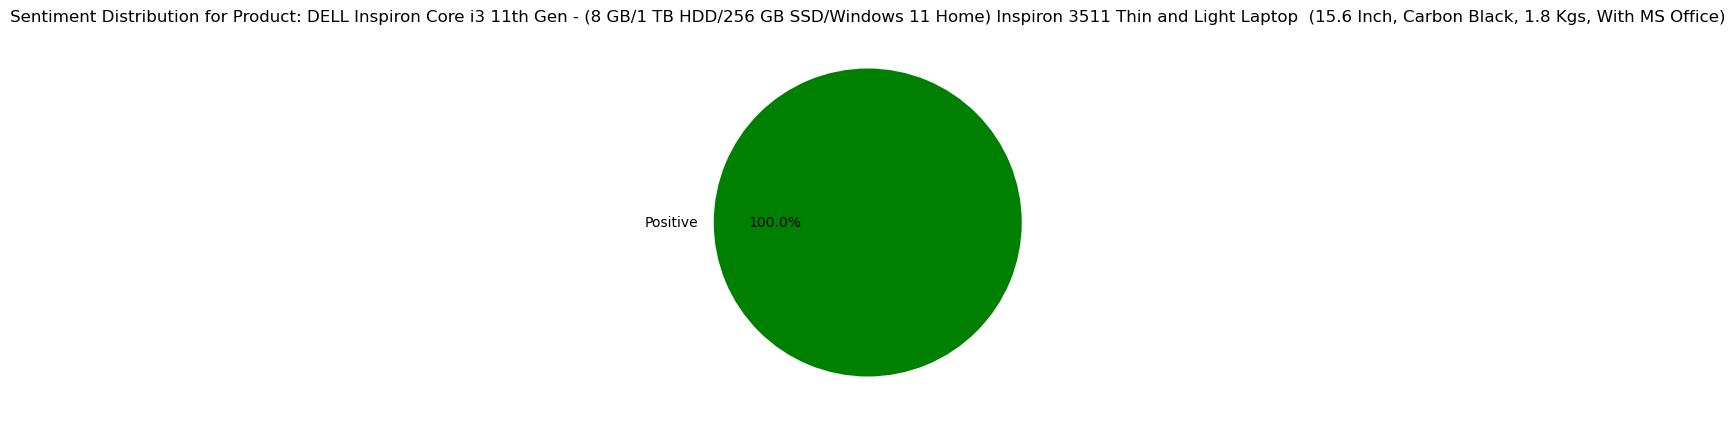

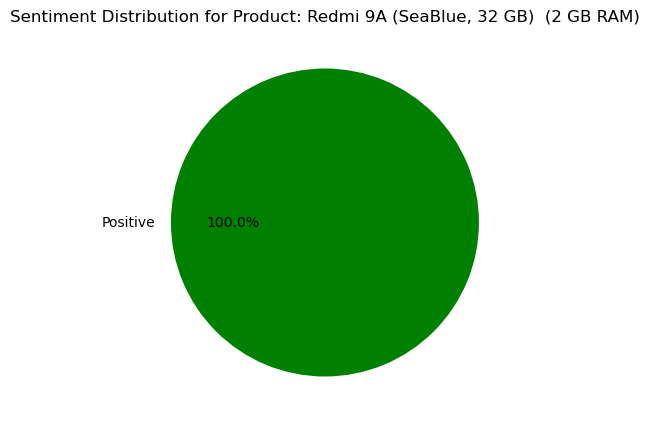

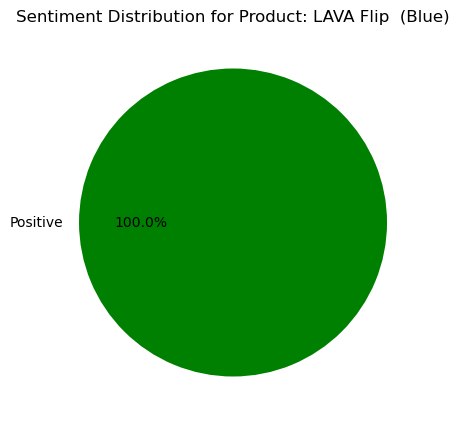

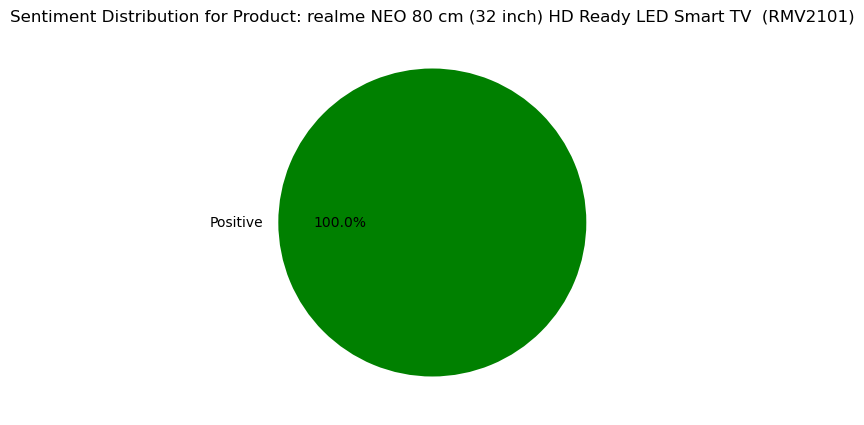

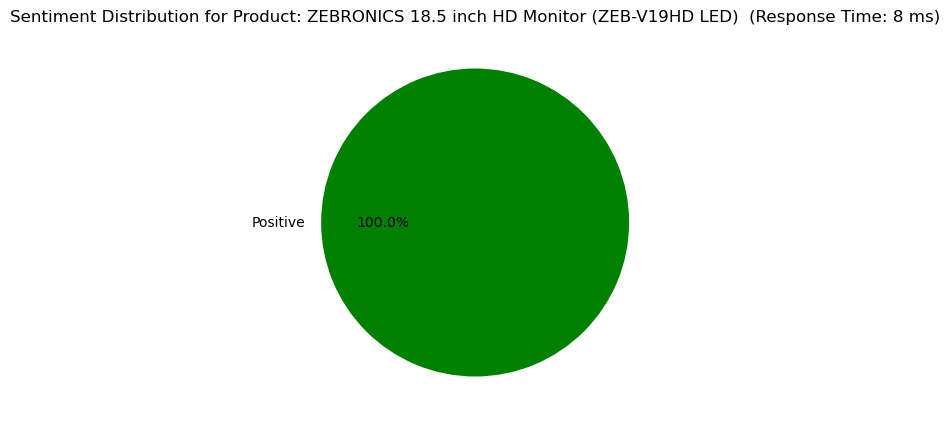

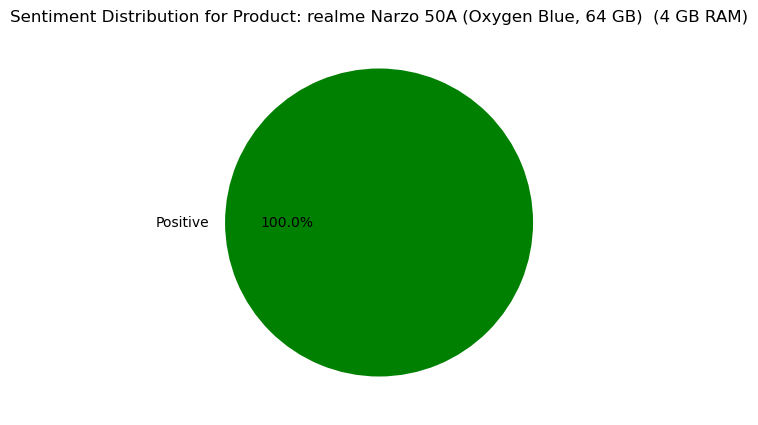

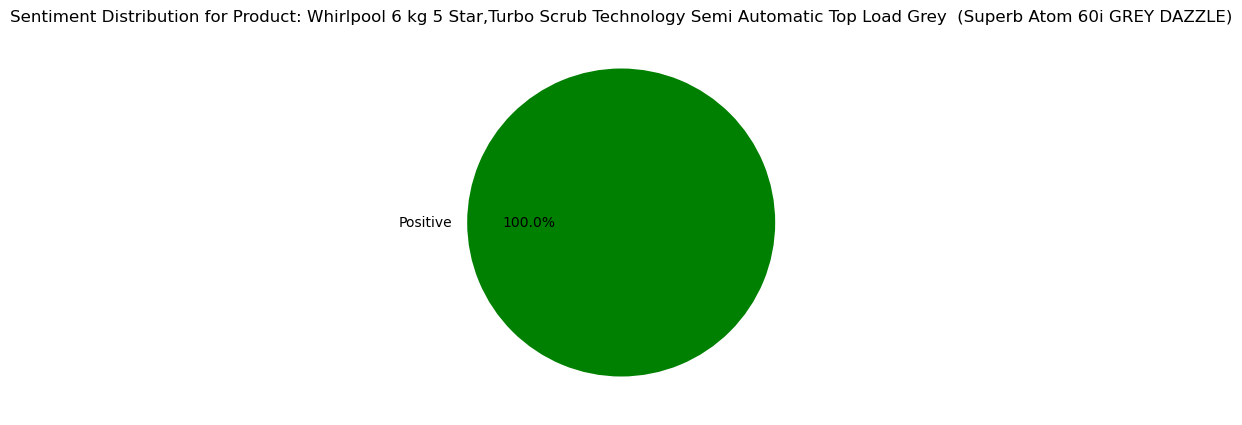

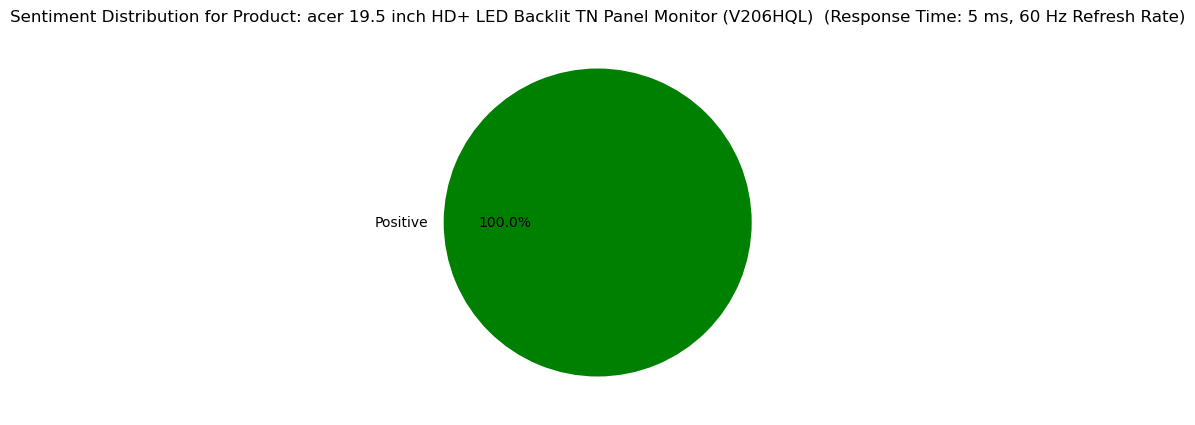

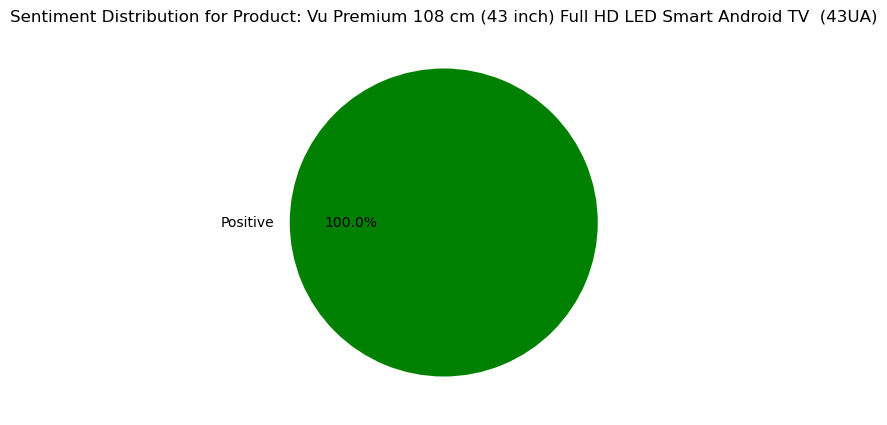

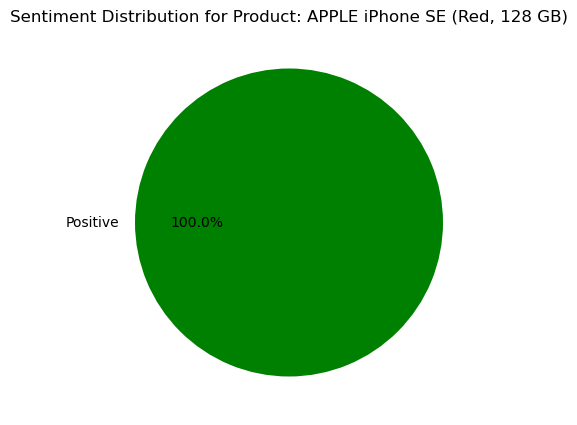

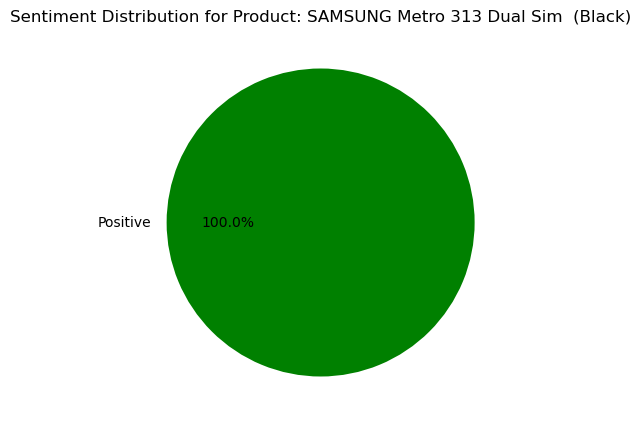

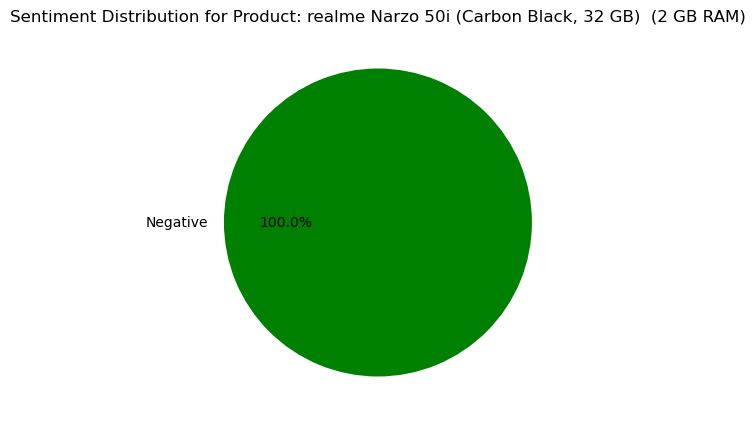

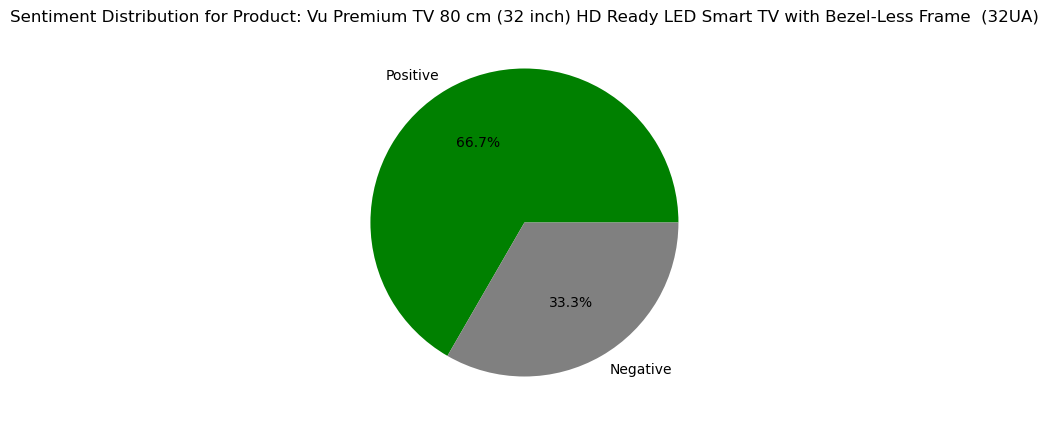

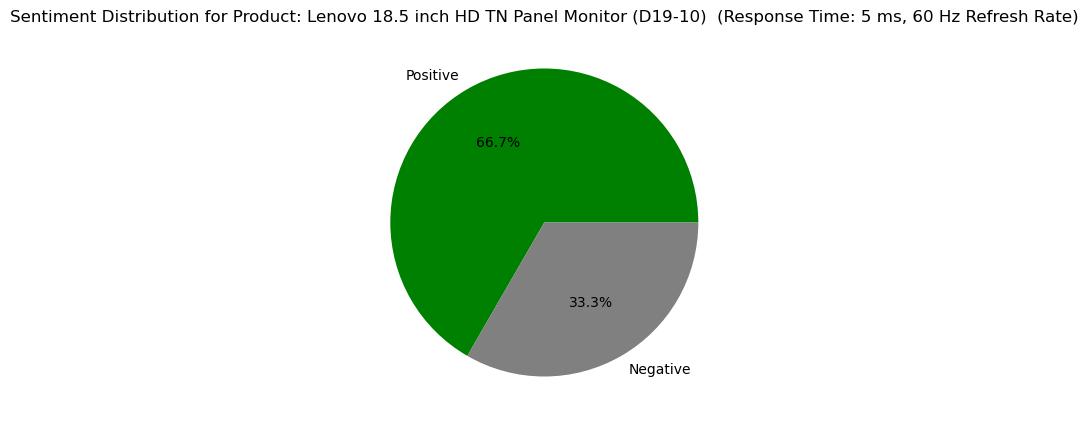

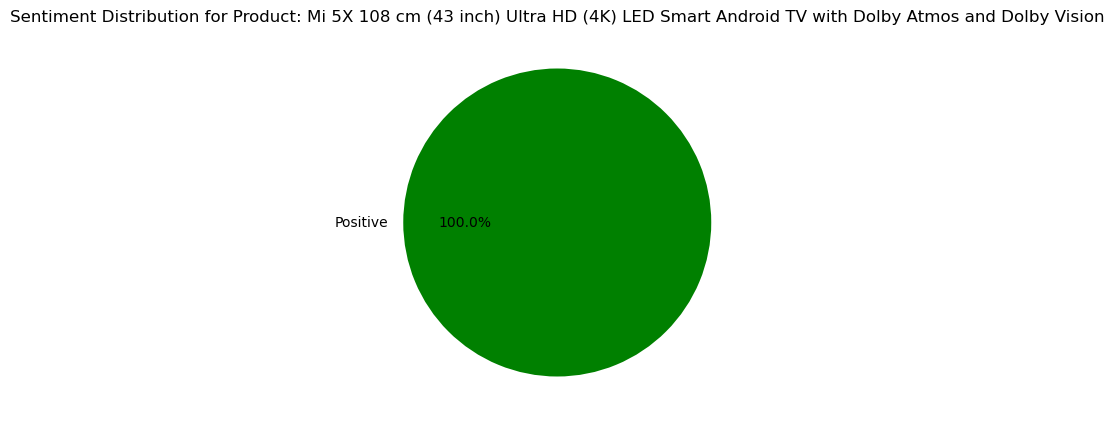

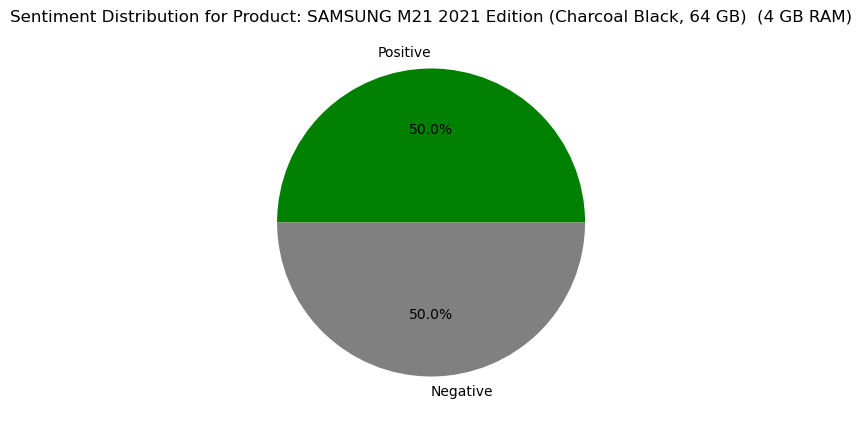

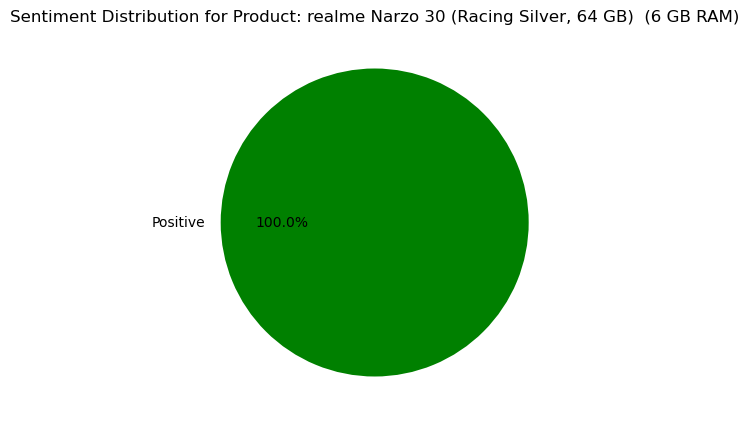

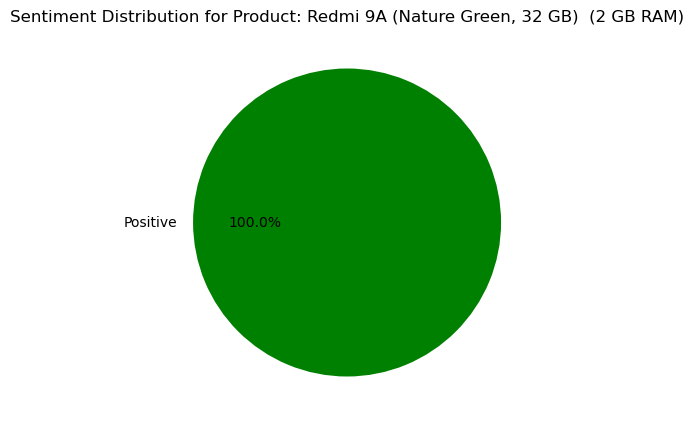

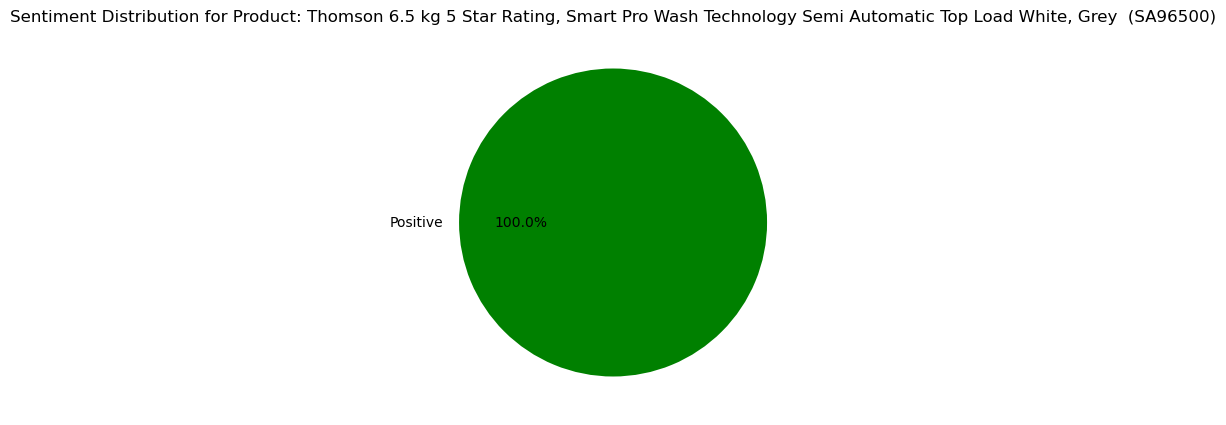

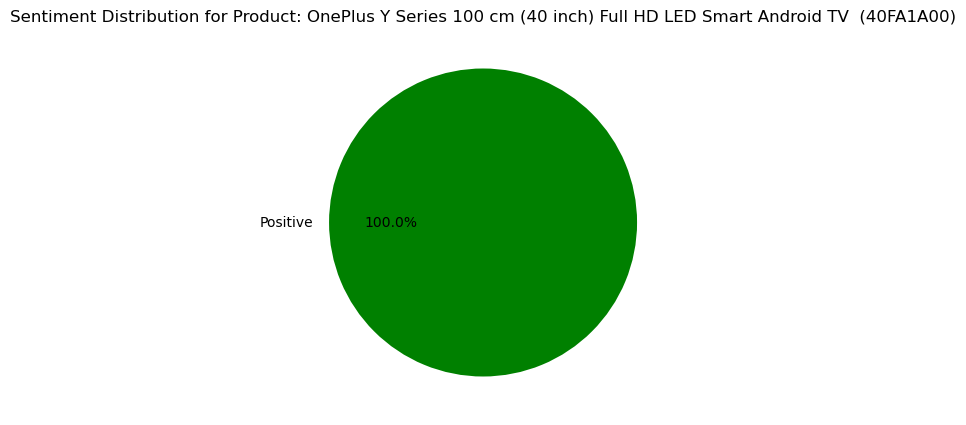

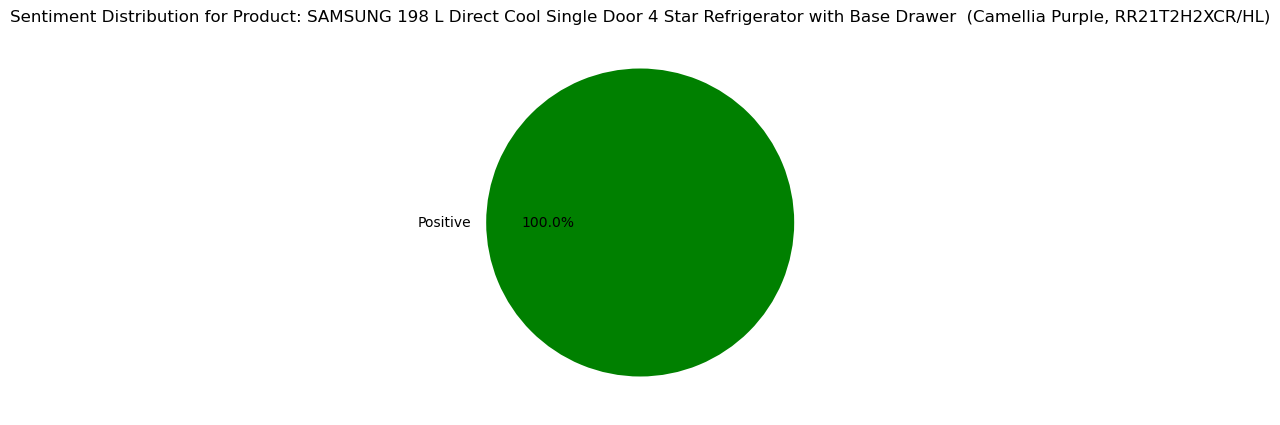

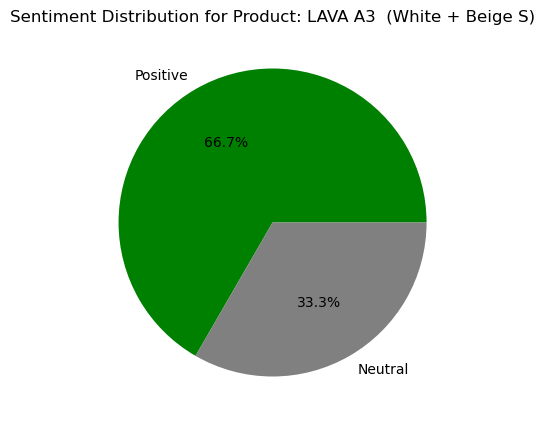

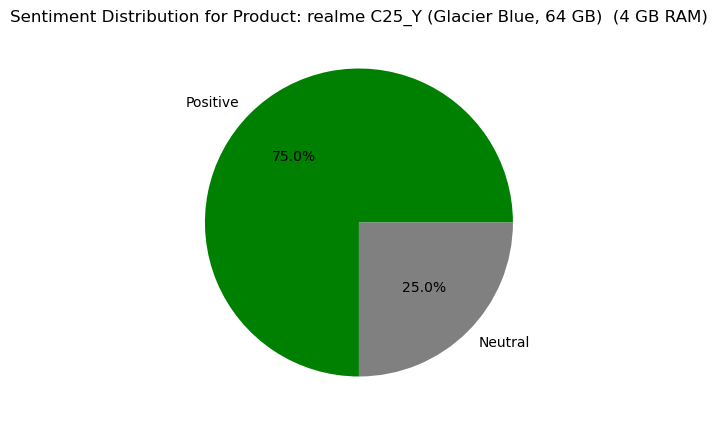

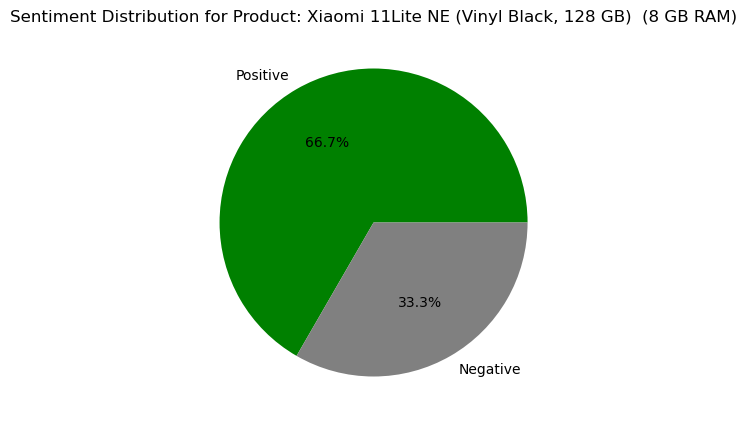

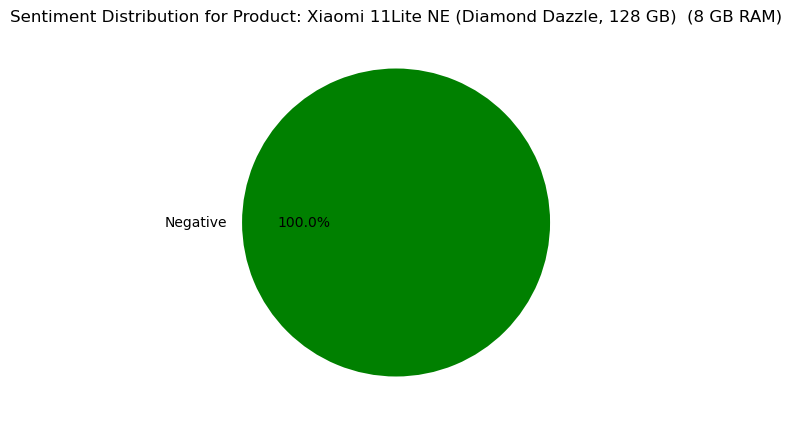

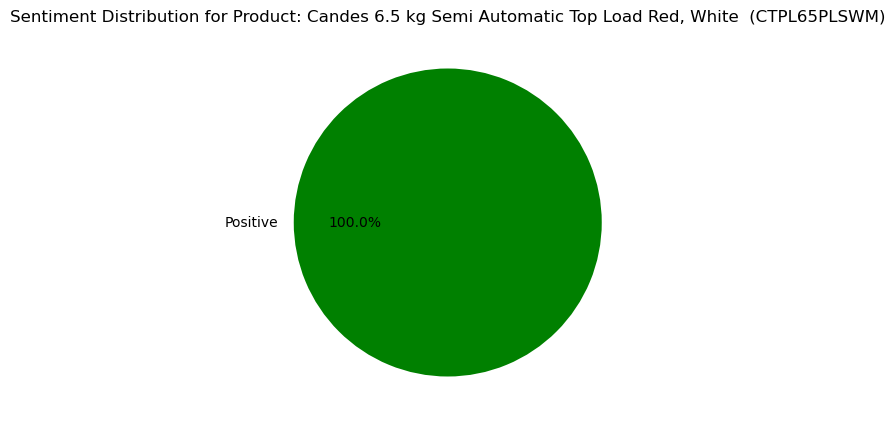

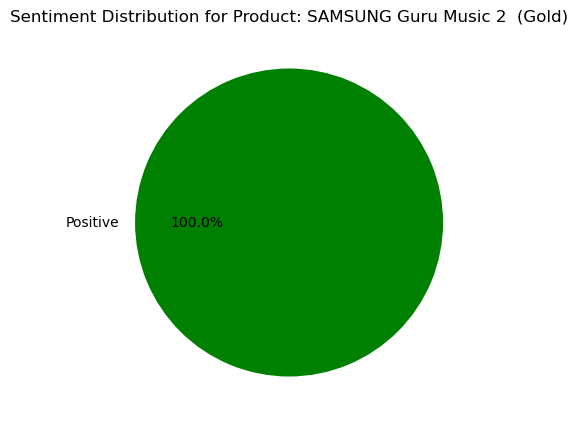

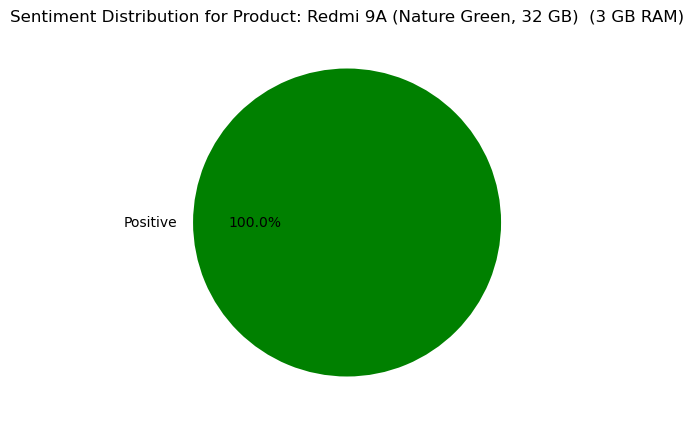

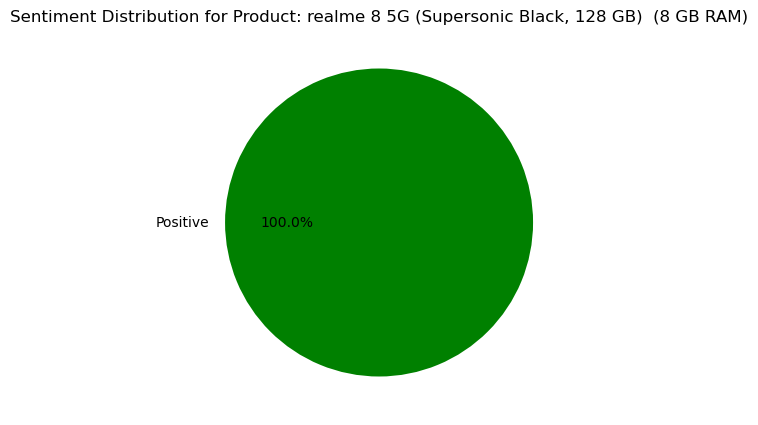

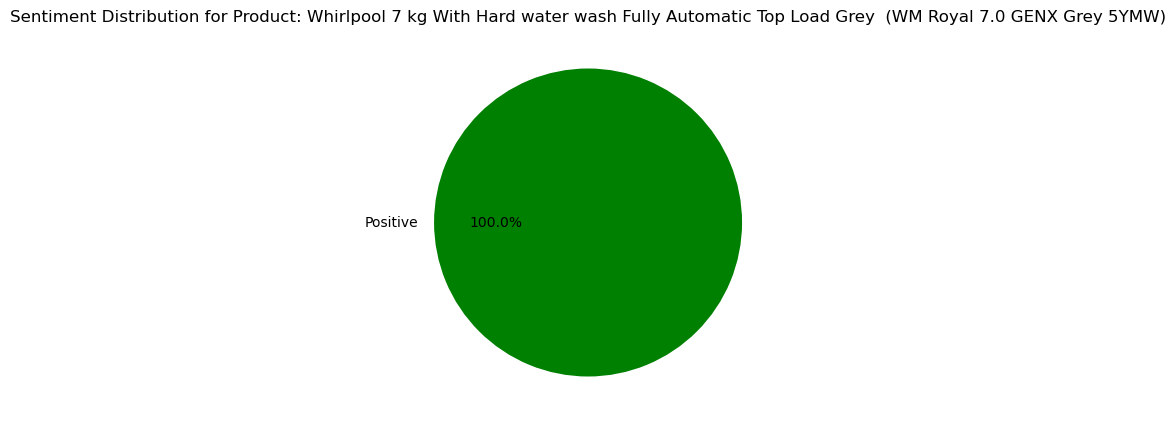

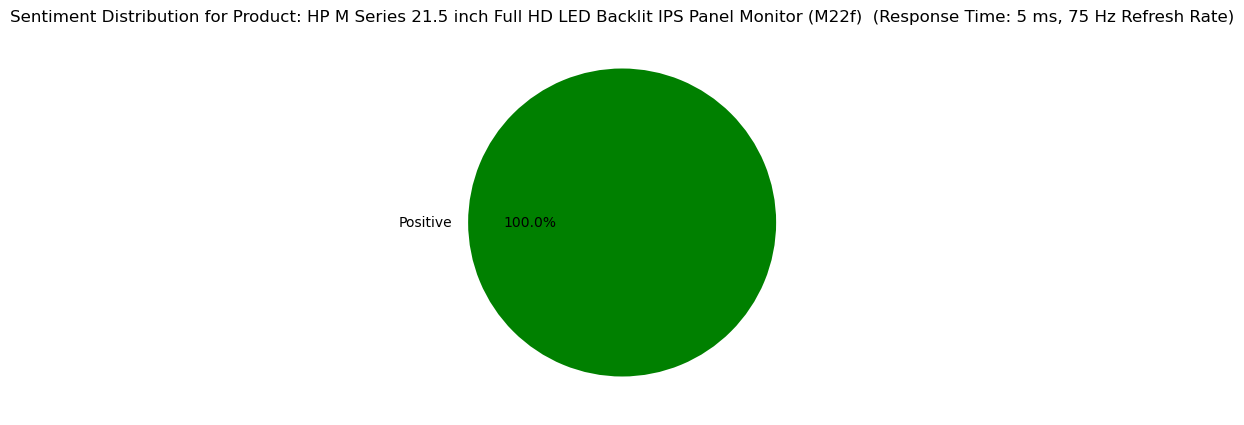

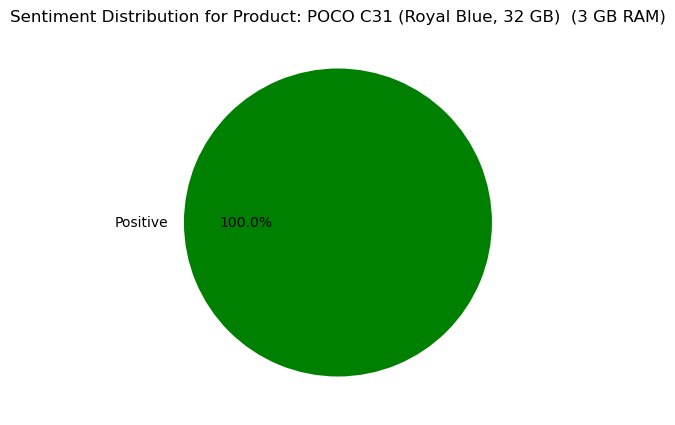

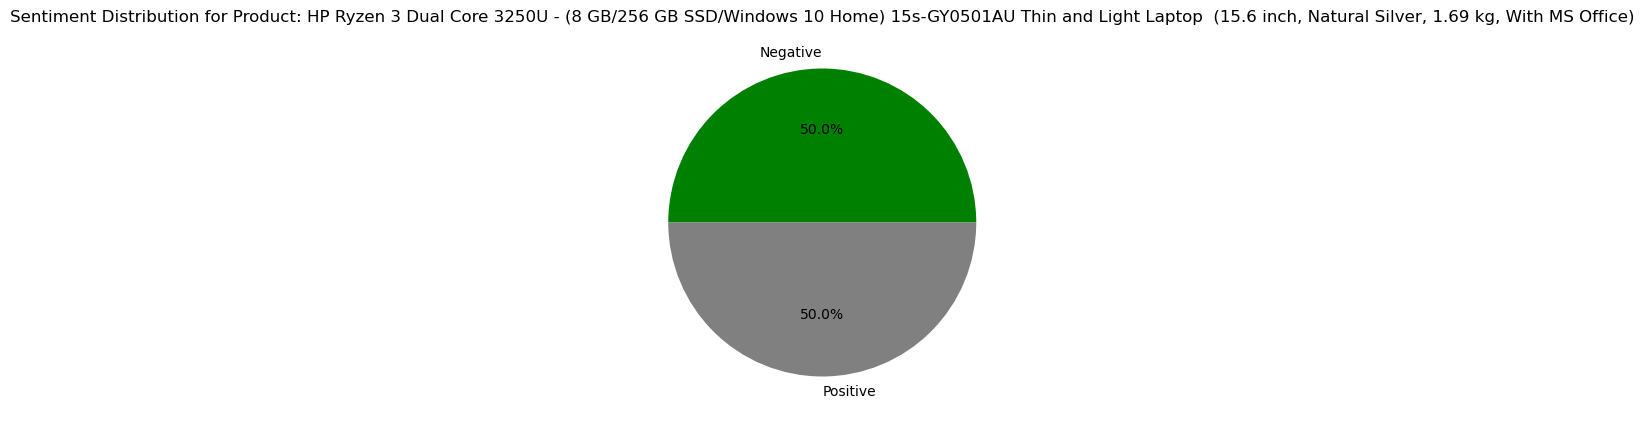

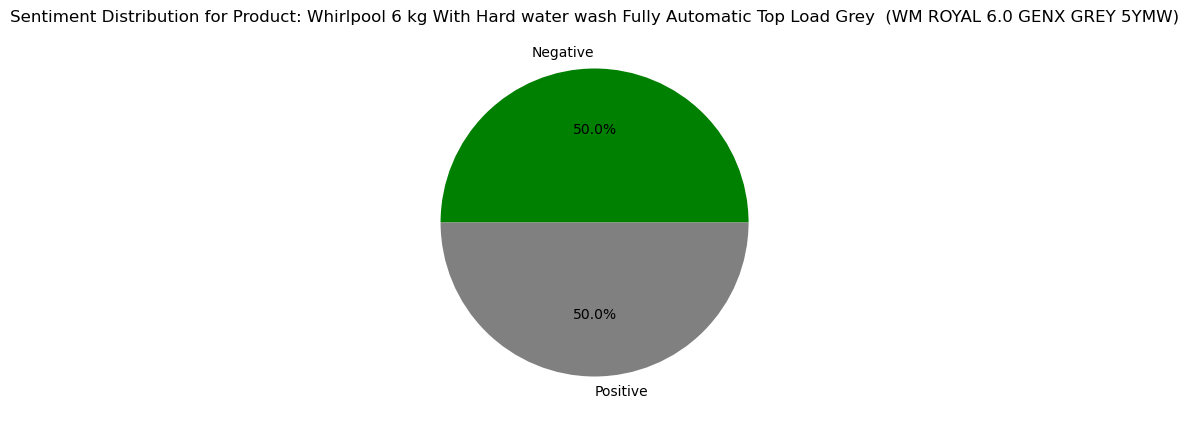

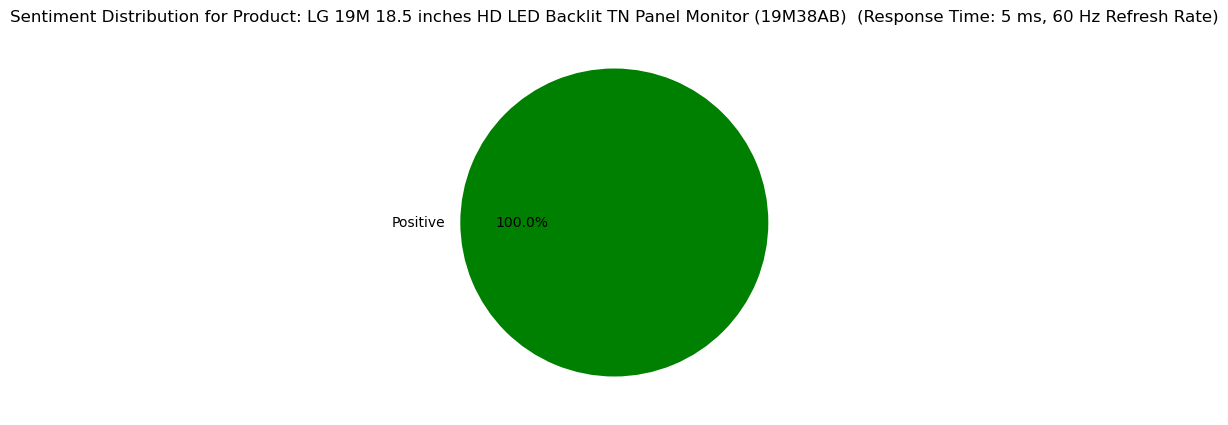

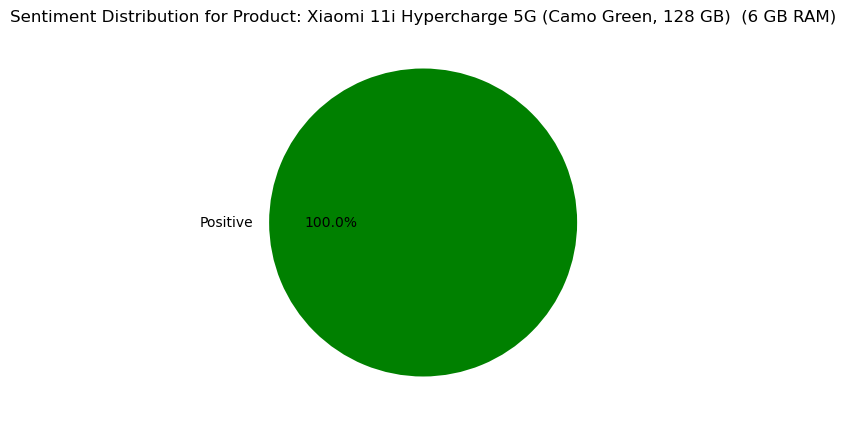

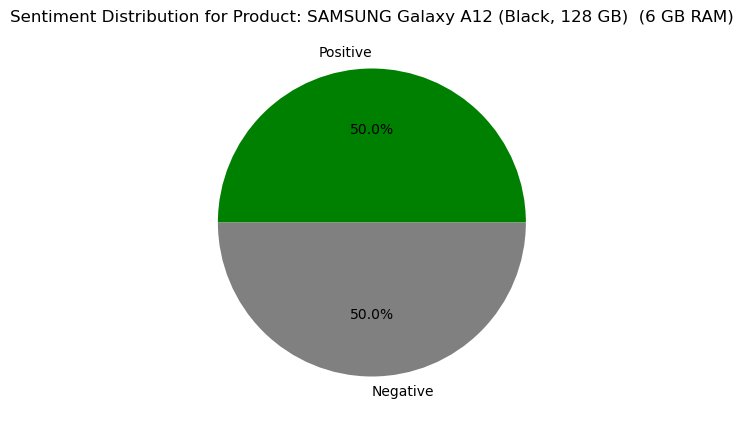

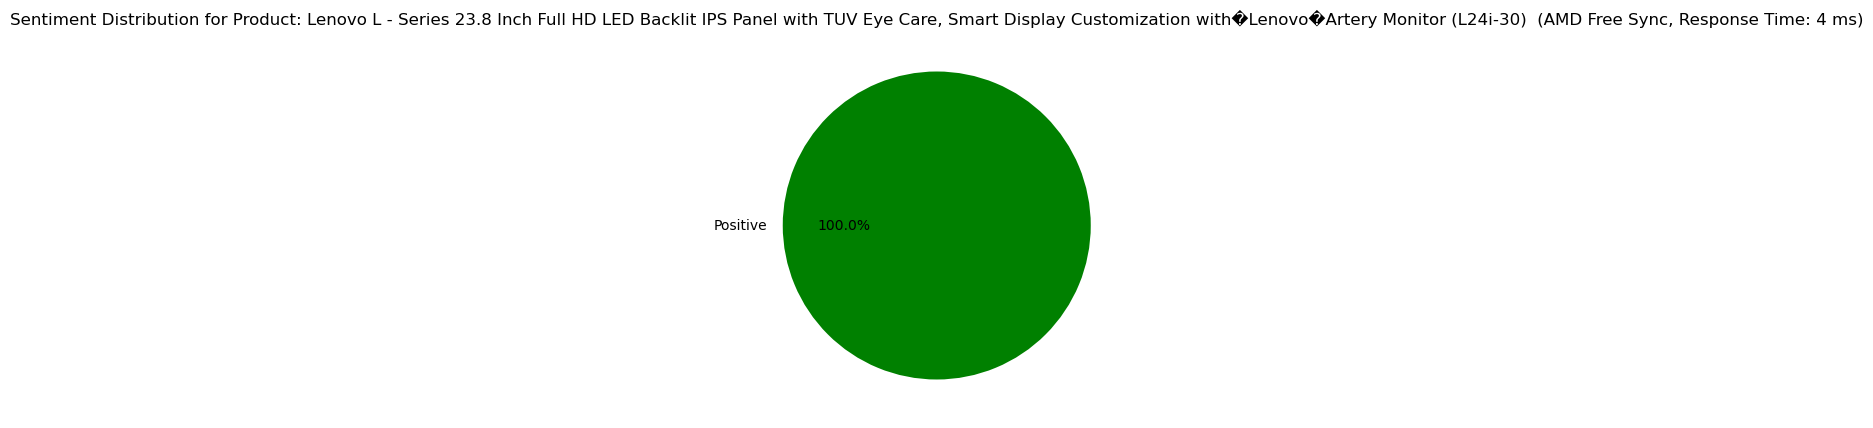

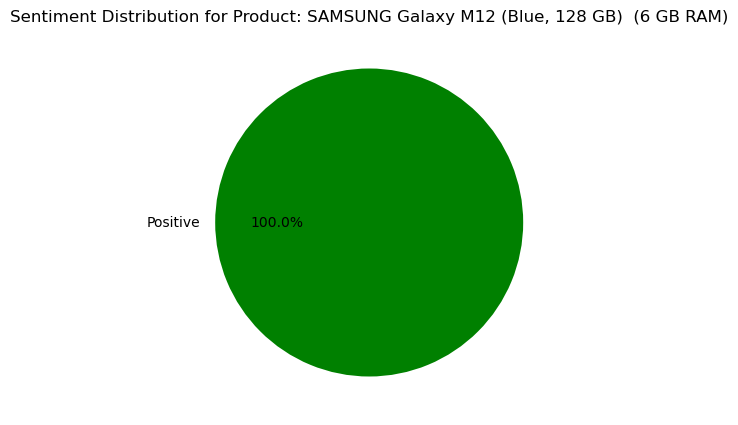

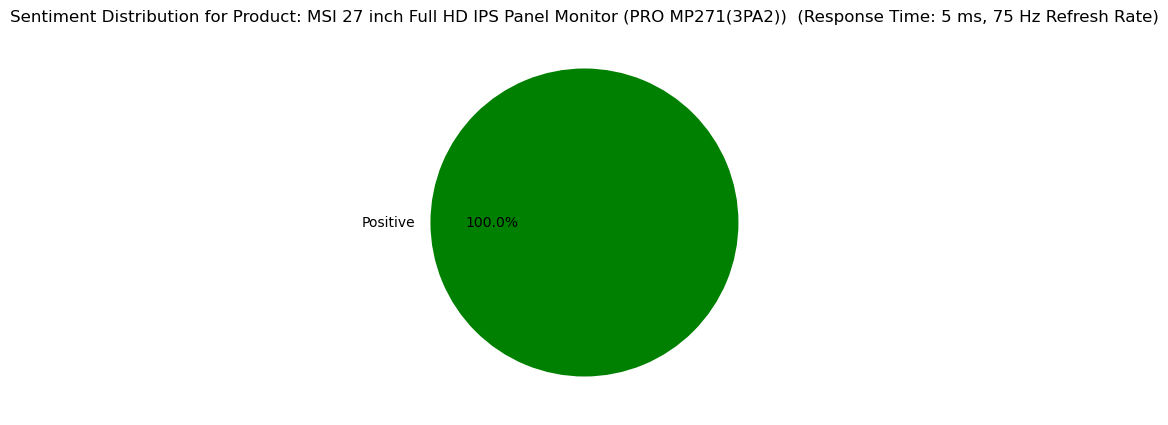

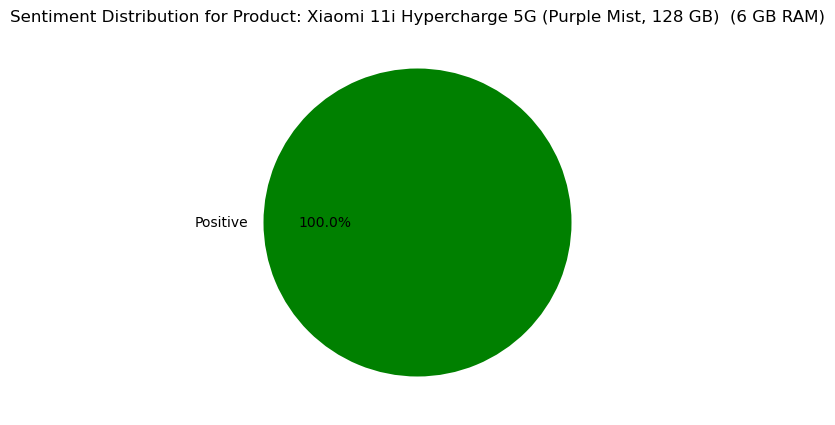

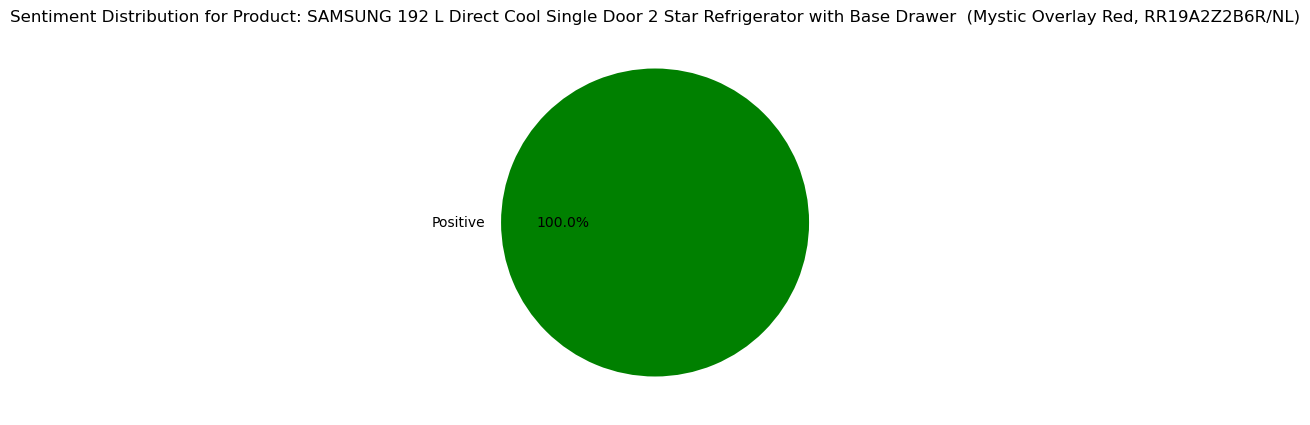

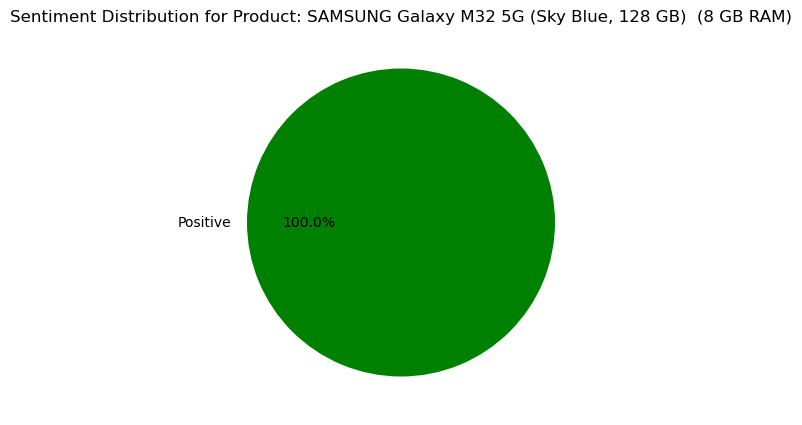

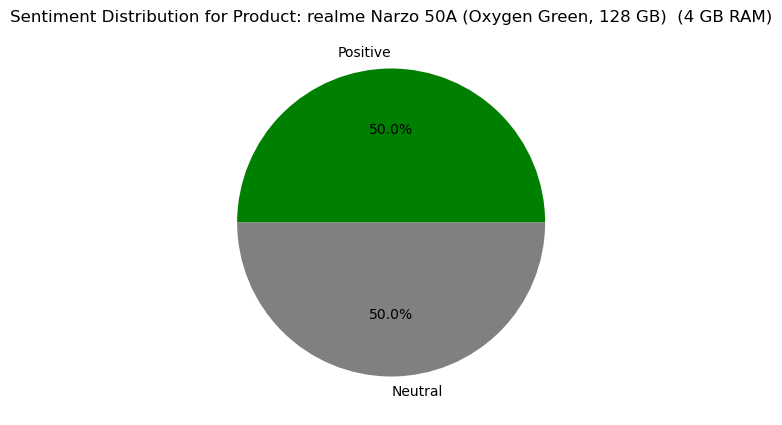

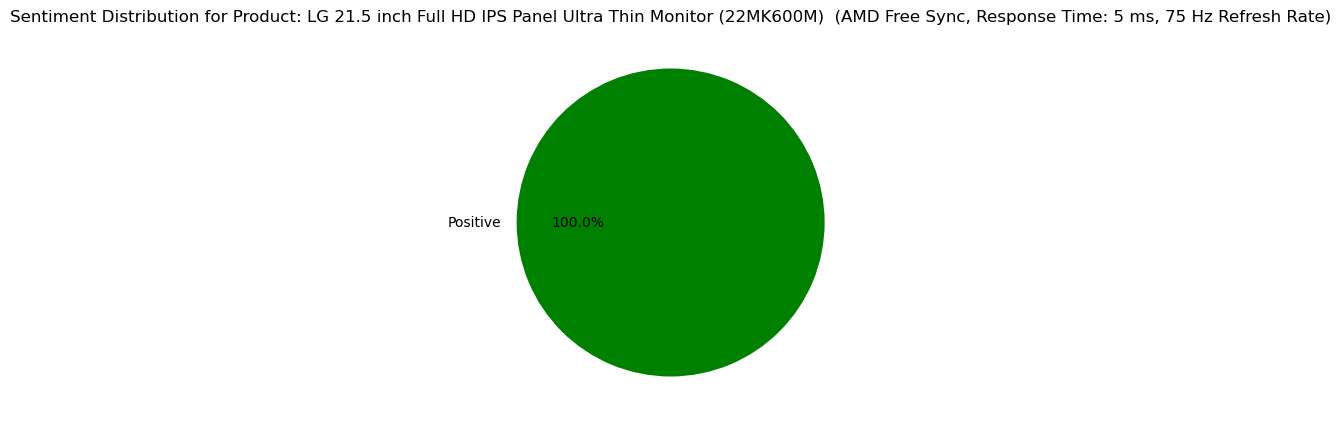

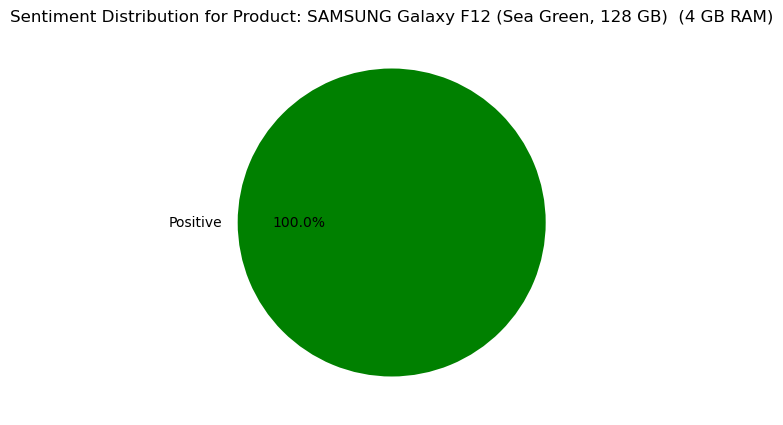

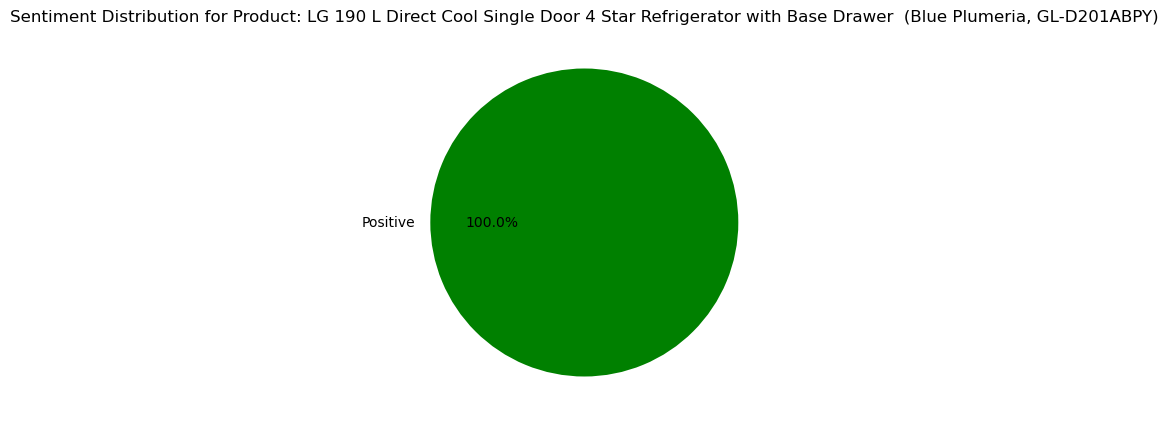

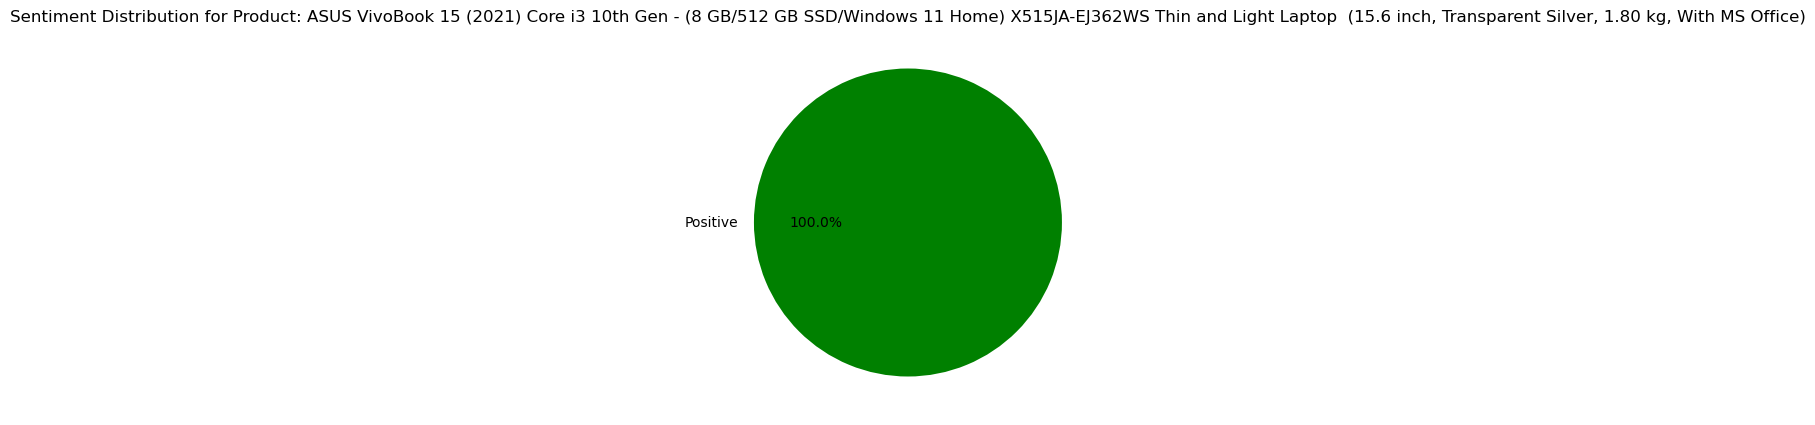

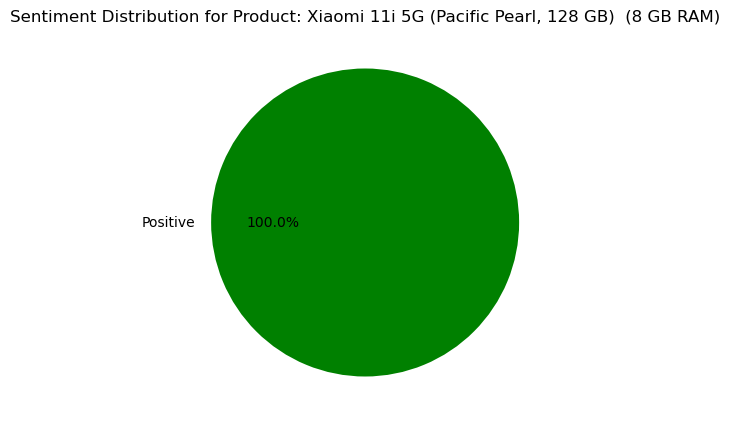

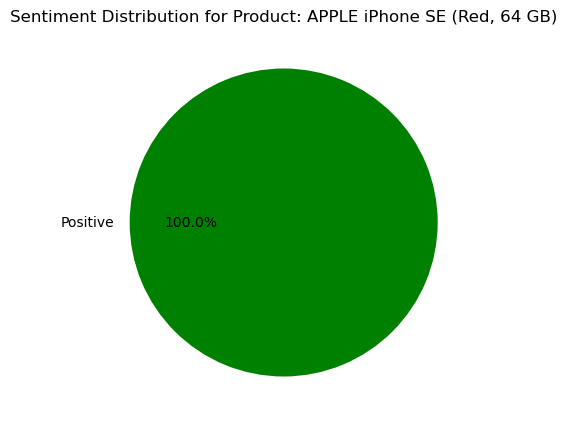

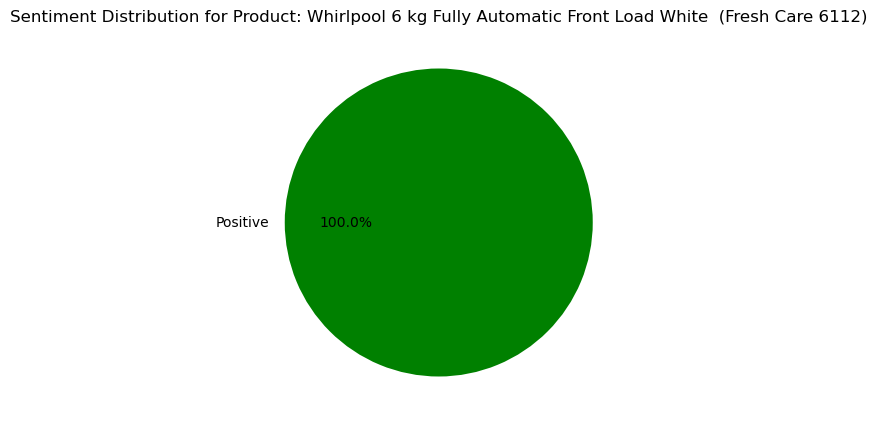

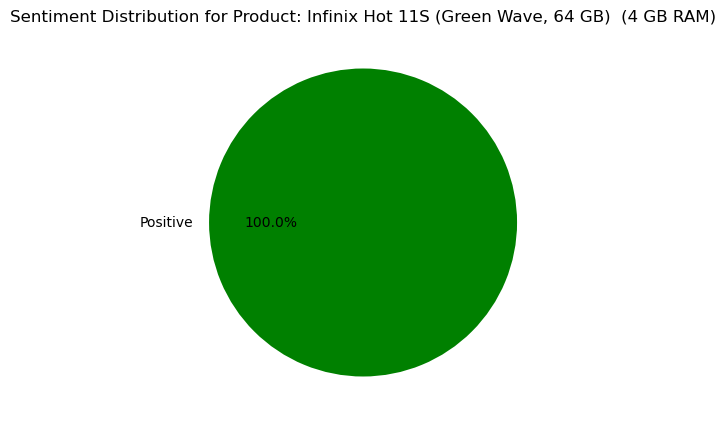

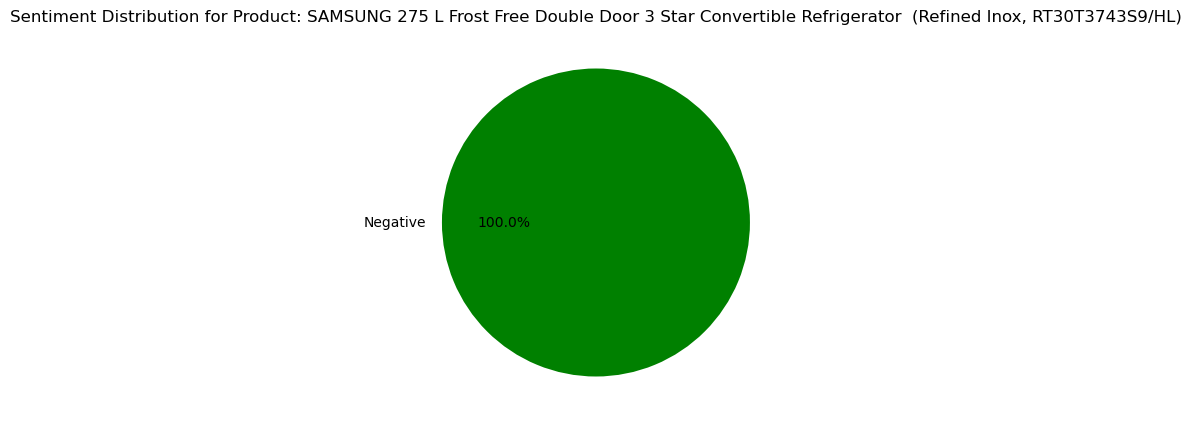

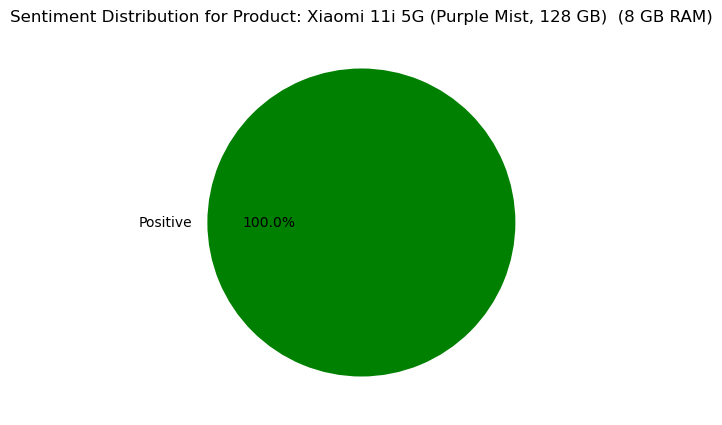

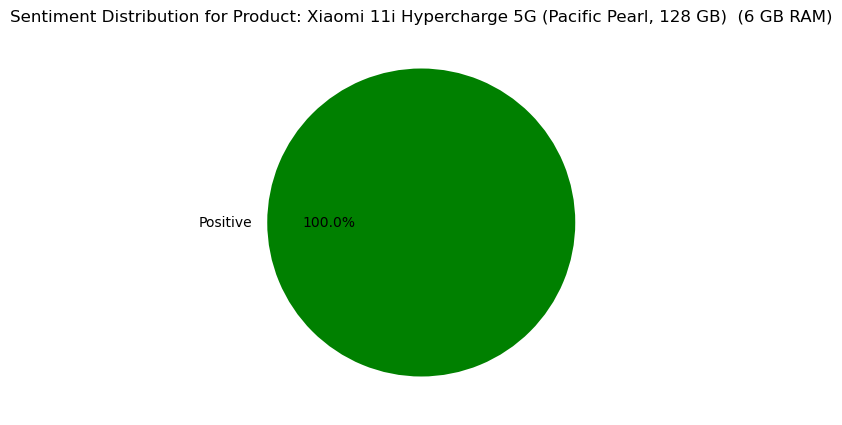

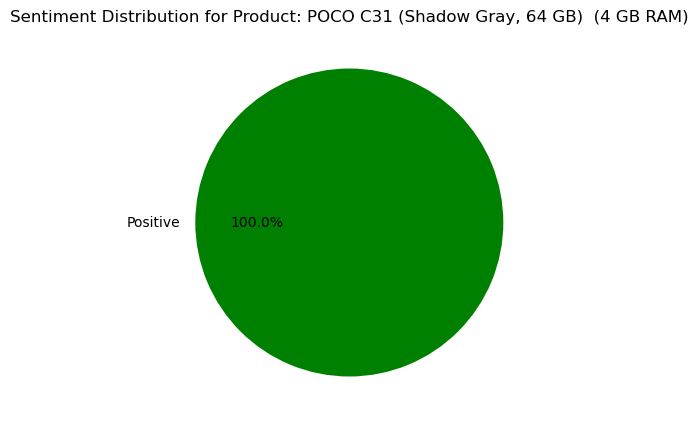

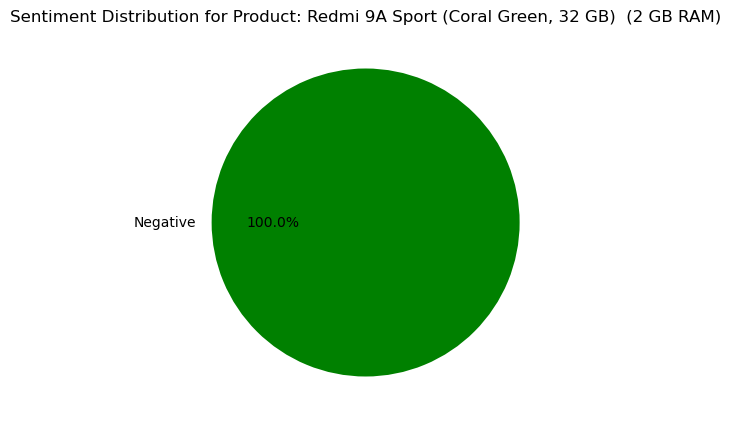

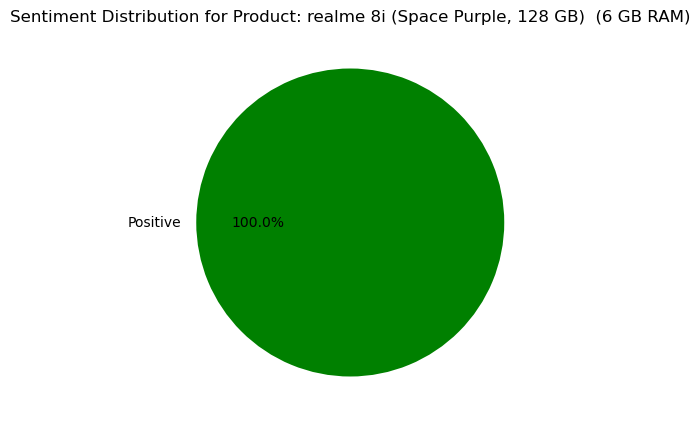

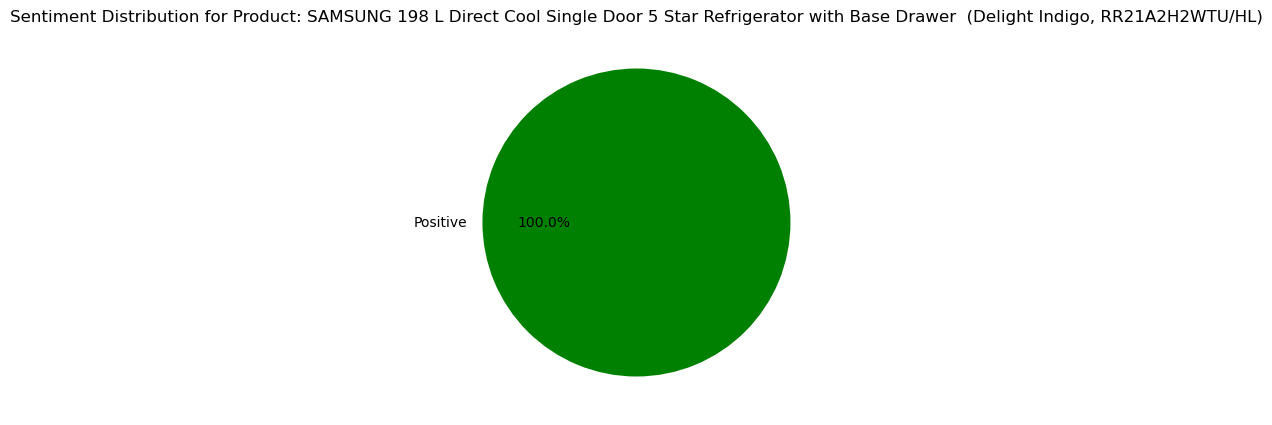

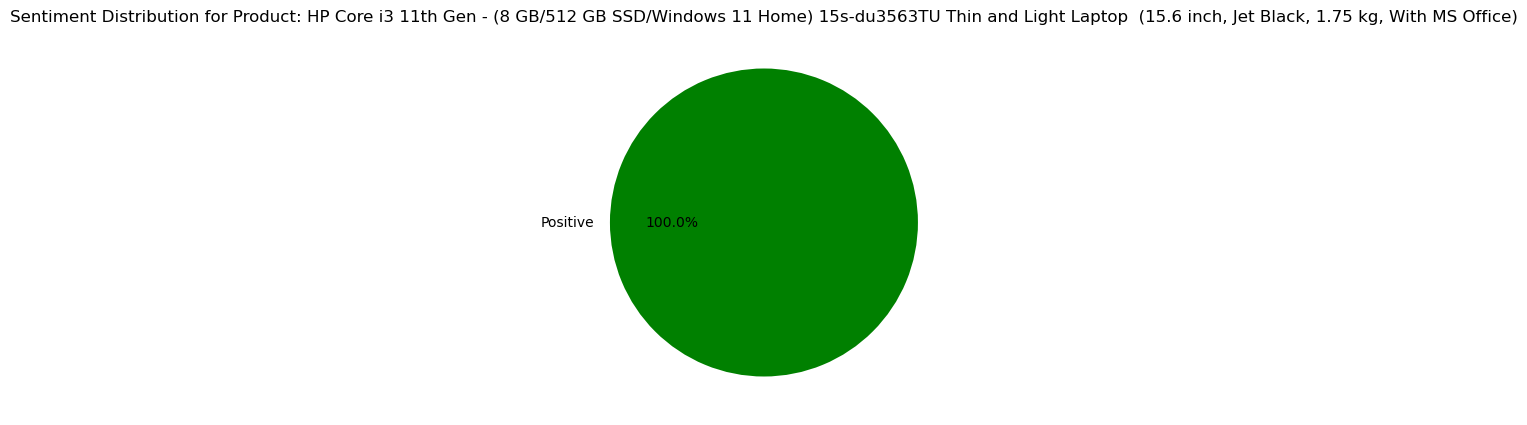

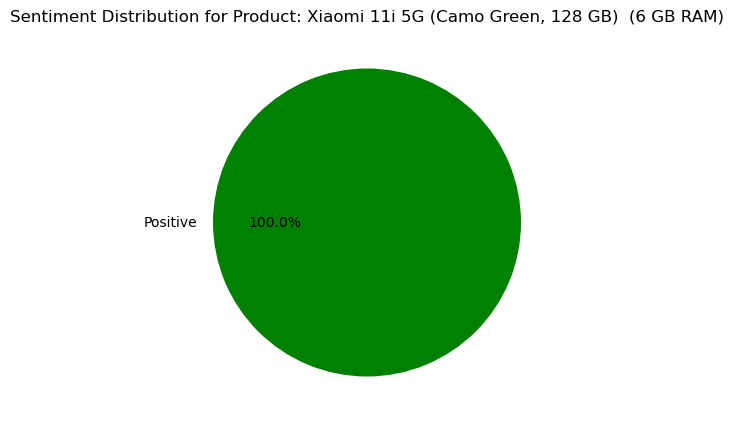

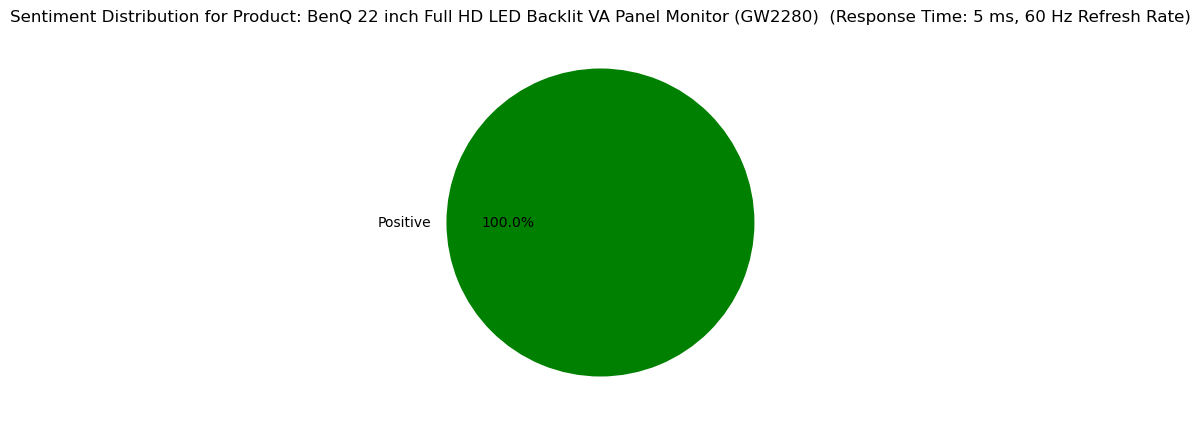

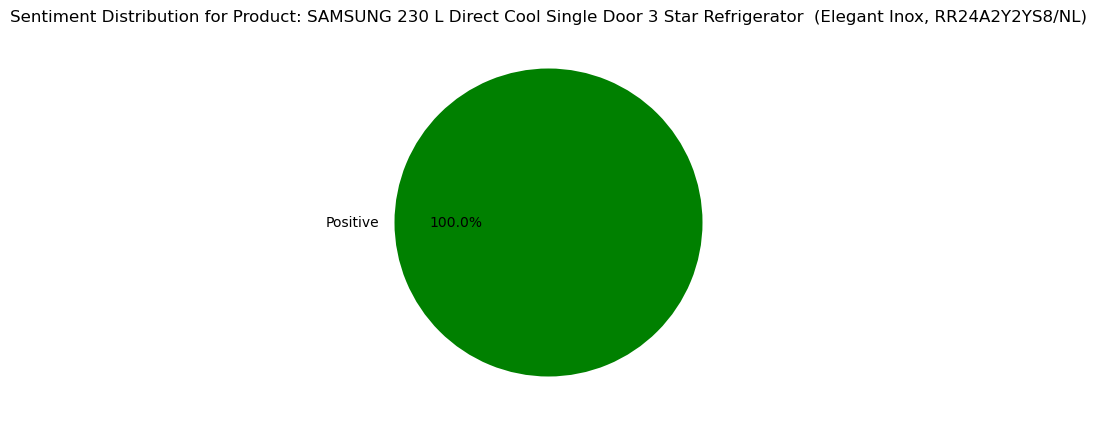

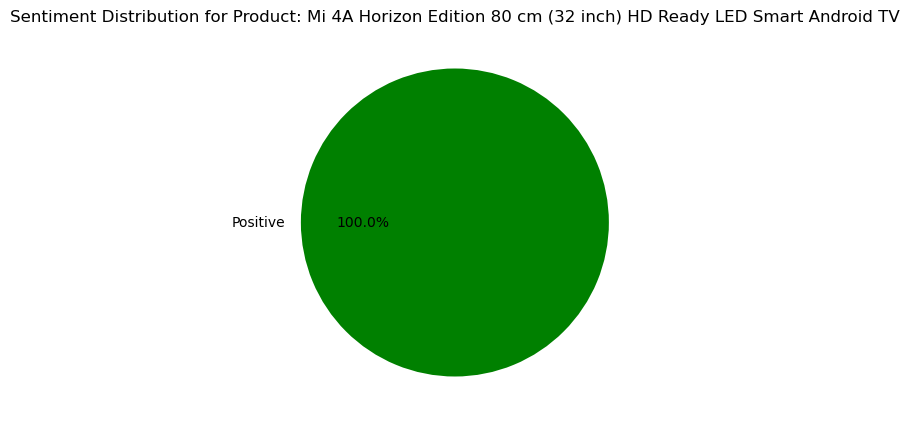

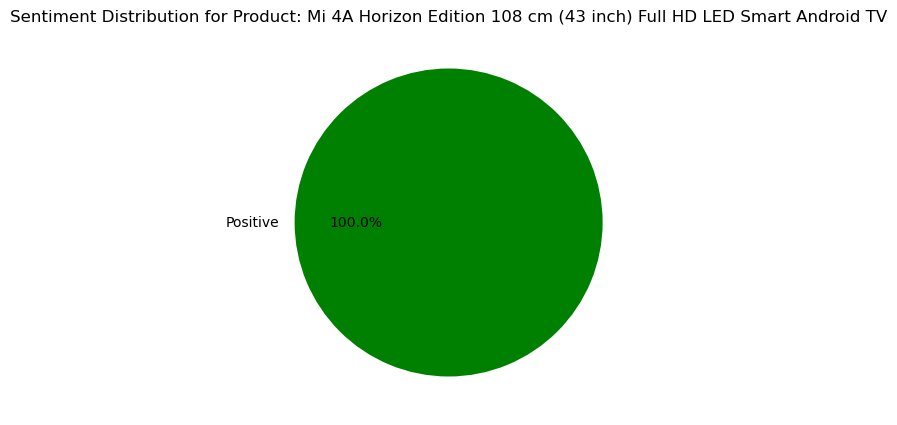

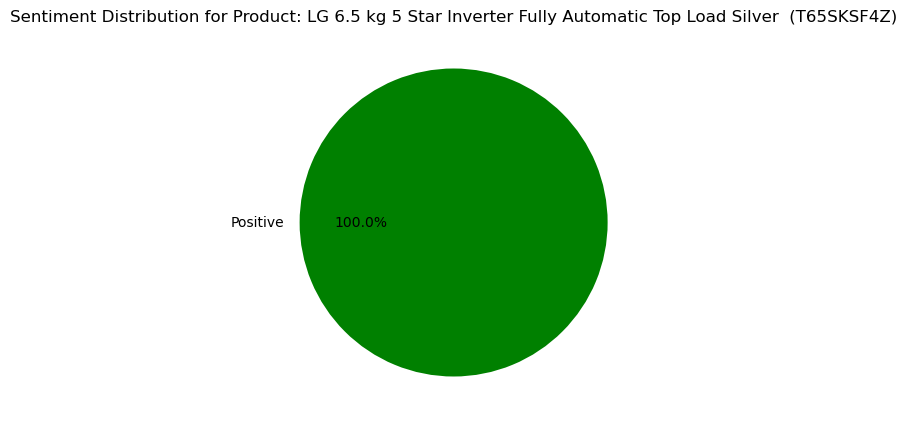

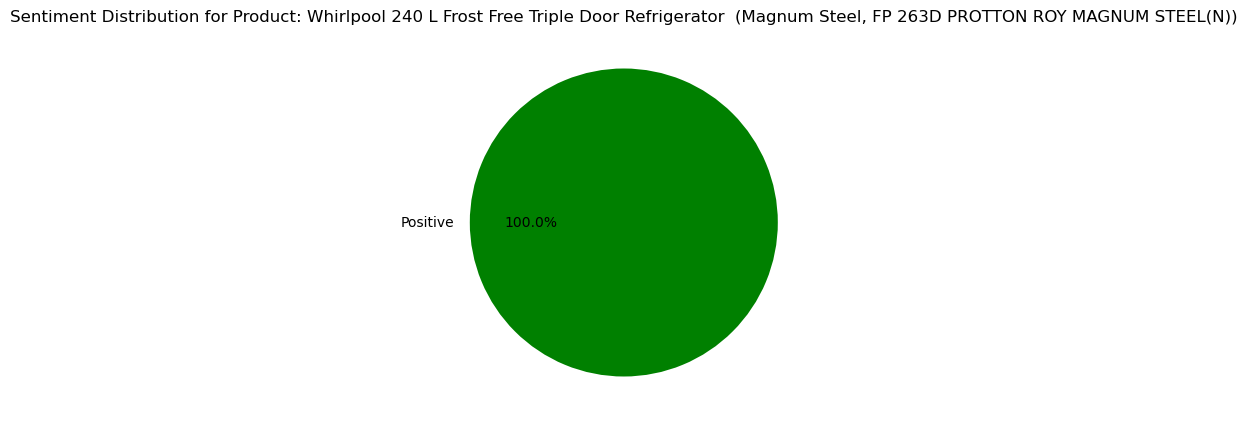

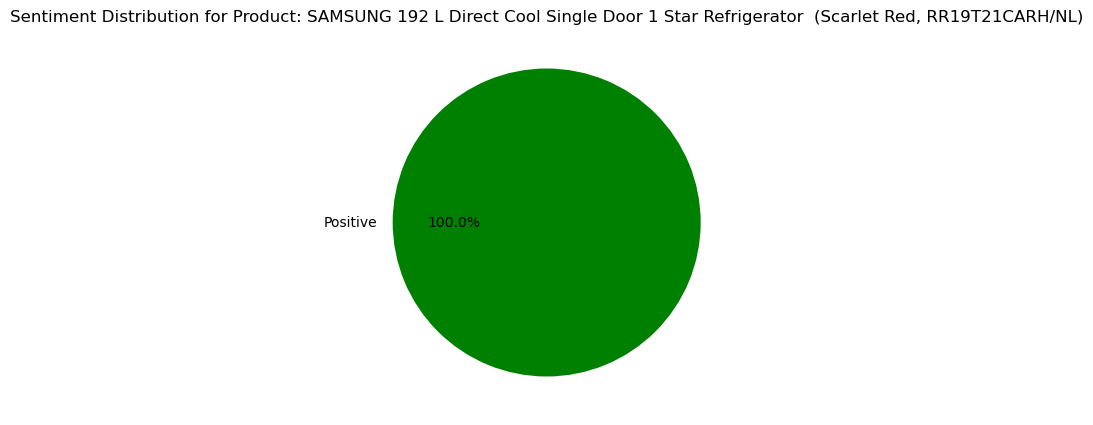

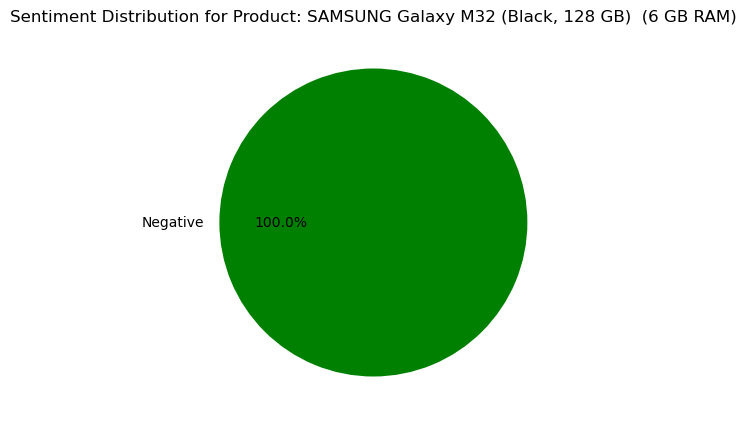

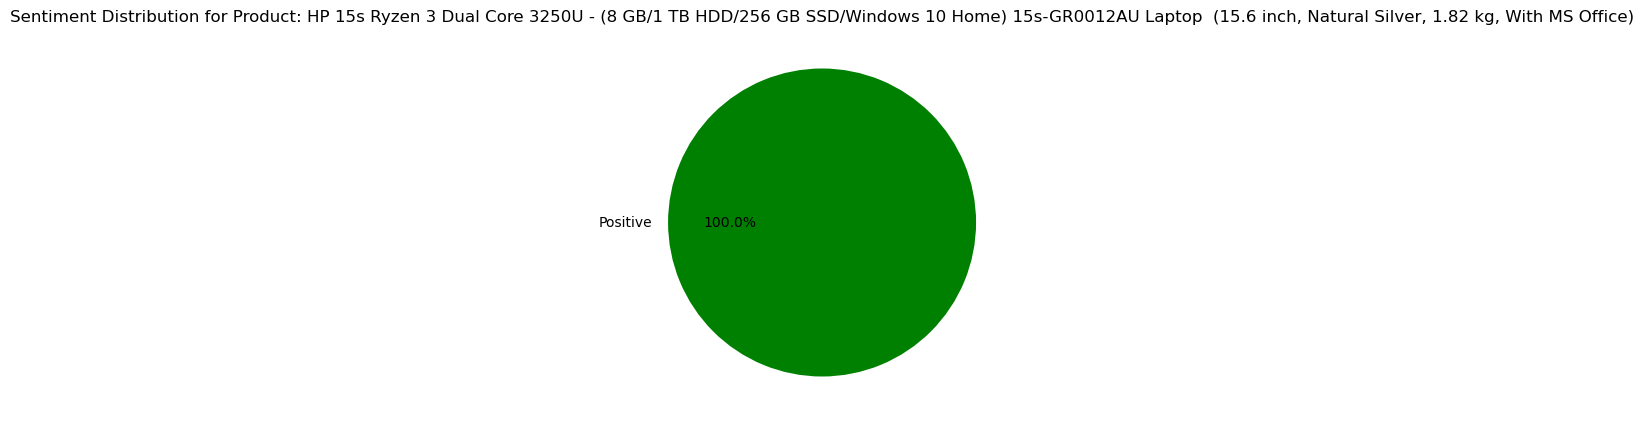

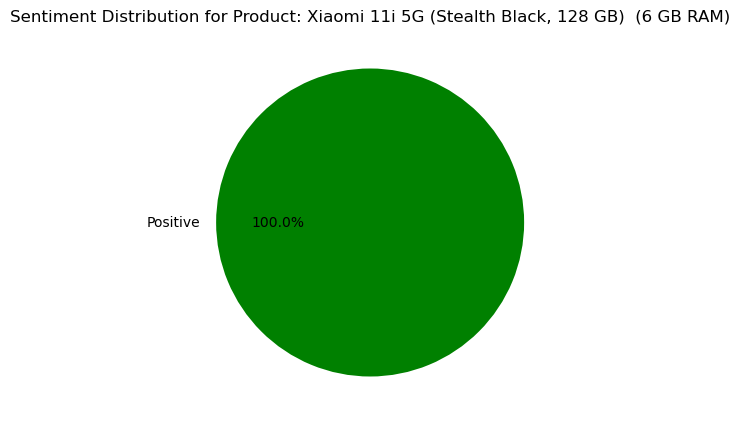

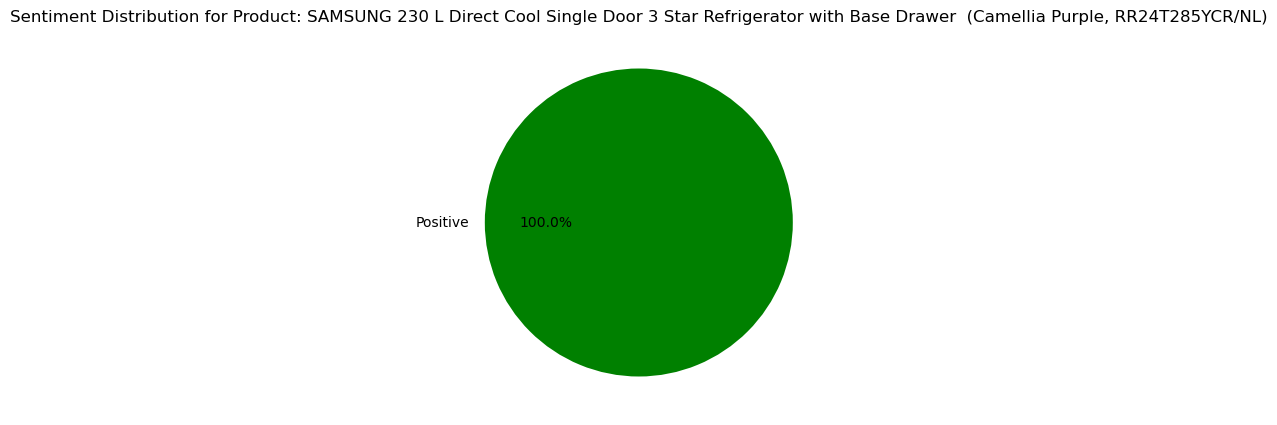

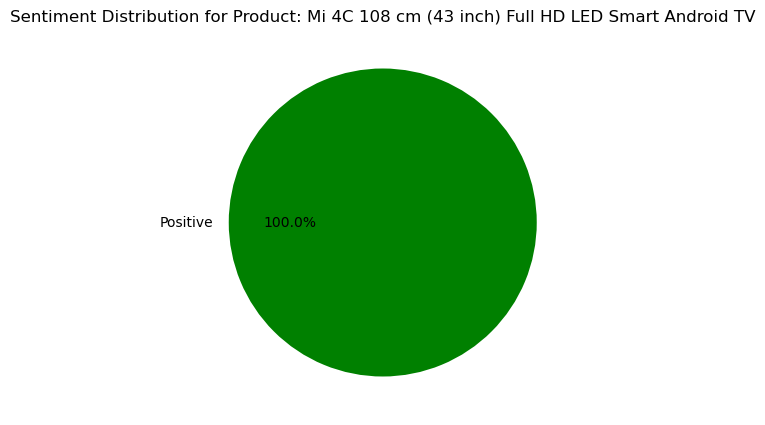

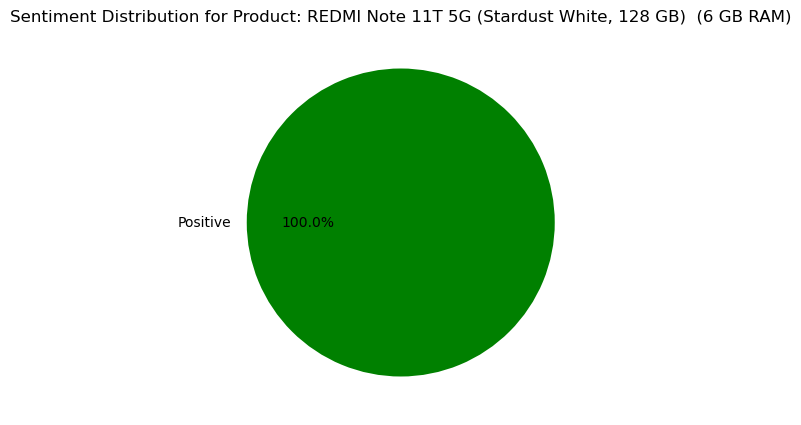

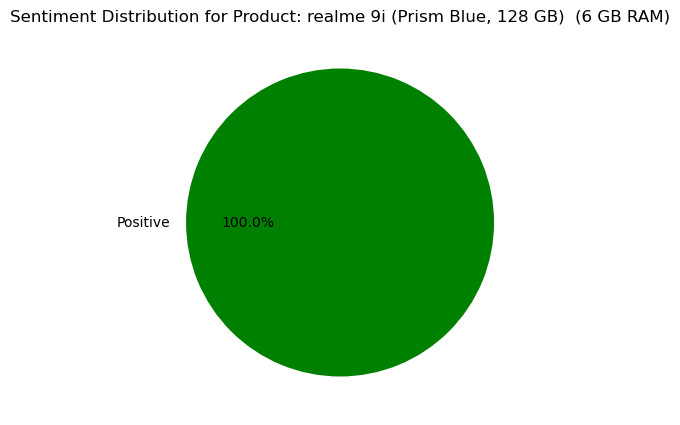

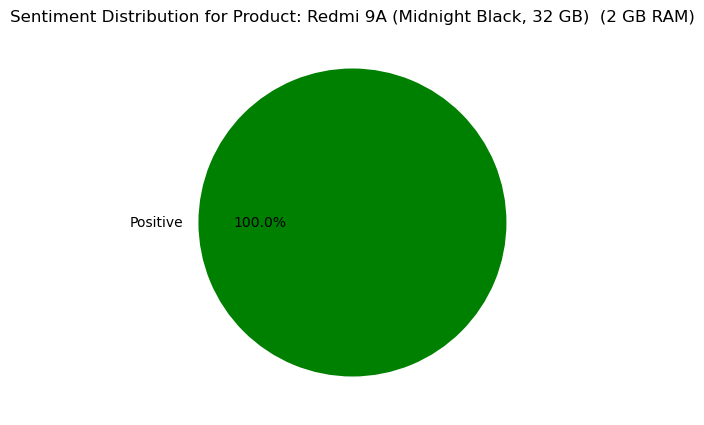

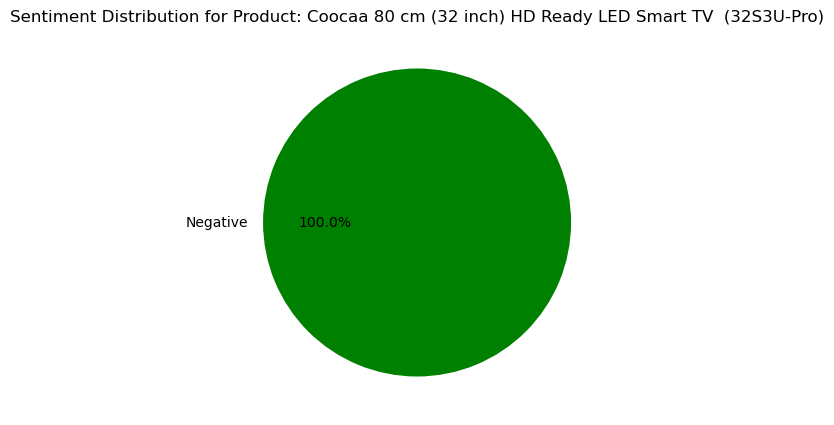

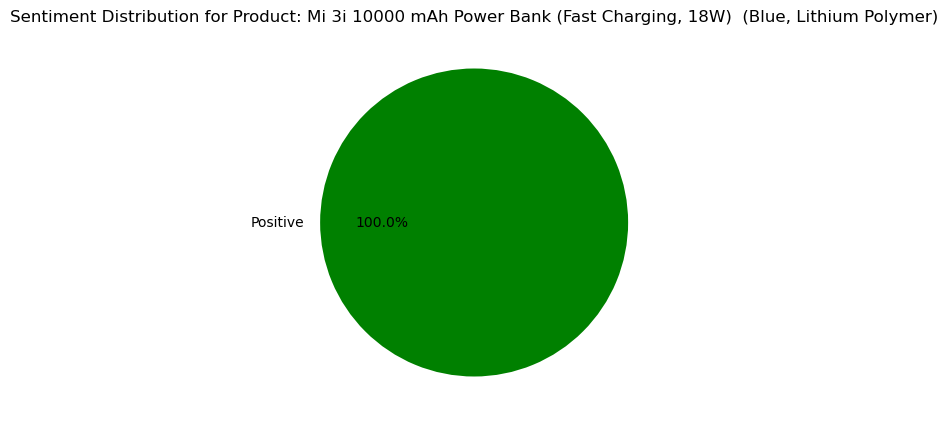

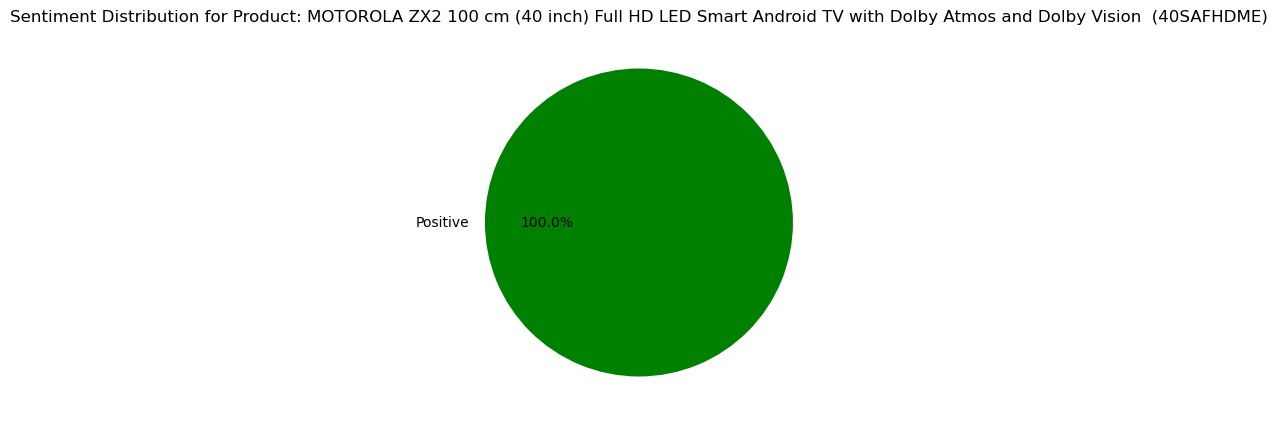

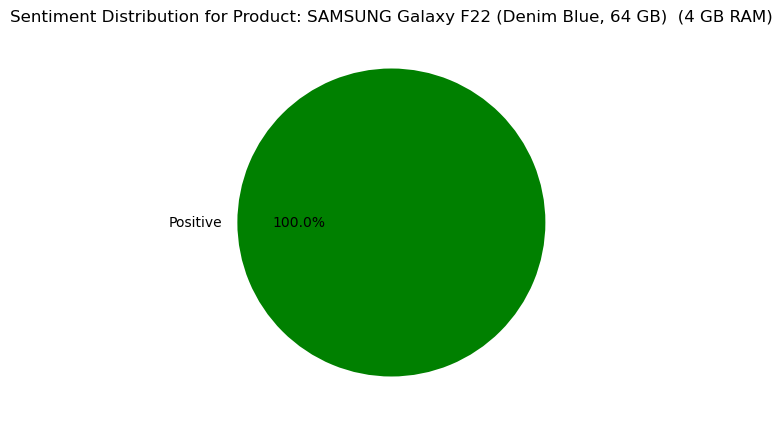

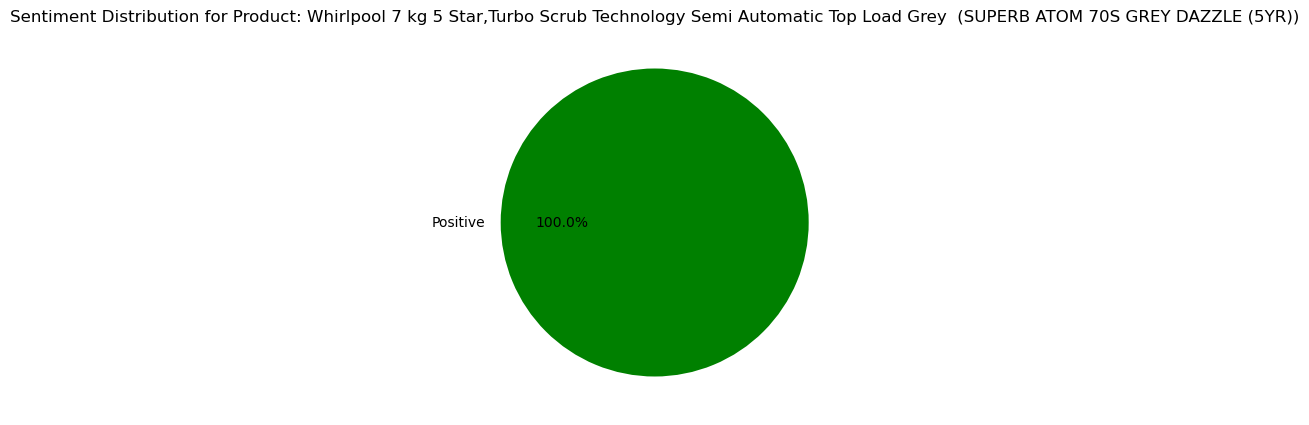

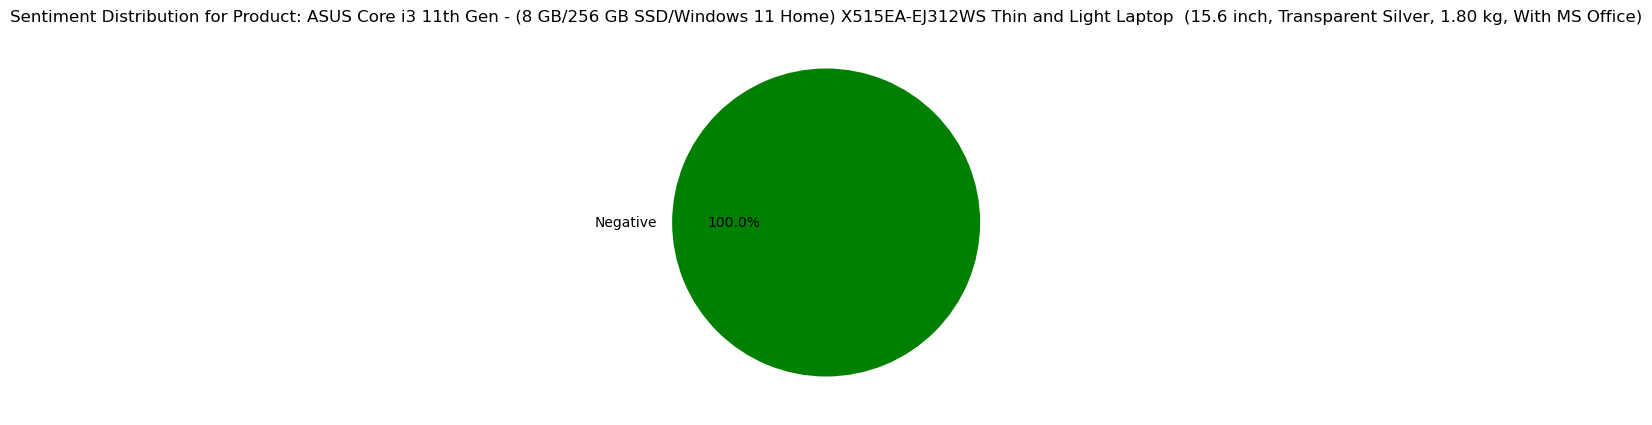

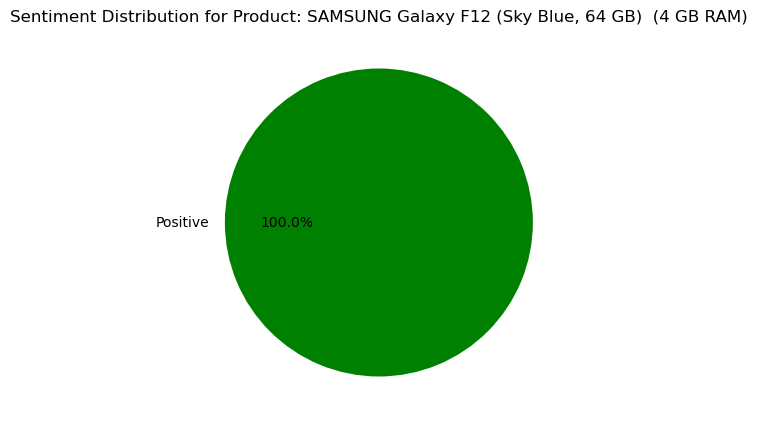

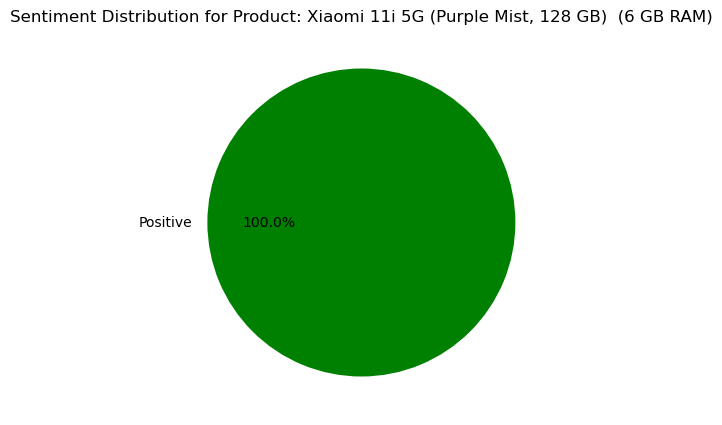

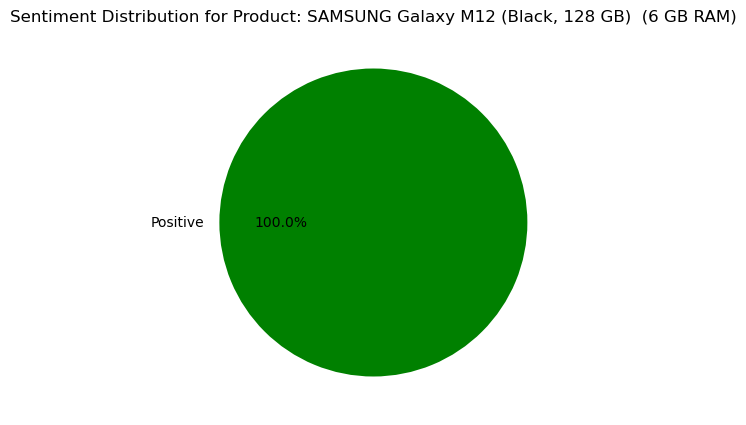

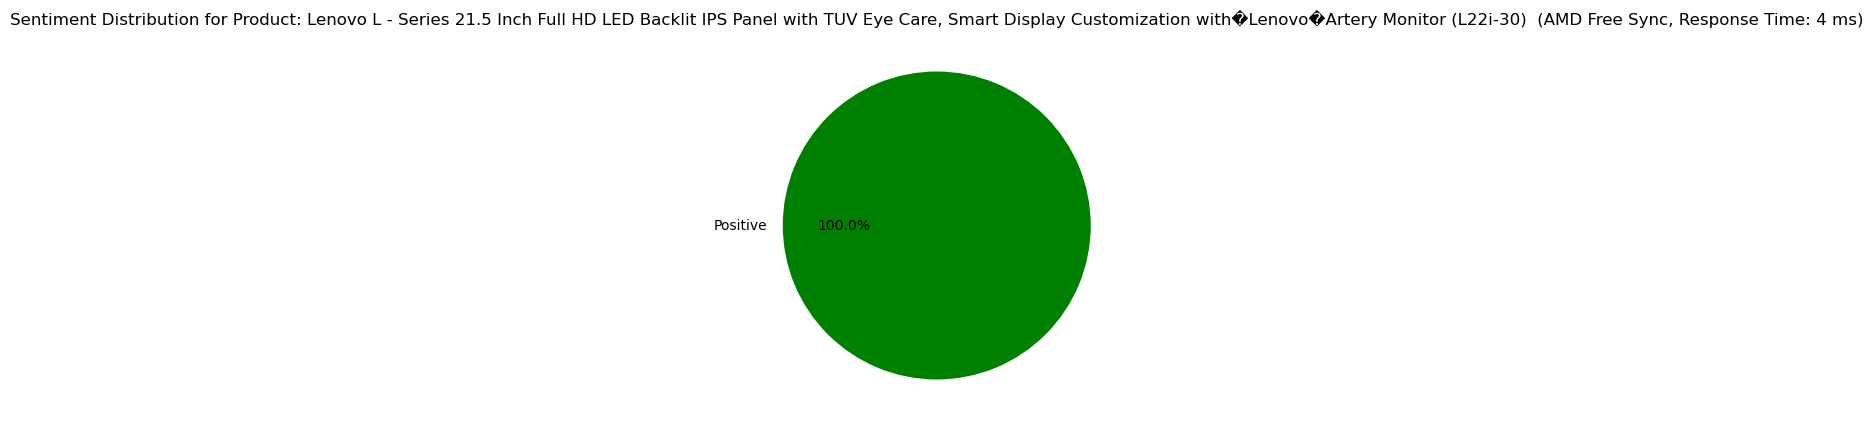

In [61]:
# Add predictions to test dataframe
df_test = df.iloc[y_test.index].copy()
df_test['Predicted_Sentiment'] = final_preds

# Extract brand from product name
df_test['Brand'] = df_test['Product_name'].apply(lambda x: x.split()[0])

# ---- Brand-wise Pie Charts ----
brands = df_test['Brand'].unique()
for brand in brands:
    brand_data = df_test[df_test['Brand'] == brand]
    brand_sent_counts = brand_data['Predicted_Sentiment'].value_counts()
    
    plt.figure(figsize=(5,5))
    plt.pie(brand_sent_counts, labels=brand_sent_counts.index,
            autopct='%1.1f%%', colors=['green','gray','red'])
    plt.title(f'Sentiment Distribution for Brand: {brand}')
    plt.show()

# ---- Product-wise Pie Charts ----
products = df_test['Product_name'].unique()
for product in products:
    product_data = df_test[df_test['Product_name'] == product]
    product_sent_counts = product_data['Predicted_Sentiment'].value_counts()
    
    plt.figure(figsize=(5,5))
    plt.pie(product_sent_counts, labels=product_sent_counts.index,
            autopct='%1.1f%%', colors=['green','gray','red'])
    plt.title(f'Sentiment Distribution for Product: {product}')
    plt.show()


Number of reviews per brand:
 Brand
realme       116
SAMSUNG       82
Xiaomi        36
Whirlpool     32
LG            23
Redmi         19
Mi            19
Lenovo        18
HP            13
DELL          12
LAVA          11
REDMI         10
ASUS           8
acer           7
Vu             6
OnePlus        5
Candes         5
Infinix        5
Lloyd          4
Godrej         4
ZEBRONICS      4
APPLE          4
POCO           4
Thomson        3
ONIDA          3
MSI            2
Haier          1
RedmiBook      1
IFB            1
BenQ           1
Coocaa         1
MOTOROLA       1
Name: count, dtype: int64


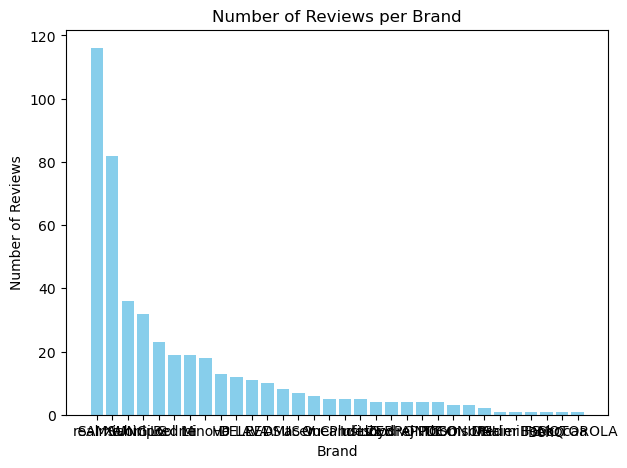

In [62]:
brand_counts = df_test['Brand'].value_counts()
print("Number of reviews per brand:\n", brand_counts)

# Visualize as bar chart
plt.figure(figsize=(7,5))
plt.bar(brand_counts.index, brand_counts.values, color='skyblue')
plt.title('Number of Reviews per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.show()


Number of Positive reviews per brand (Brand Preference):
 Brand
realme       90
SAMSUNG      76
Whirlpool    31
Xiaomi       31
LG           23
Mi           19
Lenovo       17
Redmi        16
HP           12
DELL         12
REDMI        10
LAVA          9
ASUS          7
acer          7
OnePlus       5
Candes        5
Vu            5
Infinix       5
APPLE         4
Lloyd         4
ZEBRONICS     4
POCO          4
Godrej        4
Thomson       3
ONIDA         3
MSI           2
Haier         1
RedmiBook     1
IFB           1
BenQ          1
MOTOROLA      1
Name: count, dtype: int64


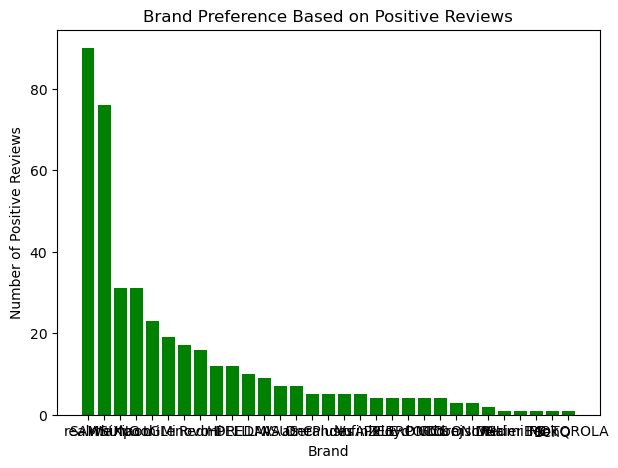

In [63]:
brand_positive = df_test[df_test['Predicted_Sentiment']=='Positive']['Brand'].value_counts()
print("Number of Positive reviews per brand (Brand Preference):\n", brand_positive)

# Bar chart for brand preference
plt.figure(figsize=(7,5))
plt.bar(brand_positive.index, brand_positive.values, color='green')
plt.title('Brand Preference Based on Positive Reviews')
plt.xlabel('Brand')
plt.ylabel('Number of Positive Reviews')
plt.show()


In [64]:
total_positive = df_test[df_test['Predicted_Sentiment']=='Positive'].shape[0]
brand_pref_percentage = (brand_positive / total_positive * 100).round(2)
print("Brand Preference (%) based on positive reviews:\n", brand_pref_percentage)


Brand Preference (%) based on positive reviews:
 Brand
realme       21.79
SAMSUNG      18.40
Whirlpool     7.51
Xiaomi        7.51
LG            5.57
Mi            4.60
Lenovo        4.12
Redmi         3.87
HP            2.91
DELL          2.91
REDMI         2.42
LAVA          2.18
ASUS          1.69
acer          1.69
OnePlus       1.21
Candes        1.21
Vu            1.21
Infinix       1.21
APPLE         0.97
Lloyd         0.97
ZEBRONICS     0.97
POCO          0.97
Godrej        0.97
Thomson       0.73
ONIDA         0.73
MSI           0.48
Haier         0.24
RedmiBook     0.24
IFB           0.24
BenQ          0.24
MOTOROLA      0.24
Name: count, dtype: float64


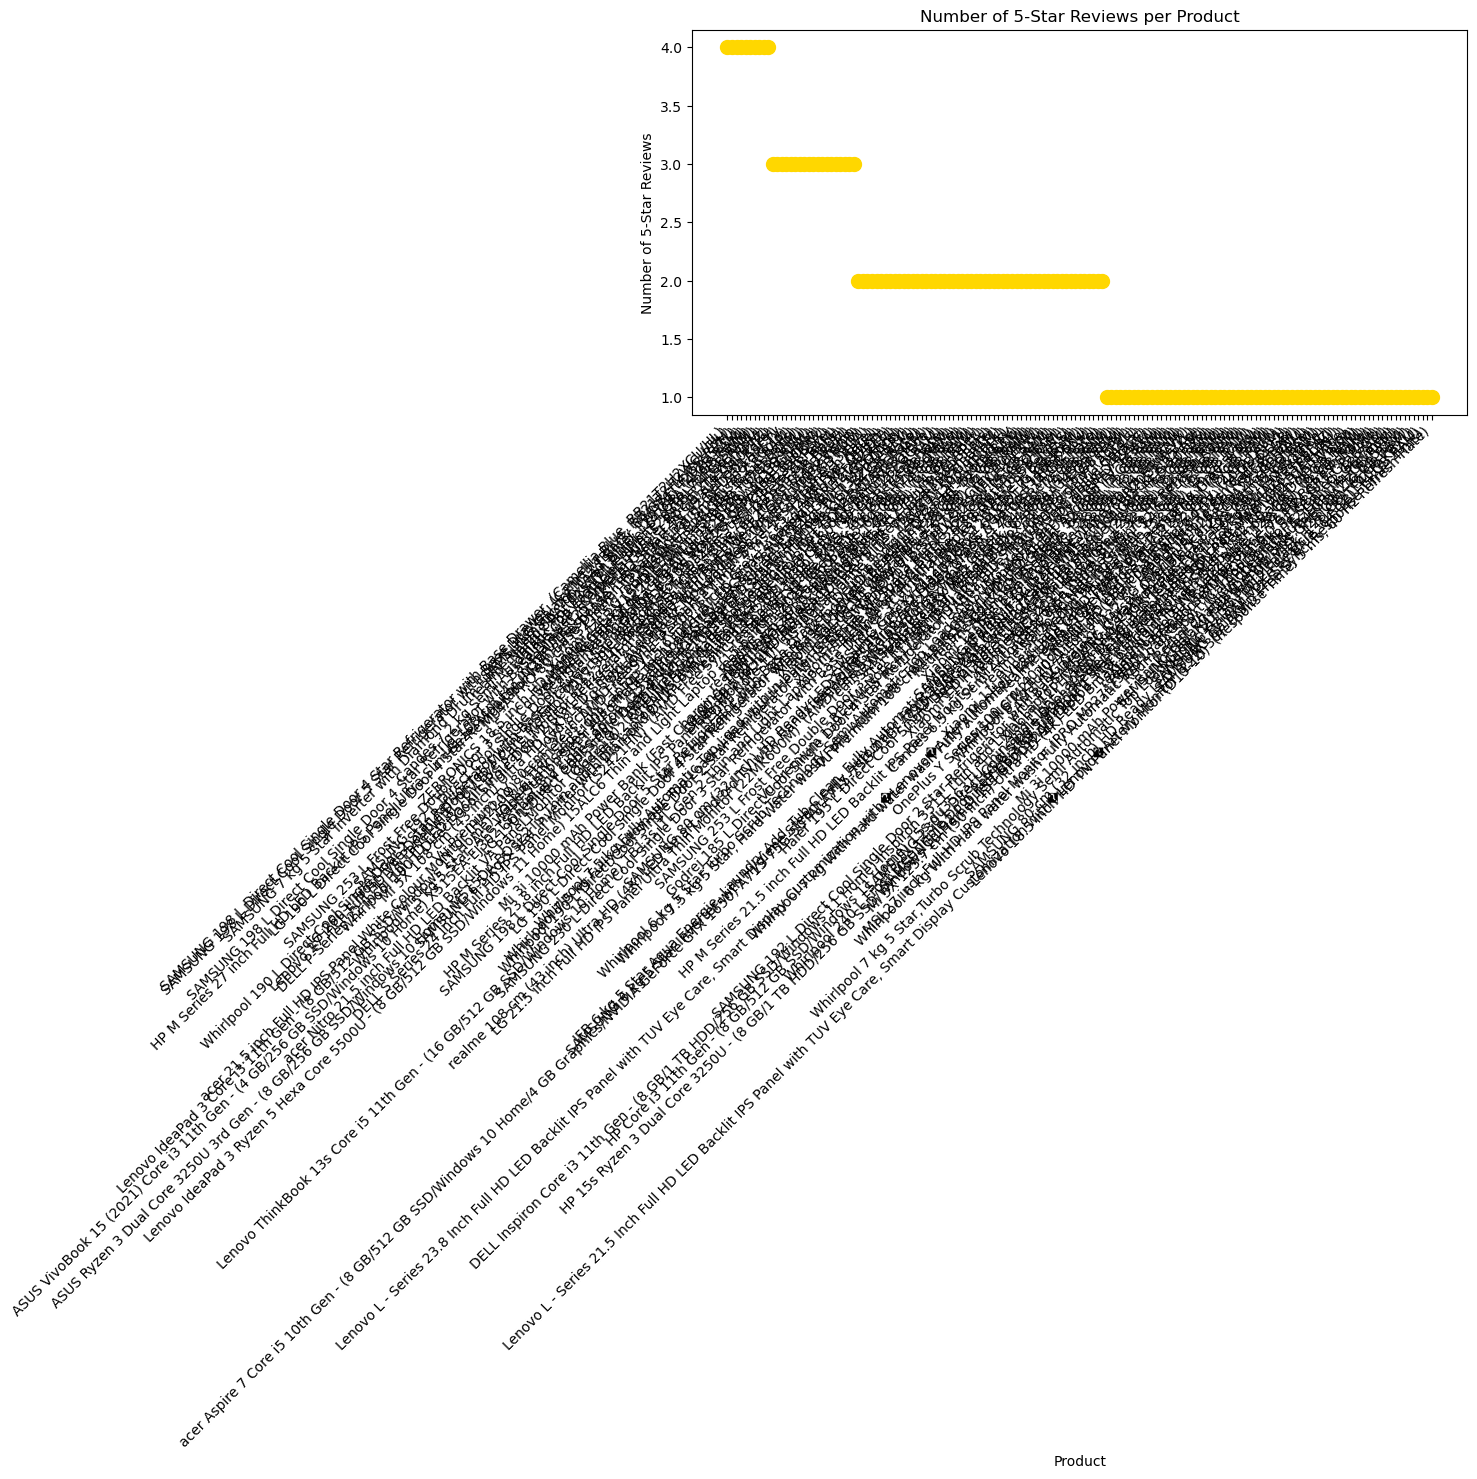

In [65]:
# Count 5-star reviews per product
five_star_reviews = df_test[df_test['Rating'] == 5]['Product_name'].value_counts()

plt.figure(figsize=(10,5))
plt.scatter(five_star_reviews.index, five_star_reviews.values, color='gold', s=100)
plt.xticks(rotation=45, ha='right')
plt.title('Number of 5-Star Reviews per Product')
plt.ylabel('Number of 5-Star Reviews')
plt.xlabel('Product')
plt.show()


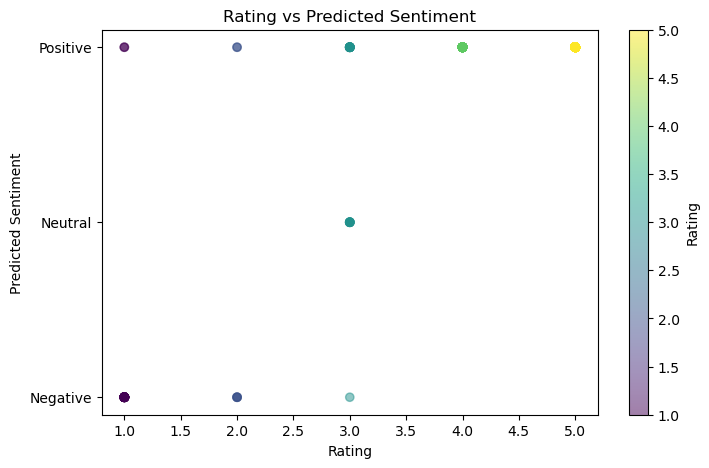

In [66]:
sentiment_mapping = {'Negative':0, 'Neutral':1, 'Positive':2}
df_test['Sentiment_Num'] = df_test['Predicted_Sentiment'].map(sentiment_mapping)

plt.figure(figsize=(8,5))
plt.scatter(df_test['Rating'], df_test['Sentiment_Num'], alpha=0.5, c=df_test['Rating'], cmap='viridis')
plt.yticks([0,1,2], ['Negative','Neutral','Positive'])
plt.colorbar(label='Rating')
plt.xlabel('Rating')
plt.ylabel('Predicted Sentiment')
plt.title('Rating vs Predicted Sentiment')
plt.show()


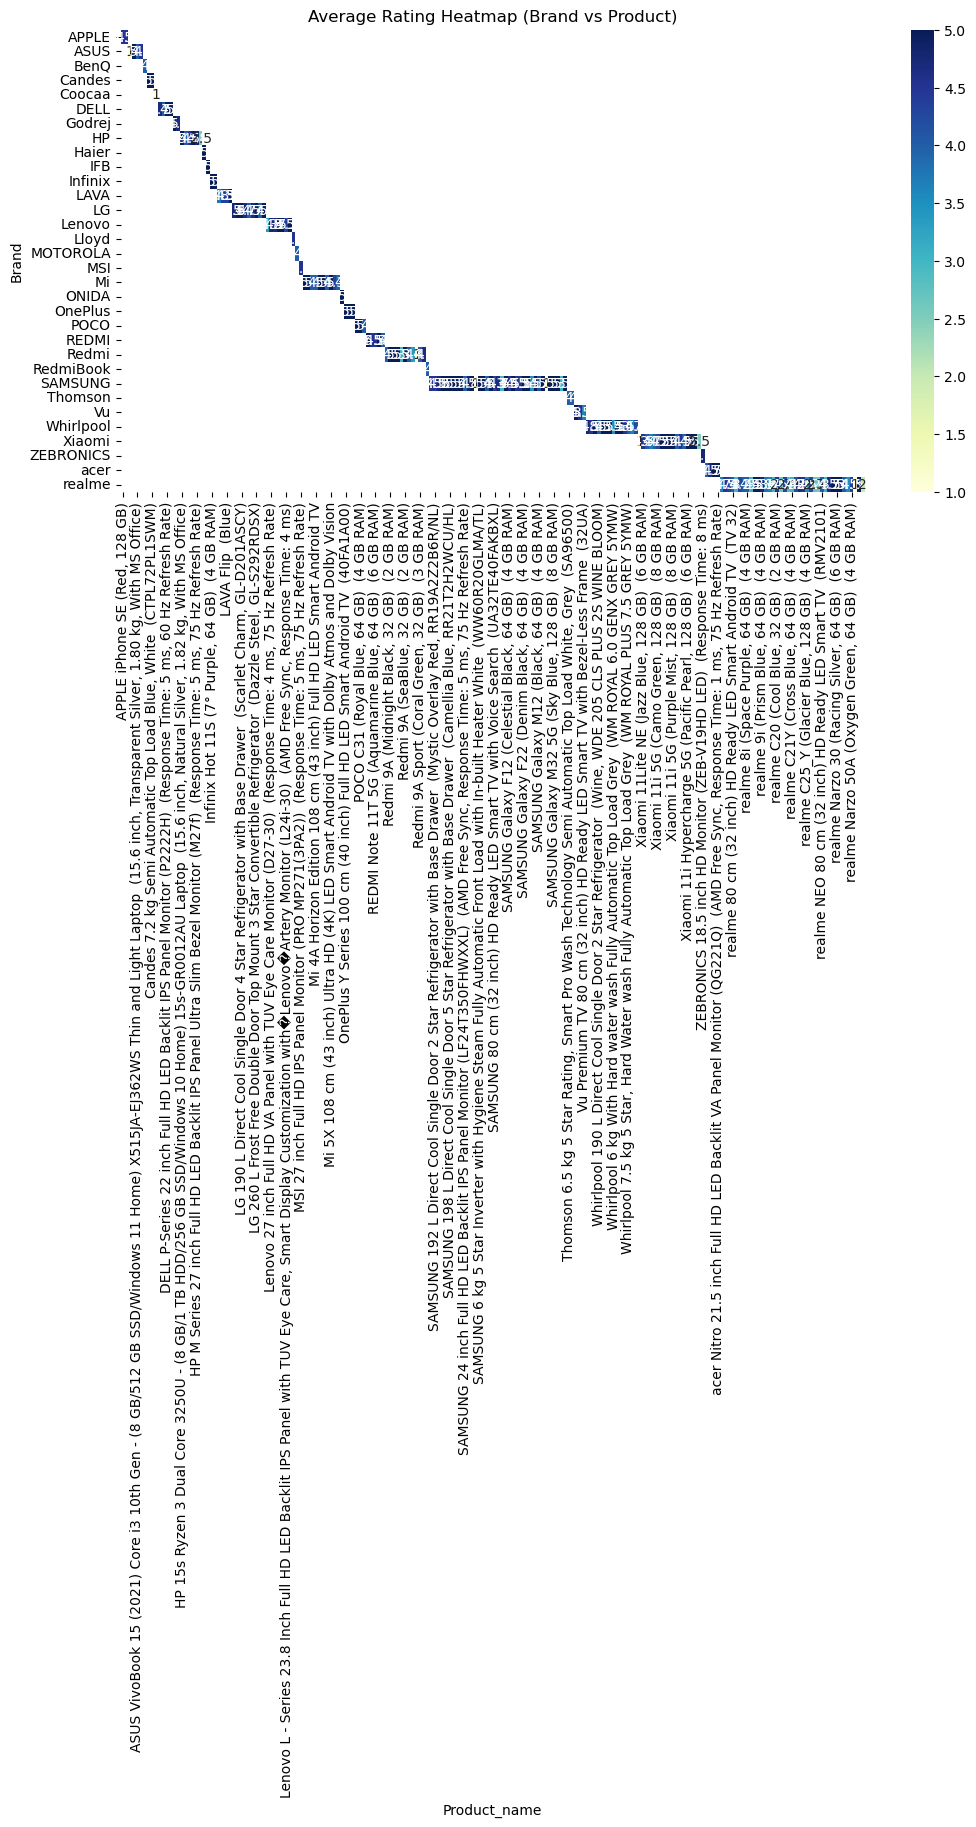

In [67]:
import seaborn as sns

# Average rating for each brand-product combination
heatmap_data = df_test.pivot_table(index='Brand', columns='Product_name', values='Rating', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Rating Heatmap (Brand vs Product)')
plt.show()
